![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/1hr_workshop/SparkNLP_for_Healthcare_3h_Notebook.ipynb)

## **Domain-Specific Language Models**


[**John Snow Labs' Healthcare NLP Library**](https://www.johnsnowlabs.com/healthcare-nlp/) is a comprehensive natural language processing library designed specifically for the healthcare domain.



- **Named Entity Recognition (NER)**: The library offers advanced NER models that can identify a wide range of medical entities such as diseases, symptoms, drugs, anatomical terms, procedures, and more.

- **De-identification**: The library can automatically redact or replace personally identifiable information (PII) in clinical texts to ensure patient privacy.

- **Assertion Status Detection**: It can determine the assertion status of medical conditions (e.g., if a condition is present, absent, or hypothetical).

- **Relation Extraction**: The library can identify relationships between medical entities, such as drug-disease interactions, symptom-disease correlations, and more.

- **Clinical Entity Linking**: It includes models to link recognized entities to standard medical terminologies like SNOMED CT, ICD-10, RxNorm, and others.

- **Text Classification**: The library includes models for classifying clinical texts into categories, such as identifying different types of medical notes or classifying patient status.

- **Summarization**: It offers tools to summarize lengthy clinical documents into concise summaries, making it easier for healthcare professionals to quickly grasp essential information.

- **Translation**: The library provides translation models tailored for medical texts, ensuring accurate translation of clinical information between languages.

    


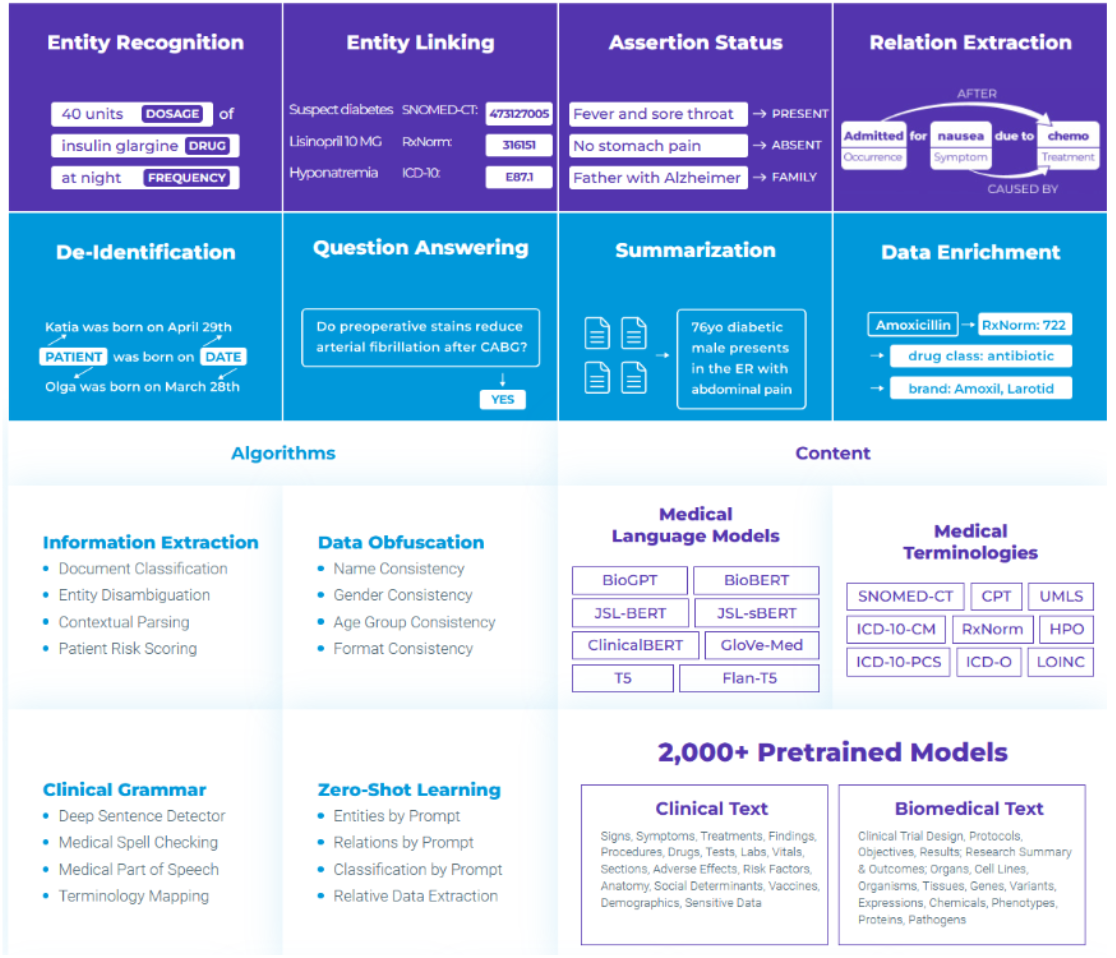

# **Setup and Import Libraries**

In [ ]:
import json
import os
from google.colab import files

license_keys = files.upload()

with open(list(license_keys.keys())[0]) as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)

# Adding license key-value pairs to environment variables
os.environ.update(license_keys)

In [ ]:
# Installing pyspark and spark-nlp
! pip install --upgrade -q pyspark==3.4.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark NLP Healthcare
! pip install --upgrade -q spark-nlp-jsl==$JSL_VERSION  --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

# Spark NLP open-source visualization library
! pip -q install spark-nlp-display

In [ ]:
import functools
import numpy as np
import pandas as pd
from scipy import spatial

import pyspark.sql.types as T
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import sparknlp
import sparknlp_jsl
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *


params = {"spark.driver.memory":"16G",
"spark.kryoserializer.buffer.max":"2000M",
"spark.driver.maxResultSize":"2000M"}

spark = sparknlp_jsl.start(license_keys['SECRET'],params=params)

print ("Spark NLP Version :", sparknlp.version())
print ("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark

Spark NLP Version : 5.5.3
Spark NLP_JSL Version : 5.5.3


# **1.Clinical Named Entity Recognition (NER)**

 The deep neural network architecture for NER model in
Spark NLP is BiLSTM-CNN-Char framework. a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs
](https://arxiv.org/abs/1511.08308)). It is a neural network architecture that
automatically detects word and character-level features using a
hybrid bidirectional LSTM and CNN architecture, eliminating
the need for most feature engineering steps.

  In the original framework, the CNN extracts a fixed length
feature vector from character-level features. For each word,
these vectors are concatenated and fed to the BLSTM network
and then to the output layers. They employed a stacked
bi-directional recurrent neural network with long short-term
memory units to transform word features into named entity
tag scores. The extracted features of each word are fed into a
forward LSTM network and a backward LSTM network. The
output of each network at each time step is decoded by a linear
layer and a log-softmax layer into log-probabilities for each tag
category. These two vectors are then simply added together to
produce the final output. In the architecture of the proposed framework in the original paper, 50-dimensional pretrained word
embeddings is used for word features, 25-dimension character
embeddings is used for char features, and capitalization features
(allCaps, upperInitial, lowercase, mixedCaps, noinfo) are used
for case features.

image.png

## Blogposts and videos:

- [How to Setup Spark NLP for HEALTHCARE on UBUNTU - Video](https://www.youtube.com/watch?v=yKnF-_oz0GE)

- [Named Entity Recognition (NER) with BERT in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

- [State of the art Clinical Named Entity Recognition in Spark NLP - Youtube](https://www.youtube.com/watch?v=YM-e4eOiQ34)

- [Named Entity Recognition for Healthcare with SparkNLP NerDL and NerCRF](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

- [Named Entity Recognition for Clinical Text](https://medium.com/atlas-research/ner-for-clinical-text-7c73caddd180)





## Clinical NER Pretrained Models
|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_clinical_en.html)  | 2| [jsl_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_greedy_clinical_en.html)  | 3| [jsl_ner_wip_modifier_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_ner_wip_modifier_clinical_en.html)  | 4| [jsl_rd_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_rd_ner_wip_greedy_clinical_en.html)  |
| 5| [ner_abbreviation_clinical](https://nlp.johnsnowlabs.com/2021/12/30/ner_abbreviation_clinical_en.html)  | 6| [ner_abbreviation_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/12/ner_abbreviation_emb_clinical_large_en.html)  | 7| [ner_abbreviation_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/12/ner_abbreviation_emb_clinical_medium_en.html)  | 8| [ner_ade_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinical_en.html)  |
| 9| [ner_ade_clinical_langtest](https://nlp.johnsnowlabs.com/2023/07/31/ner_ade_clinical_langtest_en.html)  | 10| [ner_ade_clinical_v2](https://nlp.johnsnowlabs.com/2024/09/05/ner_ade_clinical_v2_en.html)  | 11| [ner_ade_clinicalbert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinicalbert_en.html)  | 12| [ner_ade_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/21/ner_ade_emb_clinical_large_en.html)  |
| 13| [ner_ade_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/21/ner_ade_emb_clinical_medium_en.html)  | 14| [ner_ade_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_healthcare_en.html)  | 15| [ner_alcohol_smoking](https://nlp.johnsnowlabs.com/2024/07/01/ner_alcohol_smoking_en.html)  | 16| [ner_anatomy](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_en.html)  |
| 17| [ner_anatomy_coarse](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_en.html)  | 18| [ner_anatomy_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/15/ner_anatomy_emb_clinical_large_en.html)  | 19| [ner_anatomy_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/15/ner_anatomy_emb_clinical_medium_en.html)  | 20| [ner_aspect_based_sentiment](https://nlp.johnsnowlabs.com/2021/03/31/ner_aspect_based_sentiment_en.html)  |
| 21| [ner_bacterial_species](https://nlp.johnsnowlabs.com/2021/04/01/ner_bacterial_species_en.html)  | 22| [ner_bacterial_species_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/23/ner_bacterial_species_emb_clinical_large_en.html)  | 23| [ner_bacterial_species_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/23/ner_bacterial_species_emb_clinical_medium_en.html)  | 24| [ner_bacterial_species_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_bacterial_species_langtest_en.html)  |
| 25| [ner_biomarker](https://nlp.johnsnowlabs.com/2021/11/26/ner_biomarker_en.html)  | 26| [ner_biomarker_langtest](https://nlp.johnsnowlabs.com/2023/10/10/ner_biomarker_langtest_en.html)  | 27| [ner_biomedical_bc2gm](https://nlp.johnsnowlabs.com/2022/05/11/ner_biomedical_bc2gm_en_2_4.html)  | 28| [ner_bionlp](https://nlp.johnsnowlabs.com/2021/03/31/ner_bionlp_en.html)  |
| 29| [ner_bionlp_langtest](https://nlp.johnsnowlabs.com/2023/10/10/ner_bionlp_langtest_en.html)  | 30| [ner_cancer_genetics](https://nlp.johnsnowlabs.com/2021/03/31/ner_cancer_genetics_en.html)  | 31| [ner_cancer_types_wip](https://nlp.johnsnowlabs.com/2024/08/16/ner_cancer_types_wip_en.html)  | 32| [ner_cellular](https://nlp.johnsnowlabs.com/2021/03/31/ner_cellular_en.html)  |
| 33| [ner_cellular_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/24/ner_cellular_emb_clinical_large_en.html)  | 34| [ner_cellular_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/24/ner_cellular_emb_clinical_medium_en.html)  | 35| [ner_cellular_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_cellular_langtest_en.html)  | 36| [ner_chemd_clinical](https://nlp.johnsnowlabs.com/2021/11/04/ner_chemd_clinical_en.html)  |
| 37| [ner_chemicals](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemicals_en.html)  | 38| [ner_chemicals_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/02/ner_chemicals_emb_clinical_large_en.html)  | 39| [ner_chemicals_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/02/ner_chemicals_emb_clinical_medium_en.html)  | 40| [ner_chemprot_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_chemprot_clinical_en.html)  |
| 41| [ner_chemprot_clinical_langtest](https://nlp.johnsnowlabs.com/2023/10/12/ner_chemprot_clinical_langtest_en.html)  | 42| [ner_chexpert](https://nlp.johnsnowlabs.com/2021/09/30/ner_chexpert_en.html)  | 43| [ner_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_en.html)  | 44| [ner_clinical_abbreviation_langtest](https://nlp.johnsnowlabs.com/2024/01/25/ner_clinical_abbreviation_langtest_en.html)  |
| 45| [ner_clinical_langtest](https://nlp.johnsnowlabs.com/2023/09/26/ner_clinical_langtest_en.html)  | 46| [ner_clinical_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_large_en.html)  | 47| [ner_clinical_large_langtest](https://nlp.johnsnowlabs.com/2023/10/10/ner_clinical_large_langtest_en.html)  | 48| [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/22/ner_clinical_trials_abstracts_en_3_0.html)  |
| 49| [ner_covid_trials](https://nlp.johnsnowlabs.com/2022/10/19/ner_covid_trials_en.html)  | 50| [ner_crf](https://nlp.johnsnowlabs.com/2020/01/28/ner_crf_en.html)  | 51| [ner_deid_aipii](https://nlp.johnsnowlabs.com/2024/09/25/ner_deid_aipii_en.html)  | 52| [ner_deid_enriched_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_deid_enriched_langtest_en.html)  |
| 53| [ner_deid_generic_augmented_allUpperCased_langtest](https://nlp.johnsnowlabs.com/2023/10/16/ner_deid_generic_augmented_allUpperCased_langtest_en.html)  | 54| [ner_deid_generic_augmented_langtest](https://nlp.johnsnowlabs.com/2023/09/26/ner_deid_generic_augmented_langtest_en.html)  | 55| [ner_deid_generic_docwise](https://nlp.johnsnowlabs.com/2024/09/06/ner_deid_generic_docwise_en.html)  | 56| [ner_deid_large_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_deid_large_emb_clinical_large_en.html)  |
| 57| [ner_deid_large_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_deid_large_emb_clinical_medium_en.html)  | 58| [ner_deid_large_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_deid_large_langtest_en.html)  | 59| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  | 60| [ner_deid_subentity_augmented_docwise](https://nlp.johnsnowlabs.com/2024/09/06/ner_deid_subentity_augmented_docwise_en.html)  |
| 61| [ner_deid_subentity_augmented_langtest](https://nlp.johnsnowlabs.com/2023/09/26/ner_deid_subentity_augmented_langtest_en.html)  | 62| [ner_deid_subentity_augmented_v2](https://nlp.johnsnowlabs.com/2024/09/20/ner_deid_subentity_augmented_v2_en.html)  | 63| [ner_deid_subentity_docwise](https://nlp.johnsnowlabs.com/2024/09/06/ner_deid_subentity_docwise_en.html)  | 64| [ner_demographic_extended_healthcare](https://nlp.johnsnowlabs.com/2023/06/08/ner_demographic_extended_healthcare_en.html)  |
| 65| [ner_diseases](https://nlp.johnsnowlabs.com/2021/03/31/ner_diseases_en.html)  | 66| [ner_diseases_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_diseases_langtest_en.html)  | 67| [ner_diseases_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_large_en.html)  | 68| [ner_drugprot_clinical](https://nlp.johnsnowlabs.com/2021/12/20/ner_drugprot_clinical_en.html)  |
| 69| [ner_drugs](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_en.html)  | 70| [ner_drugs_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_greedy_en.html)  | 71| [ner_drugs_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_large_en.html)  | 72| [ner_eu_clinical_case](https://nlp.johnsnowlabs.com/2023/01/25/ner_eu_clinical_case_en.html)  |
| 73| [ner_eu_clinical_condition](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_en.html)  | 74| [ner_eu_clinical_condition_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_eu_clinical_condition_langtest_en.html)  | 75| [ner_events_admission_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_admission_clinical_en.html)  | 76| [ner_events_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_clinical_en.html)  |
| 77| [ner_events_clinical_langtest](https://nlp.johnsnowlabs.com/2023/08/31/ner_events_clinical_langtest_en.html)  | 78| [ner_events_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_healthcare_en.html)  | 79| [ner_financial_contract](https://nlp.johnsnowlabs.com/2021/04/01/ner_financial_contract_en.html)  | 80| [ner_genetic_variants](https://nlp.johnsnowlabs.com/2021/06/25/ner_genetic_variants_en.html)  |
| 81| [ner_healthcare](https://nlp.johnsnowlabs.com/2021/04/21/ner_healthcare_en.html)  | 82| [ner_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_gene_clinical_en.html)  | 83| [ner_human_phenotype_gene_clinical_langtest](https://nlp.johnsnowlabs.com/2023/11/04/ner_human_phenotype_gene_clinical_langtest_en.html)  | 84| [ner_human_phenotype_go_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_go_clinical_en.html)  |
| 85| [ner_human_phenotype_go_clinical_langtest](https://nlp.johnsnowlabs.com/2023/11/04/ner_human_phenotype_go_clinical_langtest_en.html)  | 86| [ner_jsl](https://nlp.johnsnowlabs.com/2022/10/19/ner_jsl_en.html)  | 87| [ner_jsl_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_jsl_emb_clinical_large_en.html)  | 88| [ner_jsl_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_jsl_emb_clinical_medium_en.html)  |
| 89| [ner_jsl_enriched](https://nlp.johnsnowlabs.com/2021/10/22/ner_jsl_enriched_en.html)  | 90| [ner_jsl_greedy](https://nlp.johnsnowlabs.com/2021/06/24/ner_jsl_greedy_en.html)  | 91| [ner_jsl_langtest](https://nlp.johnsnowlabs.com/2023/07/31/ner_jsl_langtest_en.html)  | 92| [ner_jsl_limited_80p_for_benchmarks](https://nlp.johnsnowlabs.com/2023/04/02/ner_jsl_limited_80p_for_benchmarks_en.html)  |
| 93| [ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_slim_en.html)  | 94| [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_en_3_0.html)  | 95| [ner_living_species_langtest](https://nlp.johnsnowlabs.com/2023/10/10/ner_living_species_langtest_en.html)  | 96| [ner_measurements_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_measurements_clinical_en.html)  |
| 97| [ner_medmentions_coarse](https://nlp.johnsnowlabs.com/2021/04/01/ner_medmentions_coarse_en.html)  | 98| [ner_menopause_core](https://nlp.johnsnowlabs.com/2024/07/03/ner_menopause_core_en.html)  | 99| [ner_nature_nero_clinical](https://nlp.johnsnowlabs.com/2022/02/08/ner_nature_nero_clinical_en.html)  | 100| [ner_nihss](https://nlp.johnsnowlabs.com/2021/11/15/ner_nihss_en.html)  |
| 101| [ner_oncology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_en.html)  | 102| [ner_oncology_anatomy_general](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_general_en.html)  | 103| [ner_oncology_anatomy_general_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_anatomy_general_healthcare_en.html)  | 104| [ner_oncology_anatomy_general_langtest](https://nlp.johnsnowlabs.com/2023/09/03/ner_oncology_anatomy_general_langtest_en.html)  |
| 105| [ner_oncology_anatomy_general_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_anatomy_general_wip_en.html)  | 106| [ner_oncology_anatomy_granular](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_granular_en.html)  | 107| [ner_oncology_anatomy_granular_langtest](https://nlp.johnsnowlabs.com/2023/09/03/ner_oncology_anatomy_granular_langtest_en.html)  | 108| [ner_oncology_anatomy_granular_wip](https://nlp.johnsnowlabs.com/2022/10/01/ner_oncology_anatomy_granular_wip_en.html)  |
| 109| [ner_oncology_biomarker](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_biomarker_en.html)  | 110| [ner_oncology_biomarker_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_biomarker_healthcare_en.html)  | 111| [ner_oncology_biomarker_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_biomarker_langtest_en.html)  | 112| [ner_oncology_biomarker_wip](https://nlp.johnsnowlabs.com/2022/10/01/ner_oncology_biomarker_wip_en.html)  |
| 113| [ner_oncology_demographics](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_demographics_en.html)  | 114| [ner_oncology_demographics_langtest](https://nlp.johnsnowlabs.com/2023/09/03/ner_oncology_demographics_langtest_en.html)  | 115| [ner_oncology_demographics_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_demographics_wip_en.html)  | 116| [ner_oncology_diagnosis](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_diagnosis_en.html)  |
| 117| [ner_oncology_diagnosis_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_diagnosis_langtest_en.html)  | 118| [ner_oncology_diagnosis_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_diagnosis_wip_en.html)  | 119| [ner_oncology_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_oncology_emb_clinical_large_en.html)  | 120| [ner_oncology_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_oncology_emb_clinical_medium_en.html)  |
| 121| [ner_oncology_langtest](https://nlp.johnsnowlabs.com/2023/10/15/ner_oncology_langtest_en.html)  | 122| [ner_oncology_limited_80p_for_benchmarks](https://nlp.johnsnowlabs.com/2023/04/03/ner_oncology_limited_80p_for_benchmarks_en.html)  | 123| [ner_oncology_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_posology_en.html)  | 124| [ner_oncology_posology_langtest](https://nlp.johnsnowlabs.com/2023/09/04/ner_oncology_posology_langtest_en.html)  |
| 125| [ner_oncology_posology_wip](https://nlp.johnsnowlabs.com/2022/10/01/ner_oncology_posology_wip_en.html)  | 126| [ner_oncology_response_to_treatment](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_response_to_treatment_en.html)  | 127| [ner_oncology_response_to_treatment_langtest](https://nlp.johnsnowlabs.com/2023/09/04/ner_oncology_response_to_treatment_langtest_en.html)  | 128| [ner_oncology_response_to_treatment_wip](https://nlp.johnsnowlabs.com/2022/10/01/ner_oncology_response_to_treatment_wip_en.html)  |
| 129| [ner_oncology_test](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_test_en.html)  | 130| [ner_oncology_test_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_test_langtest_en.html)  | 131| [ner_oncology_test_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_test_wip_en.html)  | 132| [ner_oncology_therapy](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_therapy_en.html)  |
| 133| [ner_oncology_therapy_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_therapy_langtest_en.html)  | 134| [ner_oncology_therapy_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_therapy_wip_en.html)  | 135| [ner_oncology_tnm](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_tnm_en.html)  | 136| [ner_oncology_tnm_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_tnm_langtest_en.html)  |
| 137| [ner_oncology_tnm_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_tnm_wip_en.html)  | 138| [ner_oncology_unspecific_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_unspecific_posology_en.html)  | 139| [ner_oncology_unspecific_posology_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_unspecific_posology_healthcare_en.html)  | 140| [ner_oncology_unspecific_posology_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_oncology_unspecific_posology_langtest_en.html)  |
| 141| [ner_oncology_unspecific_posology_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_unspecific_posology_wip_en.html)  | 142| [ner_oncology_wip](https://nlp.johnsnowlabs.com/2022/09/30/ner_oncology_wip_en.html)  | 143| [ner_opioid](https://nlp.johnsnowlabs.com/2024/03/27/ner_opioid_en.html)  | 144| [ner_opioid_small_wip](https://nlp.johnsnowlabs.com/2024/01/11/ner_opioid_small_wip_en.html)  |
| 145| [ner_pathogen](https://nlp.johnsnowlabs.com/2022/06/28/ner_pathogen_en_3_0.html)  | 146| [ner_posology](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_en.html)  | 147| [ner_posology_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_posology_emb_clinical_large_en.html)  | 148| [ner_posology_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_posology_emb_clinical_medium_en.html)  |
| 149| [ner_posology_experimental](https://nlp.johnsnowlabs.com/2021/09/01/ner_posology_experimental_en.html)  | 150| [ner_posology_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_greedy_en.html)  | 151| [ner_posology_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_healthcare_en.html)  | 152| [ner_posology_langtest](https://nlp.johnsnowlabs.com/2023/07/28/ner_posology_langtest_en.html)  |
| 153| [ner_posology_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_large_en.html)  | 154| [ner_posology_small](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_small_en.html)  | 155| [ner_radiology](https://nlp.johnsnowlabs.com/2021/03/31/ner_radiology_en.html)  | 156| [ner_radiology_wip_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_radiology_wip_clinical_en.html)  |
| 157| [ner_risk_factors](https://nlp.johnsnowlabs.com/2021/03/31/ner_risk_factors_en.html)  | 158| [ner_risk_factors_langtest](https://nlp.johnsnowlabs.com/2023/11/06/ner_risk_factors_langtest_en.html)  | 159| [ner_sdoh](https://nlp.johnsnowlabs.com/2023/06/13/ner_sdoh_en.html)  | 160| [ner_sdoh_access_to_healthcare](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_access_to_healthcare_en.html)  |
| 161| [ner_sdoh_access_to_healthcare_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_access_to_healthcare_wip_en.html)  | 162| [ner_sdoh_community_condition](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_community_condition_en.html)  | 163| [ner_sdoh_community_condition_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_community_condition_wip_en.html)  | 164| [ner_sdoh_core](https://nlp.johnsnowlabs.com/2024/04/08/ner_sdoh_core_en.html)  |
| 165| [ner_sdoh_demographics](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_demographics_en.html)  | 166| [ner_sdoh_demographics_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_demographics_wip_en.html)  | 167| [ner_sdoh_emb_clinical_large_wip](https://nlp.johnsnowlabs.com/2023/04/17/ner_sdoh_emb_clinical_large_wip_en.html)  | 168| [ner_sdoh_emb_clinical_medium_wip](https://nlp.johnsnowlabs.com/2023/04/27/ner_sdoh_emb_clinical_medium_wip_en.html)  |
| 169| [ner_sdoh_health_behaviours_problems](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_health_behaviours_problems_en.html)  | 170| [ner_sdoh_health_behaviours_problems_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_health_behaviours_problems_wip_en.html)  | 171| [ner_sdoh_income_social_status](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_income_social_status_en.html)  | 172| [ner_sdoh_income_social_status_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_income_social_status_wip_en.html)  |
| 173| [ner_sdoh_langtest](https://nlp.johnsnowlabs.com/2023/07/31/ner_sdoh_langtest_en.html)  | 174| [ner_sdoh_mentions](https://nlp.johnsnowlabs.com/2022/12/18/ner_sdoh_mentions_en.html)  | 175| [ner_sdoh_slim_wip](https://nlp.johnsnowlabs.com/2022/11/15/ner_sdoh_slim_wip_en.html)  | 176| [ner_sdoh_social_environment](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_social_environment_en.html)  |
| 177| [ner_sdoh_social_environment_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_social_environment_wip_en.html)  | 178| [ner_sdoh_substance_usage](https://nlp.johnsnowlabs.com/2023/07/02/ner_sdoh_substance_usage_en.html)  | 179| [ner_sdoh_substance_usage_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_substance_usage_wip_en.html)  | 180| [ner_sdoh_wip](https://nlp.johnsnowlabs.com/2024/06/10/ner_sdoh_wip_en.html)  |
| 181| [ner_section_header_diagnosis](https://nlp.johnsnowlabs.com/2023/07/26/ner_section_header_diagnosis_en.html)  | 182| [ner_snomed_term](https://nlp.johnsnowlabs.com/2024/02/13/ner_snomed_term_en.html)  | 183| [ner_stigmatization_wip](https://nlp.johnsnowlabs.com/2024/08/27/ner_stigmatization_wip_en.html)  | 184| [ner_supplement_clinical](https://nlp.johnsnowlabs.com/2022/02/01/ner_supplement_clinical_en.html)  |
| 185| [ner_vop](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_en.html)  | 186| [ner_vop_anatomy](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_anatomy_en.html)  | 187| [ner_vop_anatomy_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_anatomy_emb_clinical_large_en.html)  | 188| [ner_vop_anatomy_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_anatomy_emb_clinical_medium_en.html)  |
| 189| [ner_vop_anatomy_langtest](https://nlp.johnsnowlabs.com/2023/09/21/ner_vop_anatomy_langtest_en.html)  | 190| [ner_vop_anatomy_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_anatomy_wip_en.html)  | 191| [ner_vop_clinical_dept](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_en.html)  | 192| [ner_vop_clinical_dept_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_emb_clinical_large_en.html)  |
| 193| [ner_vop_clinical_dept_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_emb_clinical_medium_en.html)  | 194| [ner_vop_clinical_dept_langtest](https://nlp.johnsnowlabs.com/2023/09/21/ner_vop_clinical_dept_langtest_en.html)  | 195| [ner_vop_clinical_dept_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_clinical_dept_wip_en.html)  | 196| [ner_vop_demographic](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_en.html)  |
| 197| [ner_vop_demographic_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_emb_clinical_large_en.html)  | 198| [ner_vop_demographic_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_emb_clinical_medium_en.html)  | 199| [ner_vop_demographic_langtest](https://nlp.johnsnowlabs.com/2023/09/21/ner_vop_demographic_langtest_en.html)  | 200| [ner_vop_demographic_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_demographic_wip_en.html)  |
| 201| [ner_vop_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_emb_clinical_large_en.html)  | 202| [ner_vop_emb_clinical_large_wip](https://nlp.johnsnowlabs.com/2023/04/12/ner_vop_emb_clinical_large_wip_en.html)  | 203| [ner_vop_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_emb_clinical_medium_en.html)  | 204| [ner_vop_emb_clinical_medium_wip](https://nlp.johnsnowlabs.com/2023/04/12/ner_vop_emb_clinical_medium_wip_en.html)  |
| 205| [ner_vop_langtest](https://nlp.johnsnowlabs.com/2023/10/10/ner_vop_langtest_en.html)  | 206| [ner_vop_problem](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_en.html)  | 207| [ner_vop_problem_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_emb_clinical_large_en.html)  | 208| [ner_vop_problem_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_emb_clinical_medium_en.html)  |
| 209| [ner_vop_problem_langtest](https://nlp.johnsnowlabs.com/2023/09/21/ner_vop_problem_langtest_en.html)  | 210| [ner_vop_problem_reduced](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_en.html)  | 211| [ner_vop_problem_reduced_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_emb_clinical_large_en.html)  | 212| [ner_vop_problem_reduced_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_emb_clinical_medium_en.html)  |
| 213| [ner_vop_problem_reduced_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_vop_problem_reduced_langtest_en.html)  | 214| [ner_vop_problem_reduced_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_problem_reduced_wip_en.html)  | 215| [ner_vop_problem_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_problem_wip_en.html)  | 216| [ner_vop_slim_wip](https://nlp.johnsnowlabs.com/2023/02/25/ner_vop_slim_wip_en.html)  |
| 217| [ner_vop_temporal](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_en.html)  | 218| [ner_vop_temporal_emb_clinical_large_final](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_emb_clinical_large_final_en.html)  | 219| [ner_vop_temporal_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_emb_clinical_medium_en.html)  | 220| [ner_vop_temporal_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_vop_temporal_langtest_en.html)  |
| 221| [ner_vop_temporal_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_temporal_wip_en.html)  | 222| [ner_vop_test](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_en.html)  | 223| [ner_vop_test_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_emb_clinical_large_en.html)  | 224| [ner_vop_test_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_emb_clinical_medium_en.html)  |
| 225| [ner_vop_test_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_vop_test_langtest_en.html)  | 226| [ner_vop_test_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_test_wip_en.html)  | 227| [ner_vop_treatment](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_en.html)  | 228| [ner_vop_treatment_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_emb_clinical_large_en.html)  |
| 229| [ner_vop_treatment_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_emb_clinical_medium_en.html)  | 230| [ner_vop_treatment_langtest](https://nlp.johnsnowlabs.com/2023/09/22/ner_vop_treatment_langtest_en.html)  | 231| [ner_vop_treatment_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_treatment_wip_en.html)  | 232| [ner_vop_v2](https://nlp.johnsnowlabs.com/2024/06/07/ner_vop_v2_en.html)  |
| 233| [ner_vop_wip](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_wip_en.html)  | 234| [ner_vop_wip_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_wip_embeddings_clinical_large_en.html)  | 235| [ner_vop_wip_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_wip_embeddings_clinical_medium_en.html)  | 236| [nerdl_tumour_demo](https://nlp.johnsnowlabs.com/2021/04/01/nerdl_tumour_demo_en.html)  |




- **Multilingual Clinical NER Models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [ner_clinical](https://nlp.johnsnowlabs.com/2023/09/20/ner_clinical_sv.html)  | 2| [ner_clinical_bert](https://nlp.johnsnowlabs.com/2022/11/22/ner_clinical_bert_ro.html)  | 3| [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/08/12/ner_clinical_trials_abstracts_es_3_0.html)  | 4| [ner_deid_generic](https://nlp.johnsnowlabs.com/2023/05/30/ner_deid_generic_ar.html)  |
| 5| [ner_deid_generic_arabert](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_arabert_ar.html)  | 6| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_augmented_es.html)  | 7| [ner_deid_generic_bert](https://nlp.johnsnowlabs.com/2022/11/22/ner_deid_generic_bert_ro.html)  | 8| [ner_deid_generic_camelbert](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_camelbert_ar.html)  |
| 9| [ner_deid_generic_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_generic_roberta_es.html)  | 10| [ner_deid_generic_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_roberta_augmented_es.html)  | 11| [ner_deid_multilingual](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_multilingual_xx.html)  | 12| [ner_deid_name_multilingual](https://nlp.johnsnowlabs.com/2024/01/17/ner_deid_name_multilingual_xx.html)  |
| 13| [ner_deid_name_multilingual_clinical](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_name_multilingual_clinical_xx.html)  | 14| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_subentity_ar.html)  | 15| [ner_deid_subentity_arabert](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_subentity_arabert_ar.html)  | 16| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_augmented_es.html)  |
| 17| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_bert_subentity_ro_3_0.html)  | 18| [ner_deid_subentity_camelbert](https://nlp.johnsnowlabs.com/2023/09/22/ner_deid_subentity_camelbert_ar.html)  | 19| [ner_deid_subentity_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_subentity_roberta_es.html)  | 20| [ner_deid_subentity_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_roberta_augmented_es.html)  |
| 21| [ner_diag_proc](https://nlp.johnsnowlabs.com/2021/03/31/ner_diag_proc_es.html)  | 22| [ner_eu_clinical_case](https://nlp.johnsnowlabs.com/2023/02/02/ner_eu_clinical_case_eu.html)  | 23| [ner_eu_clinical_condition](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_it.html)  | 24| [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/23/ner_living_species_ca_3_0.html)  |
| 25| [ner_living_species_300](https://nlp.johnsnowlabs.com/2022/11/22/ner_living_species_300_es.html)  | 26| [ner_living_species_bert](https://nlp.johnsnowlabs.com/2022/06/23/ner_living_species_bert_ro_3_0.html)  | 27| [ner_living_species_roberta](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_roberta_pt_3_0.html)  | 28| [ner_negation_uncertainty](https://nlp.johnsnowlabs.com/2022/08/13/ner_negation_uncertainty_es_3_0.html)  |
| 29| [ner_neoplasms](https://nlp.johnsnowlabs.com/2021/03/31/ner_neoplasms_es.html)  | 30| [ner_pharmacology](https://nlp.johnsnowlabs.com/2022/08/13/ner_pharmacology_es_3_0.html)  | 31| [ner_traffic](https://nlp.johnsnowlabs.com/2021/04/01/ner_traffic_de.html)  | 32| [roberta_ner_diag_proc](https://nlp.johnsnowlabs.com/2021/11/04/roberta_ner_diag_proc_es.html)  |

- **BioBert NER Models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_ner_wip_greedy_biobert_en.html)  | 2| [jsl_rd_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_rd_ner_wip_greedy_biobert_en.html)  | 3| [ner_ade_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_biobert_en.html)  | 4| [ner_anatomy_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_anatomy_biobert_en.html)  |
| 5| [ner_anatomy_coarse_biobert](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_biobert_en.html)  | 6| [ner_anatomy_coarse_biobert_en](https://nlp.johnsnowlabs.com/2020/11/04/ner_anatomy_coarse_biobert_en.html)  | 7| [ner_bionlp_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_bionlp_biobert_en.html)  | 8| [ner_cellular_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_cellular_biobert_en.html)  |
| 9| [ner_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemprot_biobert_en.html)  | 10| [ner_clinical_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_clinical_biobert_en.html)  | 11| [ner_diseases_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_biobert_en.html)  | 12| [ner_events_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_biobert_en.html)  |
| 13| [ner_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_gene_biobert_en.html)  | 14| [ner_human_phenotype_go_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_go_biobert_en.html)  | 15| [ner_jsl_biobert](https://nlp.johnsnowlabs.com/2021/09/05/ner_jsl_biobert_en.html)  | 16| [ner_jsl_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_jsl_enriched_biobert_en.html)  |
| 17| [ner_jsl_greedy_biobert](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_greedy_biobert_en.html)  | 18| [ner_living_species_biobert](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_biobert_en_3_0.html)  | 19| [ner_posology_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_biobert_en.html)  | 20| [ner_posology_large_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_large_biobert_en.html)  |
| 21| [ner_profiling_biobert](https://nlp.johnsnowlabs.com/2023/06/17/ner_profiling_biobert_en.html)  | 22| [ner_risk_factors_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_risk_factors_biobert_en.html)  | 23| []()| 24| []()|


- **BertForTokenClassification Clinical NER models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_ade_tweet_binary](https://nlp.johnsnowlabs.com/2022/07/29/bert_token_classifier_ade_tweet_binary_en_3_0.html)  | 2| [bert_token_classifier_drug_development_trials](https://nlp.johnsnowlabs.com/2022/03/22/bert_token_classifier_drug_development_trials_en_2_4.html)  | 3| [bert_token_classifier_ner_ade](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_ade_en.html)  | 4| [bert_token_classifier_ner_ade_binary](https://nlp.johnsnowlabs.com/2022/07/27/bert_token_classifier_ner_ade_binary_en_3_0.html)  |
| 5| [bert_token_classifier_ner_anatem](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_anatem_en_3_0.html)  | 6| [bert_token_classifier_ner_anatomy](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_anatomy_en.html)  | 7| [bert_token_classifier_ner_bacteria](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_bacteria_en.html)  | 8| [bert_token_classifier_ner_bc2gm_gene](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc2gm_gene_en_3_0.html)  |
| 9| [bert_token_classifier_ner_bc4chemd_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc4chemd_chemicals_en_3_0.html)  | 10| [bert_token_classifier_ner_bc5cdr_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_chemicals_en_3_0.html)  | 11| [bert_token_classifier_ner_bc5cdr_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_disease_en_3_0.html)  | 12| [bert_token_classifier_ner_bionlp](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_bionlp_en.html)  |
| 13| [bert_token_classifier_ner_cellular](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_cellular_en.html)  | 14| [bert_token_classifier_ner_chemicals](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemicals_en.html)  | 15| [bert_token_classifier_ner_chemprot](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemprot_en.html)  | 16| [bert_token_classifier_ner_clinical](https://nlp.johnsnowlabs.com/2022/01/06/bert_token_classifier_ner_clinical_en.html)  |
| 17| [bert_token_classifier_ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/29/bert_token_classifier_ner_clinical_trials_abstracts_en_3_0.html)  | 18| [bert_token_classifier_ner_deid](https://nlp.johnsnowlabs.com/2021/09/13/bert_token_classifier_ner_deid_en.html)  | 19| [bert_token_classifier_ner_drugs](https://nlp.johnsnowlabs.com/2021/09/20/bert_token_classifier_ner_drugs_en.html)  | 20| [bert_token_classifier_ner_jnlpba_cellular](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_jnlpba_cellular_en_3_0.html)  |
| 21| [bert_token_classifier_ner_jsl](https://nlp.johnsnowlabs.com/2021/09/16/bert_token_classifier_ner_jsl_en.html)  | 22| [bert_token_classifier_ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/09/24/bert_token_classifier_ner_jsl_slim_en.html)  | 23| [bert_token_classifier_ner_linnaeus_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_linnaeus_species_en_3_0.html)  | 24| [bert_token_classifier_ner_living_species](https://nlp.johnsnowlabs.com/2022/06/26/bert_token_classifier_ner_living_species_en_3_0.html)  |
| 25| [bert_token_classifier_ner_ncbi_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_ncbi_disease_en_3_0.html)  | 26| [bert_token_classifier_ner_pathogen](https://nlp.johnsnowlabs.com/2022/07/28/bert_token_classifier_ner_pathogen_en_3_0.html)  | 27| [bert_token_classifier_ner_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_species_en_3_0.html)  | 28| [bert_token_classifier_ner_supplement](https://nlp.johnsnowlabs.com/2022/02/09/bert_token_classifier_ner_supplement_en.html)  |






**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?task=Named+Entity+Recognition&edition=Spark+NLP+for+Healthcare)**

- **Multilingual Clinical NER Models**

|index|model_name|supported_languages||index|model_name|supported_languages|
|-----:|:---------|:------------------||-----:|:---------|:------------------|
| 1 | [ner_clinical](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html) |[ro](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [de](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [nl](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [pt](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [pl](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [tr](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [es](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [fr](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [it](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [da](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [sv](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [no](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [ja](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [vi](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [ar](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [bg](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [fi](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html), [he](https://nlp.johnsnowlabs.com/2022/07/01/ner_clinical_ro_3_0.html) || 2 | [ner_neoplasms](https://nlp.johnsnowlabs.com/2020/07/08/ner_neoplasms_es.html) |[es](https://nlp.johnsnowlabs.com/2020/07/08/ner_neoplasms_es.html) |
| 3 | [ner_healthcare](https://nlp.johnsnowlabs.com/2020/09/28/ner_healthcare_de.html) |[de](https://nlp.johnsnowlabs.com/2020/09/28/ner_healthcare_de.html), [de](https://nlp.johnsnowlabs.com/2020/09/28/ner_healthcare_de.html) || 4 | [ner_healthcare_slim](https://nlp.johnsnowlabs.com/2021/04/01/ner_healthcare_slim_de.html) |[de](https://nlp.johnsnowlabs.com/2021/04/01/ner_healthcare_slim_de.html) |
| 5 | [ner_traffic](https://nlp.johnsnowlabs.com/2021/04/01/ner_traffic_de.html) |[de](https://nlp.johnsnowlabs.com/2021/04/01/ner_traffic_de.html) || 6 | [cantemist_scielowiki](https://nlp.johnsnowlabs.com/2021/07/23/cantemist_scielowiki_es.html) |[es](https://nlp.johnsnowlabs.com/2021/07/23/cantemist_scielowiki_es.html) |
| 7 | [meddroprof_scielowiki](https://nlp.johnsnowlabs.com/2021/07/26/meddroprof_scielowiki_es.html) |[es](https://nlp.johnsnowlabs.com/2021/07/26/meddroprof_scielowiki_es.html) || 8 | [roberta_ner_diag_proc](https://nlp.johnsnowlabs.com/2021/11/04/roberta_ner_diag_proc_es.html) |[es](https://nlp.johnsnowlabs.com/2021/11/04/roberta_ner_diag_proc_es.html) |
| 9 | [ner_living_species_bert](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html), [pt](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html), [fr](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html), [it](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html), [ro](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_bert_es_3_0.html) || 10 | [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html), [pt](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html), [ca](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html), [fr](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html), [gl](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html), [it](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_es_3_0.html) |
| 11 | [ner_living_species_roberta](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_roberta_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_roberta_es_3_0.html), [pt](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_roberta_es_3_0.html) || 12 | [bert_token_classifier_ner_living_species](https://nlp.johnsnowlabs.com/2022/06/27/bert_token_classifier_ner_living_species_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/06/27/bert_token_classifier_ner_living_species_es_3_0.html), [it](https://nlp.johnsnowlabs.com/2022/06/27/bert_token_classifier_ner_living_species_es_3_0.html), [pt](https://nlp.johnsnowlabs.com/2022/06/27/bert_token_classifier_ner_living_species_es_3_0.html) |
| 13 | [ner_clinical_bert](https://nlp.johnsnowlabs.com/2022/06/30/ner_clinical_bert_ro_3_0.html) |[ro](https://nlp.johnsnowlabs.com/2022/06/30/ner_clinical_bert_ro_3_0.html) || 14 | [ner_diag_proc](https://nlp.johnsnowlabs.com/2020/07/08/ner_diag_proc_es.html) |[es](https://nlp.johnsnowlabs.com/2020/07/08/ner_diag_proc_es.html) |
| 15 | [ner_living_species_300](https://nlp.johnsnowlabs.com/2022/07/26/ner_living_species_300_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/07/26/ner_living_species_300_es_3_0.html) || 16 | [bert_token_classifier_disease_mentions_tweet](https://nlp.johnsnowlabs.com/2022/07/28/bert_token_classifier_disease_mentions_tweet_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/07/28/bert_token_classifier_disease_mentions_tweet_es_3_0.html) |
| 17 | [bert_token_classifier_negation_uncertainty](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_negation_uncertainty_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_negation_uncertainty_es_3_0.html) || 18 | [bert_token_classifier_ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_ner_clinical_trials_abstracts_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_ner_clinical_trials_abstracts_es_3_0.html) |
| 19 | [bert_token_classifier_pharmacology](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_pharmacology_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/11/bert_token_classifier_pharmacology_es_3_0.html) || 20 | [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/08/12/ner_clinical_trials_abstracts_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/12/ner_clinical_trials_abstracts_es_3_0.html) |
| 21 | [ner_negation_uncertainty](https://nlp.johnsnowlabs.com/2022/08/13/ner_negation_uncertainty_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/13/ner_negation_uncertainty_es_3_0.html) || 22 | [ner_pharmacology](https://nlp.johnsnowlabs.com/2022/08/13/ner_pharmacology_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/13/ner_pharmacology_es_3_0.html) |
| 23 | [disease_mentions_tweet](https://nlp.johnsnowlabs.com/2022/08/14/disease_mentions_tweet_es_3_0.html) |[es](https://nlp.johnsnowlabs.com/2022/08/14/disease_mentions_tweet_es_3_0.html) || 24 | [ner_eu_clinical_case](https://nlp.johnsnowlabs.com/2023/02/01/ner_eu_clinical_case_es.html) |[es](https://nlp.johnsnowlabs.com/2023/02/01/ner_eu_clinical_case_es.html), [fr](https://nlp.johnsnowlabs.com/2023/02/01/ner_eu_clinical_case_es.html), [eu](https://nlp.johnsnowlabs.com/2023/02/01/ner_eu_clinical_case_es.html) |
| 25 | [ner_eu_clinical_condition](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html) |[es](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html), [eu](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html), [fr](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html), [it](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html) || 26 | [bert_token_classifier_ner_clinical](https://nlp.johnsnowlabs.com/2023/07/05/bert_token_classifier_ner_clinical_nl.html) |[nl](https://nlp.johnsnowlabs.com/2023/07/05/bert_token_classifier_ner_clinical_nl.html) |
| 27 | [ner_deid_name_multilingual](https://nlp.johnsnowlabs.com/2024/01/17/ner_deid_name_multilingual_xx.html) |[xx](https://nlp.johnsnowlabs.com/2024/01/17/ner_deid_name_multilingual_xx.html) || 28 | [ner_deid_name_multilingual_clinical](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_name_multilingual_clinical_xx.html) |[xx](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_name_multilingual_clinical_xx.html) |
| 29 | [ner_deid_name_multilingual_clinical_langtest](https://nlp.johnsnowlabs.com/2024/03/12/ner_deid_name_multilingual_clinical_langtest_xx.html) |[xx](https://nlp.johnsnowlabs.com/2024/03/12/ner_deid_name_multilingual_clinical_langtest_xx.html) |

Let's start by creating a sample NER Pipeline.

 <br/>

In this pipeline, we will use the [**ner_jsl**](https://nlp.johnsnowlabs.com/2022/10/19/ner_jsl_en.html) pretrained model.

By using this pretrained model, we can extract about 80 clinical entities from text.

**Entities**

| | | | | |
|-|-|-|-|-|
|Injury_or_Poisoning|Direction|Test|Admission_Discharge|Death_Entity|
|Relationship_Status|Duration|Respiration|Hyperlipidemia|Birth_Entity|
|Age|Labour_Delivery|Family_History_Header|BMI|Temperature|
|Alcohol|Kidney_Disease|Oncological|Medical_History_Header|Cerebrovascular_Disease|
|Oxygen_Therapy|O2_Saturation|Psychological_Condition|Heart_Disease|Employment|
|Obesity|Disease_Syndrome_Disorder|Pregnancy|ImagingFindings|Procedure|
|Medical_Device|Race_Ethnicity|Section_Header|Symptom|Treatment|
|Substance|Route|Drug_Ingredient|Blood_Pressure|Diet|
|External_body_part_or_region|LDL|VS_Finding|Allergen|EKG_Findings|
|Imaging_Technique|Triglycerides|RelativeTime|Gender|Pulse|
|Social_History_Header|Substance_Quantity|Diabetes|Modifier|Internal_organ_or_component|
|Clinical_Dept|Form|Drug_BrandName|Strength|Fetus_NewBorn|
|RelativeDate|Height|Test_Result|Sexually_Active_or_Sexual_Orientation|Frequency|
|Time|Weight|Vaccine|Vital_Signs_Header|Communicable_Disease|
|Dosage|Overweight|Hypertension|HDL|Total_Cholesterol|
|Smoking|Date||||

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical","en","clinical/models")\
    .setInputCols(["sentence","token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
jsl_ner = MedicalNerModel.pretrained("ner_jsl","en","clinical/models")\
    .setInputCols(["sentence","token","embeddings"])\
    .setOutputCol("jsl_ner")\
   # .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case

jsl_ner_converter = NerConverter()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("jsl_ner_chunk")

nlpPipeline = Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        jsl_ner,
        jsl_ner_converter])

model = nlpPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_jsl download started this may take some time.
[OK!]


Check the stages.

In [ ]:
model.stages

[DocumentAssembler_4808084e9be6,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_bfaa293d7031,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_c89cbceb1028,
 NerConverter_4b0acf89b3e9]

Now, let's transform our pipeline with sample data and see how our NER model performs.

In [ ]:
# Downloading sample datasets (oncology-related).
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/oncology_notes/mt_oncology_0.txt

In [ ]:
df = spark.read.format("text").load("mt_oncology_0.txt")

df= df.withColumnRenamed("value", "text")
df.show(truncate=250)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                                                      text|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                          Sample Type / Medical 

In [ ]:
#transform the pipeline with sample data
result = model.transform(df)

In [ ]:
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|             jsl_ner|       jsl_ner_chunk|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Sample Type / Med...|[{document, 0, 31...|[{document, 0, 31...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|                  []|
|Hematology - Onco...|[{document, 0, 20...|[{document, 0, 20...|[{token, 0, 9, He...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 0, 9, He...|
|        Sample Name:|[{document, 0, 11...|[{document, 0, 11...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|                  []|
|Discharge Summary...|[{document, 0, 35...|[{document, 0, 35...|[{token, 0, 8, Di...|[{word_embeddings...|

Let's see the labels of the tokens.

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.jsl_ner.result,
                                                 result.jsl_ner.metadata)).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"),
                          F.expr("cols['2']['confidence']").alias("confidence"))

result_df.show(50, truncate=100)

+-------------+---------------------------+----------+
|        token|                  ner_label|confidence|
+-------------+---------------------------+----------+
|       Sample|                          O|    0.9694|
|         Type|                          O|    0.9389|
|            /|                          O|    0.8955|
|      Medical|                          O|    0.6951|
|    Specialty|                          O|    0.7345|
|            :|                          O|    0.3654|
|   Hematology|            B-Clinical_Dept|    0.9637|
|            -|                          O|    0.9939|
|     Oncology|                          O|    0.9321|
|       Sample|                          O|    0.9933|
|         Name|                          O|    0.9411|
|            :|                          O|    0.7049|
|    Discharge|      B-Admission_Discharge|    0.9931|
|      Summary|                          O|    0.4771|
|            -|                          O|    0.8781|
| Mesothel

In [ ]:
result_df.select("token", "ner_label")\
         .groupBy('ner_label').count()\
         .orderBy('count', ascending=False)\
         .show(truncate=False)

+-----------------------------+-----+
|ner_label                    |count|
+-----------------------------+-----+
|O                            |579  |
|B-Gender                     |30   |
|B-Symptom                    |28   |
|B-Disease_Syndrome_Disorder  |21   |
|B-Procedure                  |20   |
|I-Section_Header             |19   |
|I-Disease_Syndrome_Disorder  |16   |
|I-Procedure                  |16   |
|I-Symptom                    |14   |
|B-Test                       |12   |
|B-Section_Header             |11   |
|B-Direction                  |11   |
|I-Date                       |10   |
|B-Date                       |10   |
|B-Drug_BrandName             |9    |
|I-Test                       |8    |
|B-Internal_organ_or_component|7    |
|I-Strength                   |7    |
|B-Oncological                |7    |
|B-Strength                   |7    |
+-----------------------------+-----+
only showing top 20 rows



As you see above, we have labels start with **"O", "B"** and **"I"**. <br/>
O means that the corresponding token is not labeled as any named entity. "B" means that the corresponding token refers to the beginning of the ner chunk while "I" means the continuation of the ner chunk.  <br/>

So, in our example, we have `deep venous thrombosis` `Disease_Syndrome_Disorder` chunk. In this case, `deep` labeled as `B-Disease_Syndrome_Disorder` since it is the beginnig of the chunk, `venous` and `thrombosis` labeled as `I-Disease_Syndrome_Disorder` as they are the continuation of the `Disease_Syndrome_Disorder` chunk.


Now, let's check out the **chunk-based** results

In [ ]:
result.select(F.explode(F.arrays_zip(result.jsl_ner_chunk.result, result.jsl_ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+----------------------+-------------------------+
|chunk                 |ner_label                |
+----------------------+-------------------------+
|Hematology            |Clinical_Dept            |
|Discharge             |Admission_Discharge      |
|Mesothelioma          |Oncological              |
|Description:          |Section_Header           |
|Mesothelioma          |Oncological              |
|pleural effusion      |Disease_Syndrome_Disorder|
|atrial fibrillation   |Heart_Disease            |
|anemia                |Disease_Syndrome_Disorder|
|ascites               |Disease_Syndrome_Disorder|
|esophageal reflux     |Disease_Syndrome_Disorder|
|deep venous thrombosis|Disease_Syndrome_Disorder|
|PRINCIPAL DIAGNOSIS:  |Section_Header           |
|Mesothelioma          |Oncological              |
|SECONDARY DIAGNOSES:  |Section_Header           |
|Pleural effusion      |Disease_Syndrome_Disorder|
|atrial fibrillation   |Heart_Disease            |
|anemia                |Disease

### with LightPipeline

This time, let's use **LightPipeline** instead of `.transform()`.

Using **Light Pipeline**:

- Optimized for single-machine, in-memory processing.

- Faster for small to medium datasets.

- Returns a list of dictionaries or pandas DataFrame.

- Useful for real-time predictions and prototyping.







In [ ]:
text = '''
28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM )'''

print (text)

light_model = LightPipeline(model)

light_result = light_model.annotate(text)

light_result


28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM )


{'document': ['\n28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM )'],
 'jsl_ner_chunk': ['28-year-old',
  'female',
  'gestational diabetes mellitus',
  'eight years prior',
  'type two diabetes mellitus',
  'T2DM'],
 'jsl_ner': ['B-Age',
  'B-Gender',
  'O',
  'O',
  'O',
  'O',
  'B-Diabetes',
  'I-Diabetes',
  'I-Diabetes',
  'O',
  'B-RelativeDate',
  'I-RelativeDate',
  'I-RelativeDate',
  'O',
  'O',
  'O',
  'O',
  'B-Diabetes',
  'I-Diabetes',
  'I-Diabetes',
  'I-Diabetes',
  'O',
  'B-Diabetes',
  'O'],
 'token': ['28-year-old',
  'female',
  'with',
  'a',
  'history',
  'of',
  'gestational',
  'diabetes',
  'mellitus',
  'diagnosed',
  'eight',
  'years',
  'prior',
  'to',
  'presentation',
  'and',
  'subsequent',
  'type',
  'two',
  'diabetes',
  'mellitus',
  '(',
  'T2DM',
  ')'],
 'embeddings': ['28-year-old',
  'female',
  'with',
  'a',
  'history',
  'o

Using **.annotate** to get predictions

- Provides a **simplified output** with just the annotated results.

- Returns a dictionary where the keys are the names of the output columns (as defined in the pipeline) and the values are lists of strings containing the annotations.

- Useful when you only need the final results of the annotation **without any additional metadata**.

In [ ]:
light_result.keys()

dict_keys(['document', 'jsl_ner_chunk', 'jsl_ner', 'token', 'embeddings', 'sentence'])

In [ ]:
list(zip(light_result['token'], light_result['jsl_ner']))

[('28-year-old', 'B-Age'),
 ('female', 'B-Gender'),
 ('with', 'O'),
 ('a', 'O'),
 ('history', 'O'),
 ('of', 'O'),
 ('gestational', 'B-Diabetes'),
 ('diabetes', 'I-Diabetes'),
 ('mellitus', 'I-Diabetes'),
 ('diagnosed', 'O'),
 ('eight', 'B-RelativeDate'),
 ('years', 'I-RelativeDate'),
 ('prior', 'I-RelativeDate'),
 ('to', 'O'),
 ('presentation', 'O'),
 ('and', 'O'),
 ('subsequent', 'O'),
 ('type', 'B-Diabetes'),
 ('two', 'I-Diabetes'),
 ('diabetes', 'I-Diabetes'),
 ('mellitus', 'I-Diabetes'),
 ('(', 'O'),
 ('T2DM', 'B-Diabetes'),
 (')', 'O')]

Using **.fullAnnotate** to get more details

- Provides more **comprehensive output**, including both the annotations and the metadata for each token.

- Returns a list of dictionaries, where each dictionary contains **detailed information** about the annotations, including the tokens, entities, and other metadata such as the start and end positions of tokens.

- Useful when you need detailed information about the annotations, such as the positions of tokens in the original text, confidence scores, and other **metadata**.

In [ ]:
text = '''
28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting .
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation .
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 .
'''

light_result_full = light_model.fullAnnotate(text)

In [ ]:
light_result_full

[{'document': [Annotation(document, 0, 896, 
   28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting .
   She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation .
   Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 .
   , {}, [])],
  'jsl_ner_chunk': [Annotation(chun

In [ ]:
chunks = []
entities = []
sentence= []
begin = []
end = []

for n in light_result_full[0]['jsl_ner_chunk']:

    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity'])
    sentence.append(n.metadata['sentence'])


import pandas as pd

df_clinical = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end,
                   'sentence_id':sentence, 'entities':entities})

df_clinical

chunks  begin  end sentence_id  \
0                     28-year-old      1   11           0   
1                          female     13   18           0   
2   gestational diabetes mellitus     38   66           0   
3               eight years prior     78   94           0   
4      type two diabetes mellitus    127  152           0   
5                            T2DM    156  159           0   
6        HTG-induced pancreatitis    185  208           0   
7               three years prior    210  226           0   
8                           acute    269  273           0   
9                       hepatitis    275  283           0   
10                       one-week    304  311           0   
11                       polyuria    324  331           0   
12                  poor appetite    335  347           0   
13                       vomiting    355  362           0   
14                            She    366  368           1   
15                      metformin    377  385           1   
16                      glipizide    389  397           1   
17                  dapagliflozin    405  417           1   
18                           T2DM    423  426           1   
19                   atorvastatin    432  443           1   
20                    gemfibrozil    449  459           1   
21                            HTG    465  467           1   
22                            She    471  473           2   
23                  dapagliflozin    487  499           2   
24                 for six months    501  514           2   
25                dry oral mucosa    603  617           3   
26                            her    637  639           3   
27                      abdominal    641  649           3   
28                     tenderness    682  691           3   
29                       guarding    695  702           3   
30                       rigidity    709  716           3   
31                      admission    753  761           4   
32                  serum glucose    770  782           4   
33                      111 mg/dl    784  792           4   
34                     creatinine    797  806           4   
35                      0.4 mg/dL    808  816           4   
36                  triglycerides    820  832           4   
37                      508 mg/dL    834  842           4   
38    total cholesterol 122 mg/dL    846  872           4   
39                      venous pH    880  888           4   
40                           7.27    890  893           4   

                        entities  
0                            Age  
1                         Gender  
2                       Diabetes  
3                   RelativeDate  
4                       Diabetes  
5                       Diabetes  
6      Disease_Syndrome_Disorder  
7                   RelativeDate  
8                       Modifier  
9      Disease_Syndrome_Disorder  
10                      Duration  
11                       Symptom  
12                       Symptom  
13                       Symptom  
14                        Gender  
15               Drug_Ingredient  
16               Drug_Ingredient  
17               Drug_Ingredient  
18                      Diabetes  
19               Drug_Ingredient  
20               Drug_Ingredient  
21                Hyperlipidemia  
22                        Gender  
23               Drug_Ingredient  
24                      Duration  
25                       Symptom  
26                        Gender  
27  External_body_part_or_region  
28                       Symptom  
29                       Symptom  
30                       Symptom  
31           Admission_Discharge  
32                          Test  
33                   Test_Result  
34                          Test  
35                   Test_Result  
36                 Triglycerides  
37                   Test_Result  
38             Total_Cholesterol  
39                          Test  
40                   Test_Res

### NER Visualizer

The **NerVisualizer** highlights the named entities that are identified by Spark NLP and also displays their labels as decorations on top of the analyzed text. The colors assigned to the predicted labels can be configured to fit the particular needs of the application.

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(light_result_full[0], label_col='jsl_ner_chunk', document_col='document', save_path="display_result.html")

# Set label filter
#visualiser.display(light_result_full[0], label_col='jsl_ner_chunk', document_col='document', labels=['Symptom','Drug_Ingredient'])

## Clinical NER Chunk Merger

Sparknlp has the ability to merge the chunks that come from different annotators(NER, ContextualParser or any other annotator producing chunks) through the `ChunkMergeApproach()` annotator.  The decision on which chunk to select is made according to the chunk indices in the source document. (chunks with longer lengths and highest information will be kept from each source)


Let's create a sample pipeline consisting `ner_jsl` and `ner_deid_generic` models, and merge the outputs of these models.

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model to detect PHI entities
deid_ner = MedicalNerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")\
    .setWhiteList(["AGE", "DATE", "LOCATION"]) # only AGE, DATE and LOCATION entities

# NER model to detect clinical entities (PROBLEM, TEST, TREATMENT)
clinical_ner = MedicalNerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "clinical_ner"]) \
    .setOutputCol("clinical_ner_chunk")\
    .setBlackList(["TREATMENT"]) # blocks TREATMENT entities

# NER model to detect medication entities (Durg, Dosage, etc.))
posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "posology_ner"]) \
    .setOutputCol("posology_ner_chunk")

# merge ner_chunks by prioritizing the overlapping indices (chunks with longer lengths and highest information will be kept from each ner model)
chunk_merger = ChunkMergeApproach()\
    .setInputCols('deid_ner_chunk', "clinical_ner_chunk", "posology_ner_chunk")\
    .setOutputCol('merged_ner_chunk')

nlpPipeline = Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    deid_ner_converter,
    clinical_ner,
    clinical_ner_converter,
    posology_ner,
    posology_ner_converter,
    chunk_merger])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
ner_clinical download started this may take some time.
[OK!]
ner_posology download started this may take some time.
[OK!]


In [ ]:
text = """HISTORY AND PHYSICAL: The patient is from Vietnam, 41-year-old female with a nonproductive cough that started on Sep 2006.
          She has had right-sided chest pain radiating to her back with fever starting on November 5, 2006.
          She has a history of pericarditis and pericardectomy in May 2006 and developed cough with right-sided chest pain, and went to an urgent care center. Chest x-ray revealed right-sided pleural effusion.
          MEDICATIONS: Coumadin 1 mg daily. Last INR was on Tuesday, August 14, 2007, and INR was 2.3. Amiodarone 100 mg p.o. daily.
       """

spark_df = spark.createDataFrame([[text]]).toDF("text")

merged_data = model.transform(spark_df)

%time merged_data.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|            deid_ner|      deid_ner_chunk|        clinical_ner|  clinical_ner_chunk|        posology_ner|  posology_ner_chunk|    merged_ner_chunk|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|HISTORY AND PHYSI...|[{document, 0, 58...|[{document, 0, 12...|[{token, 0, 6, HI...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 42, 48, ...|[{named_entity, 0...|[{chunk, 75, 95, ...|[{named_entity, 0...|[{chunk, 464, 471...|[{chun

In [ ]:
lp_model = LightPipeline(model)

In [ ]:
%time lp_result = lp_model.annotate(text)

CPU times: user 50.1 ms, sys: 21.6 ms, total: 71.7 ms
Wall time: 494 ms


In [ ]:
result_df = merged_data.select(F.explode('merged_ner_chunk').alias("cols")) \
                       .select(F.expr("cols.begin").alias("begin"),
                               F.expr("cols.end").alias("end"),
                               F.expr("cols.result").alias("chunk"),
                               F.expr("cols.metadata.entity").alias("entity"))

result_df.show(50, truncate=100)

+-----+---+----------------------------+---------+
|begin|end|                       chunk|   entity|
+-----+---+----------------------------+---------+
|   42| 48|                     Vietnam| LOCATION|
|   51| 61|                 41-year-old|      AGE|
|   75| 95|       a nonproductive cough|  PROBLEM|
|  113|120|                    Sep 2006|     DATE|
|  145|166|      right-sided chest pain|  PROBLEM|
|  195|199|                       fever|  PROBLEM|
|  213|228|            November 5, 2006|     DATE|
|  262|273|                pericarditis|  PROBLEM|
|  297|304|                    May 2006|     DATE|
|  320|324|                       cough|  PROBLEM|
|  331|352|      right-sided chest pain|  PROBLEM|
|  390|400|                 Chest x-ray|     TEST|
|  411|438|right-sided pleural effusion|  PROBLEM|
|  464|471|                    Coumadin|     DRUG|
|  473|476|                        1 mg| STRENGTH|
|  478|482|                       daily|FREQUENCY|
|  490|492|                    

## Clinical NER Training

To train a new NER model from scratch, please check out:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.Clinical_Named_Entity_Recognition_Model.ipynb

## Pretrained NER Profiling Pipelines

We can use pretrained NER profiling pipelines for exploring all the available pretrained NER models at once. In Spark NLP we have two different NER profiling pipelines;

- `ner_profiling_clinical` : Returns results for clinical NER models trained with `embeddings_clinical`.
- `ner_profiling_biobert` : Returns results for clinical NER models trained with `biobert_pubmed_base_cased`.

For more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.2.Pretrained_NER_Profiling_Pipelines.ipynb).





We can easily apply `ner_profiling_clinical` as follows

<center><b>NER Profiling Clinical Model List</b>

|| | | |
|--------------|-----------------|-----------------|-----------------|
| jsl_ner_wip_clinical               | jsl_ner_wip_greedy_clinical                    | jsl_rd_ner_wip_greedy_clinical   | jsl_ner_wip_modifier_clinical |
| ner_abbreviation_clinical          | ner_ade_binary                                 | ner_ade_clinical                 | ner_anatomy          |
| ner_anatomy_coarse                  | ner_bacterial_species                          | ner_biomedical_bc2gm             | ner_biomarker        |
| ner_bionlp                          | ner_chemicals                                  | ner_chemd_clinical               | ner_chemprot_clinical|
| ner_chexpert                        | ner_clinical                                   | ner_clinical_large               | ner_clinical_trials_abstracts  |
| ner_covid_trials                    | ner_deid_augmented                             | ner_deid_enriched                | ner_deid_generic_augmented |
| ner_deid_large                      | ner_deid_sd                                    | ner_deid_sd_large                | ner_deid_subentity_augmented |
| ner_diseases                        | ner_diseases_large                             | ner_drugprot_clinical            | ner_drugs             |
| ner_drugs_greedy                    | ner_drugs_large                                | ner_eu_clinical_case             | ner_eu_clinical_condition                       |
| ner_events_admission_clinical       | ner_events_clinical                            | ner_genetic_variants             | ner_human_phenotype_gene_clinical |
| ner_human_phenotype_go_clinical     | ner_jsl                                        | ner_jsl_enriched                 | ner_jsl_greedy        |
| ner_jsl_slim                        | ner_living_species                             | ner_measurements_clinical        | ner_medmentions_coarse |
| ner_nature_nero_clinical            | ner_nihss                                      | ner_oncology                     | ner_oncology_anatomy_general |
| ner_oncology_anatomy_granular       | ner_oncology_biomarker                         | ner_oncology_demographics        | ner_oncology_diagnosis |
| ner_oncology_posology               | ner_oncology_response_to_treatment             | ner_oncology_tnm                 | ner_oncology_therapy  |
| ner_oncology_unspecific_posology    | ner_oncology_wip                               | ner_pathogen                     | ner_posology           |
| ner_posology_experimental           | ner_posology_greedy                            | ner_posology_large               | ner_posology_small    |
| ner_posology_wip                    | ner_radiology                                  | ner_radiology_wip_clinical       | ner_risk_factors      |
| ner_sdoh_access_to_healthcare_wip   | ner_sdoh_community_condition_wip               | ner_sdoh_demographics_wip        | ner_sdoh_health_behaviours_problems_wip |
| ner_sdoh_income_social_status_wip   | ner_sdoh_mentions                              | ner_sdoh_social_environment_wip  | ner_sdoh_substance_usage_wip |
| ner_sdoh_wip                        | ner_supplement_clinical                        | ner_token                        | ner_vop_anatomy_wip   |
| ner_vop_clinical_dept_wip           | ner_vop_demographic_wip                        | ner_vop_problem_reduced_wip      | ner_vop_problem_wip   |
| ner_vop_slim_wip                    | ner_vop_temporal_wip                           | ner_vop_test_wip                 | ner_vop_treatment_wip |
| ner_vop_wip                         |                                                |                                 |                       |


|| | | |
|--------------|-----------------|-----------------|-----------------|
| explain_clinical_doc_generic   | jsl_ner_wip_clinical_pipeline  | jsl_ner_wip_greedy_clinical_pipeline | jsl_ner_wip_modifier_clinical_pipeline |
| jsl_rd_ner_wip_greedy_clinical_pipeline | ner_abbreviation_clinical_pipeline | ner_ade_clinical_langtest_pipeline | ner_ade_clinical_pipeline      |
| ner_anatomy_coarse_pipeline    | ner_anatomy_pipeline           | ner_bacterial_species_pipeline | ner_biomarker_pipeline         |
| ner_biomedical_bc2gm_pipeline  | ner_bionlp_pipeline            | ner_cancer_genetics_pipeline   | ner_cellular_pipeline          |
| ner_chemd_clinical_pipeline    | ner_chemicals_pipeline         | ner_chemprot_clinical_pipeline | ner_chexpert_pipeline          |
| ner_clinical_large_pipeline    | ner_clinical_pipeline          | ner_clinical_trials_abstracts_pipeline | ner_covid_trials_pipeline      |
| ner_deid_augmented_pipeline    | ner_deid_enriched_pipeline     | ner_deid_generic_augmented_pipeline | ner_deid_generic_glove_pipeline |
| ner_deid_generic_pipeline      | ner_deid_large_pipeline        | ner_deid_sd_large_pipeline     | ner_deid_sd_pipeline           |
| ner_deid_subentity_augmented_pipeline | ner_deid_subentity_glove_pipeline | ner_deid_subentity_pipeline    | ner_deid_synthetic_pipeline    |
| ner_deidentify_dl_pipeline     | ner_diag_proc_pipeline         | ner_diseases_large_pipeline    | ner_diseases_pipeline          |
| ner_drugprot_clinical_pipeline | ner_drugs_greedy_pipeline      | ner_drugs_large_pipeline       | ner_drugs_pipeline             |
| ner_eu_clinical_case_pipeline  | ner_eu_clinical_condition_pipeline | ner_events_admission_clinical_pipeline | ner_events_clinical_langtest_pipeline |
| ner_events_clinical_pipeline   | ner_genetic_variants_pipeline  | ner_human_phenotype_gene_clinical_pipeline | ner_human_phenotype_go_clinical_pipeline |
| ner_jsl_enriched_pipeline      | ner_jsl_greedy_pipeline        | ner_jsl_langtest_pipeline      | ner_jsl_pipeline               |
| ner_jsl_slim_pipeline          | ner_living_species_300_pipeline | ner_living_species_pipeline    | ner_measurements_clinical_pipeline |
| ner_medmentions_coarse_pipeline | ner_nature_nero_clinical_pipeline | ner_negation_uncertainty_pipeline | ner_neoplasms_pipeline         |
| ner_nihss_pipeline             | ner_oncology_anatomy_general_langtest_pipeline | ner_oncology_anatomy_general_pipeline | ner_oncology_anatomy_granular_langtest_pipeline |
| ner_oncology_anatomy_granular_pipeline | ner_oncology_biomarker_pipeline | ner_oncology_demographics_langtest_pipeline | ner_oncology_demographics_pipeline |
| ner_oncology_diagnosis_pipeline | ner_oncology_pipeline          | ner_oncology_posology_langtest_pipeline | ner_oncology_posology_pipeline |
| ner_oncology_response_to_treatment_langtest_pipeline | ner_oncology_response_to_treatment_pipeline | ner_oncology_test_pipeline     | ner_oncology_therapy_pipeline  |
| ner_oncology_tnm_pipeline      | ner_oncology_unspecific_posology_pipeline | ner_pathogen_pipeline          | ner_pharmacology_pipeline      |
| ner_posology_experimental_pipeline | ner_posology_greedy_pipeline   | ner_posology_langtest_pipeline | ner_posology_large_pipeline    |
| ner_posology_pipeline          | ner_posology_small_pipeline    | ner_profiling_clinical         | ner_profiling_oncology         |
| ner_profiling_sdoh             | ner_profiling_vop              | ner_radiology_pipeline         | ner_radiology_wip_clinical_pipeline |
| ner_risk_factors_pipeline      | ner_sdoh_langtest_pipeline     | ner_sdoh_mentions_pipeline     | ner_supplement_clinical_pipeline |
| ner_vop_anatomy_pipeline       | ner_vop_clinical_dept_pipeline | ner_vop_demographic_pipeline   | ner_vop_pipeline               |
| ner_vop_problem_pipeline       | ner_vop_problem_reduced_pipeline | ner_vop_temporal_pipeline      | ner_vop_test_pipeline          |
| ner_vop_treatment_pipeline     | nerdl_tumour_demo_pipeline     | oncology_general_pipeline      |                       |


<b>NER Profiling BioBert Model List</b>

| | |
|-|-|
| ner_cellular_biobert           | ner_clinical_biobert             |
| ner_diseases_biobert           | ner_anatomy_coarse_biobert       |
| ner_events_biobert             | ner_human_phenotype_gene_biobert |
| ner_bionlp_biobert             | ner_posology_large_biobert       |
| ner_jsl_greedy_biobert         | jsl_rd_ner_wip_greedy_biobert    |
| ner_jsl_biobert                | ner_posology_biobert             |
| ner_anatomy_biobert            | jsl_ner_wip_greedy_biobert       |
| ner_jsl_enriched_biobert       | ner_chemprot_biobert             |
| ner_human_phenotype_go_biobert | ner_ade_biobert                  |
| ner_deid_biobert               | ner_risk_factors_biobert         |
| ner_deid_enriched_biobert      | ner_living_species_biobert       |


</center>
|

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

clinical_profiling_pipeline = PretrainedPipeline("ner_profiling_clinical", "en", "clinical/models")

ner_profiling_clinical download started this may take some time.
Approx size to download 3.6 GB
[OK!]


In [ ]:
#sample text for ner profiling
text = '''metformin'''

We will `.fullAnnotate` with our sample text and see the results.

In [ ]:
clinical_result = clinical_profiling_pipeline.fullAnnotate(text)[0]
clinical_result.keys()

dict_keys(['ner_oncology_tnm_langtest', 'ner_ade_clinical_chunks', 'ner_deid_augmented', 'ner_deid_subentity_augmented_i2b2', 'ner_posology_greedy_chunks', 'ner_risk_factors_langtest_chunks', 'ner_sdoh_substance_usage_chunks', 'ner_sdoh_demographics_chunks', 'ner_vop_clinical_dept_langtest', 'ner_human_phenotype_gene_clinical_langtest_chunks', 'ner_clinical_abbreviation_langtest_chunks', 'ner_risk_factors_langtest', 'ner_radiology_wip_clinical', 'ner_deidentify_dl', 'ner_oncology_diagnosis_chunks', 'ner_vop_v2', 'ner_vop_treatment_langtest_chunks', 'ner_jsl_slim', 'ner_vop_anatomy_langtest_chunks', 'ner_vop_clinical_dept_chunks', 'ner_ade_clinical_langtest', 'ner_vop_langtest_chunks', 'ner_risk_factors_chunks', 'jsl_ner_wip_clinical_chunks', 'ner_deid_subentity_augmented_langtest', 'ner_oncology_unspecific_posology_chunks', 'ner_oncology_demographics_langtest_chunks', 'ner_eu_clinical_case_chunks', 'ner_deid_large_langtest_chunks', 'ner_oncology_test_chunks', 'ner_vop_demographic_chunk

Let's write a function to get the results properly and more clear

In [ ]:
def get_token_results(light_result):

  tokens = [j.result for j in light_result["token"]]
  sentences = [j.metadata["sentence"] for j in light_result["token"]]
  begins = [j.begin for j in light_result["token"]]
  ends = [j.end for j in light_result["token"]]
  model_list = [ a for a in light_result.keys() if (a not in ["sentence", "token"] and "_chunks" not in a)]

  df = pd.DataFrame({'sentence':sentences, 'begin': begins, 'end': ends, 'token':tokens})

  for model_name in model_list:

    temp_df = pd.DataFrame(light_result[model_name])
    temp_df["jsl_label"] = temp_df.iloc[:,0].apply(lambda x : x.result)
    temp_df = temp_df[["jsl_label"]]

    # temp_df = get_ner_result(model_name)
    temp_df.columns = [model_name]
    df = pd.concat([df, temp_df], axis=1)

  return df

In [ ]:
get_token_results(clinical_result)

sentence  begin  end      token ner_oncology_tnm_langtest  \
0        0      0    8  metformin                         O   

  ner_deid_augmented ner_deid_subentity_augmented_i2b2  \
0                  O                                 O   

  ner_vop_clinical_dept_langtest ner_risk_factors_langtest  \
0                              O              B-MEDICATION   

  ner_radiology_wip_clinical  ... ner_clinical_langtest  \
0                          O  ...           B-TREATMENT   

  ner_oncology_unspecific_posology ner_genetic_variants ner_radiology  \
0                                O                    O             O   

  ner_eu_clinical_case ner_posology ner_oncology_posology   ner_covid_trials  \
0                    O       B-DRUG                     O  B-Drug_Ingredient   

  ner_vop_problem_reduced_langtest ner_posology_langtest  
0                                O                B-DRUG  

[1 rows x 155 columns]

## NER Model Finder Pretrained Pipeline
`ner_model_finder` can be used to find the best NER model for the given entity name.

In [ ]:
from sparknlp.pretrained import PretrainedPipeline
finder_pipeline = PretrainedPipeline("ner_model_finder", "en", "clinical/models")

ner_model_finder download started this may take some time.
Approx size to download 148.7 MB
[OK!]


In [ ]:
result = finder_pipeline.fullAnnotate("carcinoma")[0]
result.keys()

dict_keys(['model_names'])

In [ ]:
df= pd.DataFrame(zip(result["model_names"][0].metadata["all_k_resolutions"].split(":::"),
                     result["model_names"][0].metadata["all_k_results"].split(":::")),
                 columns=["category", "top_models"])

df.head(10)

category                                         top_models
0              cancer  ['ner_jsl', 'ner_bionlp', 'jsl_rd_ner_wip_gree...
1             disease  ['ner_covid_trials', 'ner_jsl', 'jsl_rd_ner_wi...
2          metastasis              ['ner_jsl_enriched', 'ner_biomarker']
3       heart disease  ['ner_covid_trials', 'ner_jsl', 'jsl_rd_ner_wi...
4              tumour          ['ner_jsl_enriched', 'nerdl_tumour_demo']
5            pathogen                                   ['ner_pathogen']
6     biomedical unit                  ['ner_clinical_trials_abstracts']
7  adverse drug event         ['ner_ade_healthcare', 'ner_ade_clinical']
8    genetic organism                ['ner_human_phenotype_go_clinical']
9          limbataxia                                      ['ner_nihss']

# 2.ContextualParser (Rule Based NER)

Spark NLP's `ContextualParser` (**CP**) is a licensed annotator that allows users to extract entities from a document based on **pattern matching**.

It provides more functionality than its open-source counterpart `EntityRuler` by allowing users to customize specific characteristics for pattern matching.

CP will help find entities using regex rules for full and partial matches, by defining a dictionary with normalizing options and context parameters to take into account things such as token distances.

There are 3 components necessary to understand when using the `ContextualParser` annotator:

- Parameters available to use with the **ContextualParserApproach**:
```
contextualParser = ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity") \
    .setCaseSensitive(True) \
    .setJsonPath("context_config.json") \
    .setPrefixAndSuffixMatch(True) \
    .setDictionary("dictionary.tsv", options=.    
                    {"orientation":"vertical"})````

- **JSON configuration file** ContextualParser extracts entities from a document based on user defined rules. Rule matching is based on a RegexMatcher defined in a JSON file. It is set through the parameter `setJsonPath()`. In this JSON file, regex is defined that you want to match along with the information that will output on metadata field.

- **Dictionary** You can specify a path to a dictionary in tsv or csv format using the `setDictionary()` parameter. Using a dictionary is useful when you have a list of exact words that you want the parser to pick up when processing some text.

For more details about the components (parameters, JSON and dictionary), please visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.2.Contextual_Parser_Rule_Based_NER.ipynb).

Now, we will create a dictionary and a json file to build a sample `ContextualParser` pipeline to detect "gender" and "age" from given text. Then merge their results with NER model's results.


In [ ]:
# Here's some sample text
sample_text = """The patient is a 28 years old female with a history of gestational diabetes mellitus was diagnosed in April 2002 in County Baptist Hospital .
                 3 years ago, he reported an episode of HTG-induced pancreatitis .
                 5 months old boy with repeated concussions."""

In [ ]:
# Create a dictionary to detect gender
gender = '''male,man,male,boy,gentleman,he,him
female,woman,female,girl,lady,old-lady,she,her
neutral,they,neutral,it'''

with open('gender.csv', 'w') as f:
    f.write(gender)

# Check what dictionary looks like
!cat gender.csv

male,man,male,boy,gentleman,he,him
female,woman,female,girl,lady,old-lady,she,her
neutral,they,neutral,it

In [ ]:
# Create JSON file for gender
gender = {
  "entity": "Gender",
  "ruleScope": "sentence",
  "completeMatchRegex": "true",
  "matchScope":"token"
}

import json
with open('gender.json', 'w') as f:
    json.dump(gender, f)

In [ ]:
# Create JSON file for age
age = {
  "entity": "Age",
  "ruleScope": "sentence",
  "matchScope":"token",
  "regex":"\\d{1,3}",
  "prefix":["age of", "age"],
  "suffix": ["-years-old", "years-old", "-year-old",
             "-months-old", "-month-old", "-months-old",
             "-day-old", "-days-old", "month old",
             "days old", "year old", "years old",
             "years", "year", "months", "old"],
  "contextLength": 25,
  "contextException": ["ago"],
  "exceptionDistance": 12
}

with open('age.json', 'w') as f:
    json.dump(age, f)

In [ ]:
# Build pipeline
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetector() \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")

gender_contextual_parser = ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("gender_chunk") \
    .setJsonPath("gender.json") \
    .setCaseSensitive(False) \
    .setDictionary('gender.csv', options={"delimiter":","}) \
    .setPrefixAndSuffixMatch(False)

age_contextual_parser = ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("age_chunk") \
    .setJsonPath("age.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False) \
    .setOptionalContextRules(False) \
    .setShortestContextMatch(True)

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

deid_ner = MedicalNerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")\
    .setWhiteList(["DATE", "LOCATION"])

# merge CP and NER model chunks
chunk_merger = ChunkMergeApproach() \
    .setInputCols(["gender_chunk", "age_chunk", "deid_ner_chunk"]) \
    .setOutputCol("ner_chunk")

parserPipeline = Pipeline(stages=[
        document_assembler,
        sentence_detector,
        tokenizer,
        gender_contextual_parser,
        age_contextual_parser,
        word_embeddings,
        deid_ner,
        deid_ner_converter,
        chunk_merger
        ])

# Create a lightpipeline model
parserModel = parserPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
light_model = LightPipeline(parserModel)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


**In the metadata, `ner_source` is for showing the source of the entities.**

In [ ]:
# Annotate the sample text
annotations = light_model.fullAnnotate(sample_text)[0]

# Check outputs
annotations.get('ner_chunk')

[Annotation(chunk, 17, 18, 28, {'tokenIndex': '4', 'entity': 'Age', 'confidence': '0.74', 'field': 'Age', 'ner_source': 'age_chunk', 'chunk': '0', 'normalized': '', 'sentence': '0'}, []),
 Annotation(chunk, 30, 35, female, {'tokenIndex': '7', 'entity': 'Gender', 'confidence': '0.50', 'field': 'Gender', 'ner_source': 'gender_chunk', 'chunk': '1', 'normalized': 'female', 'sentence': '0'}, []),
 Annotation(chunk, 102, 111, April 2002, {'entity': 'DATE', 'confidence': '0.99950004', 'ner_source': 'deid_ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 116, 138, County Baptist Hospital, {'entity': 'LOCATION', 'confidence': '0.97850007', 'ner_source': 'deid_ner_chunk', 'chunk': '3', 'sentence': '0'}, []),
 Annotation(chunk, 172, 173, he, {'tokenIndex': '4', 'entity': 'Gender', 'confidence': '0.50', 'field': 'Gender', 'ner_source': 'gender_chunk', 'chunk': '4', 'normalized': 'male', 'sentence': '1'}, []),
 Annotation(chunk, 242, 242, 5, {'tokenIndex': '0', 'entity': 'Age', 'c

In [ ]:
visualiser = NerVisualizer()

visualiser.display(annotations, label_col='ner_chunk', document_col='document', save_path="display_result.html")

# 3.Clinical Assertion Status

The deep neural network architecture for assertion status detection in Spark NLP is based on a Bi-LSTM framework, and is a modified version of the architecture proposed by Federico Fancellu, Adam Lopez and Bonnie Webber ([Neural Networks For Negation Scope Detection](https://aclanthology.org/P16-1047.pdf)). Its goal is to classify the assertions made on given medical concepts as being present, absent, or possible in the patient, conditionally present in the patient under certain circumstances,
hypothetically present in the patient at some future point, and
mentioned in the patient report but associated with someoneelse.
In the proposed implementation, input units depend on the
target tokens (a named entity) and the neighboring words that
are explicitly encoded as a sequence using word embeddings.
Similar to paper mentioned above,  it is observed that that 95% of the scope tokens (neighboring words) fall in a window of 9 tokens to the left and 15
to the right of the target tokens in the same dataset. Therefore, the same window size was implemented and it following parameters were used: learning
rate 0.0012, dropout 0.05, batch size 64 and a maximum sentence length 250. The model has been implemented within
Spark NLP as an annotator called AssertionDLModel. After
training 20 epoch and measuring accuracy on the official test
set, this implementation exceeds the latest state-of-the-art
accuracy benchmarks as summarized as following table:

|Assertion Label|Spark NLP|Latest Best|
|-|-|-|
|Absent       |0.944 |0.937|
|Someone-else |0.904|0.869|
|Conditional  |0.441|0.422|
|Hypothetical |0.862|0.890|
|Possible     |0.680|0.630|
|Present      |0.953|0.957|
|micro F1     |0.939|0.934|


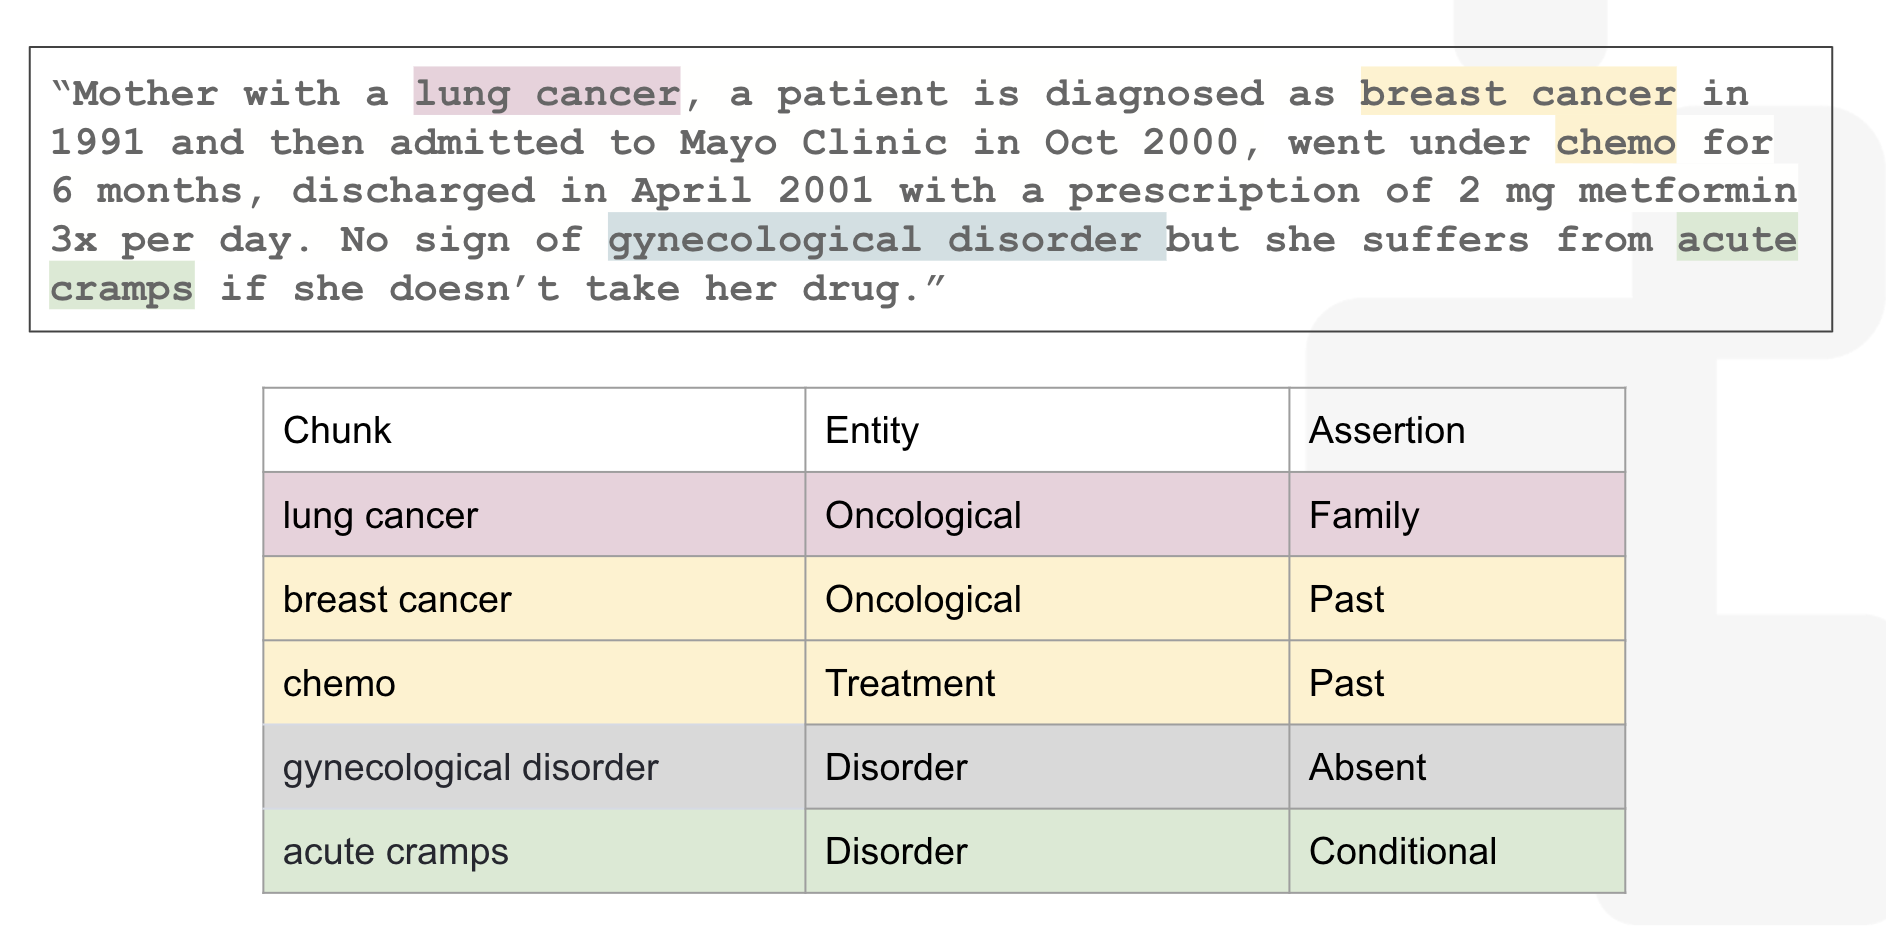

### Pretrained Assertion Status Models

|    | model_name              |Predicted Entities|
|---:|:------------------------|-|
|  1 | [assertion_dl](https://nlp.johnsnowlabs.com/2021/01/26/assertion_dl_en.html)            |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  2 | [assertion_dl_biobert](https://nlp.johnsnowlabs.com/2021/01/26/assertion_dl_biobert_en.html)    |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  3 | [assertion_dl_healthcare](https://nlp.johnsnowlabs.com/2020/09/23/assertion_dl_healthcare_en.html) |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  4 | [assertion_dl_large](https://nlp.johnsnowlabs.com/2020/05/21/assertion_dl_large_en.html)      |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  5 | [assertion_dl_radiology](https://nlp.johnsnowlabs.com/2021/03/18/assertion_dl_radiology_en.html)   |Confirmed, Suspected, Negative|
|  6 | [assertion_jsl](https://nlp.johnsnowlabs.com/2021/07/24/assertion_jsl_en.html)           |Present, Absent, Possible, Planned, Someoneelse, Past, Family, Hypotetical|
|  7 | [assertion_jsl_large](https://nlp.johnsnowlabs.com/2021/07/24/assertion_jsl_large_en.html)     |present, absent, possible, planned, someoneelse, past, hypothetical|
|  8 |  [assertion_ml](https://nlp.johnsnowlabs.com/2020/01/30/assertion_ml_en.html) |Hypothetical, Present, Absent, Possible, Conditional, Associated_with_someone_else|
|  9 | [assertion_dl_scope_L10R10](https://nlp.johnsnowlabs.com/2022/03/17/assertion_dl_scope_L10R10_en_3_0.html)| hypothetical, associated_with_someone_else, conditional, possible, absent, present|
| 10 | [assertion_dl_biobert_scope_L10R10](https://nlp.johnsnowlabs.com/2022/03/24/assertion_dl_biobert_scope_L10R10_en_2_4.html)| hypothetical, associated_with_someone_else, conditional, possible, absent, present|
| 11 | [assertion_jsl_augmented](https://nlp.johnsnowlabs.com/2022/09/15/assertion_jsl_augmented_en.html)| Present, Absent, Possible, Planned, Past, Family, Hypotetical, SomeoneElse|




Let's start to create a Pipeline in order to detect assertion statuses with `assertion_dl` pretrained model. <br/>
This model detects following assertion status;
`absent`, `present`, `conditional`, `associated_with_someone_else`, `hypothetical`, `possible`.

And we will use **`AssertionFilterer`** for filtering out the NERs by the list of acceptable assertion statuses. This annotator would be quite handy if you want to set a white list for the acceptable assertion statuses like `present` or `conditional`; and do not want `absent` conditions get out of your pipeline.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

clinical_ner = MedicalNerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "clinical_ner"]) \
    .setOutputCol("clinical_ner_chunk")

# Assertion model trained on i2b2 (sampled from MIMIC) dataset
clinical_assertion = AssertionDLModel.pretrained("assertion_dl", "en", "clinical/models") \
    .setInputCols(["sentence", "clinical_ner_chunk", "embeddings"]) \
    .setOutputCol("assertion")\
    # .setScopeWindow([9,15]) # default [9,15]

# filter out the named entities by the list of acceptable assertion statuses. present here.
assertion_filterer = AssertionFilterer()\
    .setInputCols("sentence","clinical_ner_chunk","assertion")\
    .setOutputCol("assertion_filtered")\
    .setWhiteList(["present"])

assertionPipeline = Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    clinical_ner_converter,
    clinical_assertion,
    assertion_filterer
    ])


assertion_model = assertionPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]
assertion_dl download started this may take some time.
[OK!]


Creating example dataframe with sample text and check the results


In [ ]:
text = """
Patient with severe fever and sore throat also suffers from pain.
He shows no stomach pain and he maintained on an epidural and PCA for pain control.
He also become short of breath with climbing a flight of stairs.
After CT, lung tumor located at the right lower lobe. Father with Alzheimer.
"""

data = spark.createDataFrame([[text]]).toDF("text")

# fit/transform and show
results = assertion_model.transform(data)
results.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|        clinical_ner|  clinical_ner_chunk|           assertion|  assertion_filtered|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nPatient with se...|[{document, 0, 29...|[{document, 1, 65...|[{token, 1, 7, Pa...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 14, 25, ...|[{assertion, 14, ...|[{chunk, 14, 25, ...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



In [ ]:
results.select(F.explode(F.arrays_zip(results.clinical_ner_chunk.result, results.clinical_ner_chunk.metadata, results.assertion.result)).alias("cols"))\
       .select(F.expr("cols['0']").alias("ner_chunk"),
               F.expr("cols['1']['entity']").alias("entities"),
               F.expr("cols['2']").alias("assertion")).show(truncate=False)

+---------------+---------+----------------------------+
|ner_chunk      |entities |assertion                   |
+---------------+---------+----------------------------+
|severe fever   |PROBLEM  |present                     |
|sore throat    |PROBLEM  |present                     |
|pain           |PROBLEM  |present                     |
|stomach pain   |PROBLEM  |absent                      |
|an epidural    |TREATMENT|present                     |
|PCA            |TREATMENT|possible                    |
|pain control   |PROBLEM  |hypothetical                |
|short of breath|PROBLEM  |conditional                 |
|CT             |TEST     |present                     |
|lung tumor     |PROBLEM  |present                     |
|Alzheimer      |PROBLEM  |associated_with_someone_else|
+---------------+---------+----------------------------+



#### Assertion Filterer Results

In [ ]:
assertion_filterer.getWhiteList()

['present']

Here are our filtered (only present assertions) chunks;

In [ ]:
results.select("assertion_filtered.result").show(truncate=False)

+--------------------------------------------------------------+
|result                                                        |
+--------------------------------------------------------------+
|[severe fever, sore throat, pain, an epidural, CT, lung tumor]|
+--------------------------------------------------------------+



As you see above, **"stomach pain"**, **"short of breath"** and **"Alzheimer"** are not in the filtered results.

### Assertion Visualizer

Also, we can visualize the assertion results by using `AssertionVisualizer` of Sparknlp-Display library.

Now, we will create a LightPipeline with our existing model and visualize the results.

In [ ]:
from sparknlp_display import AssertionVisualizer

light_model = LightPipeline(assertion_model)
light_result = light_model.fullAnnotate(text)[0]

vis = AssertionVisualizer()
vis.display(light_result, 'clinical_ner_chunk', 'assertion')

### Train a Custom Assertion Model

To train an assertion status detection model, please check:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/2.Clinical_Assertion_Model.ipynb

# 4.Clinical Deidentification

Protected Health Information:
- individual’s past, present, or future physical or mental health or condition
- provision of health care to the individual
- past, present, or future payment for the health care

Protected health information includes many common identifiers (e.g., name, address, birth date, Social Security Number) when they can be associated with the health information.

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_ner_deid](https://nlp.johnsnowlabs.com/2021/09/13/bert_token_classifier_ner_deid_en.html)  | 10| [ner_deid_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_pipeline_en_3_0.html)  | 19| [ner_deid_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_large_pipeline_en_3_0.html)  | 28| [ner_deid_subentity_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_pipeline_en_3_0.html)  |
| 2| [bert_token_classifier_ner_deid_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_deid_pipeline_en_3_0.html)  | 11| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_generic_it_3_0.html)  | 20| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  | 29| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_bert_ro_3_0.html)  |
| 3| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  | 12| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2021/06/30/ner_deid_generic_augmented_en.html)  | 21| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  | 30| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  |
| 4| [ner_deid_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_augmented_pipeline_en_3_0.html)  | 13| [ner_deid_generic_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_augmented_pipeline_en_3_0.html)  | 22| [ner_deid_sd_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_large_pipeline_en_3_0.html)  | 31| [ner_deid_subentity_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_pipeline_de_3_0.html)  |
| 5| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  | 14| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  | 23| [ner_deid_sd_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_pipeline_en_3_0.html)  | 32| [ner_deid_subentity_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_subentity_roberta_es.html)  |
| 6| [ner_deid_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_biobert_pipeline_en_3_0.html)  | 15| [ner_deid_generic_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_pipeline_de_3_0.html)  | 24| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_subentity_it_2_4.html)  | 33| [ner_deid_subentity_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_roberta_augmented_es.html)  |
| 7| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  | 16| [ner_deid_generic_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_generic_roberta_es.html)  | 25| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  | 34| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |
| 8| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  | 17| [ner_deid_generic_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_roberta_augmented_es.html)  | 26| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  | 35| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  |
| 9| [ner_deid_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_biobert_pipeline_en_3_0.html)  | 18| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  | 27| [ner_deid_subentity_augmented_i2b2_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_i2b2_pipeline_en_3_0.html)  | 36| [ner_deidentify_dl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deidentify_dl_pipeline_en_3_0.html)  |



|index| model                     |   language |index| model                     |   language |         
|----:|:-----------------------------------|--:|----:|:-----------------------------------|--:|
| 1|[ner_deid_generic]()                   | it| 2|[ner_deid_generic]()                   | es|
| 3|[ner_deid_subentity]()                 | it| 4|[ner_deid_generic_roberta]()           | es|
| 5|[ner_deid_generic]()                   | fr| 6|[ner_deid_generic_augmented]()         | es|
| 7|[ner_deid_subentity]()                 | fr| 8|[ner_deid_generic_roberta_augmented]() | es|
| 9|[	ner_deid_generic]()                  | de|10|[ner_deid_subentity]()                 | es|
|11|[ner_deid_generic_pipeline]()          | de|12|[ner_deid_subentity_roberta]()         | es|
|13|[ner_deid_subentity]()                 | de|14|[ner_deid_subentity_augmented]()       | es|
|15|[ner_deid_subentity_pipeline]()          | de|16|[ner_deid_subentity_roberta_augmented]()| es|
|17|[clinical_deidentification](https://nlp.johnsnowlabs.com/2022/03/03/clinical_deidentification_de_3_0.html)          | de|18|[german_deid_pipeline_spark24](https://nlp.johnsnowlabs.com/2022/03/03/german_deid_pipeline_spark24_de_2_4.html)| de|

You can find German, Spanish, French, and Italian deidentification models and pretrained pipeline examples in these notebooks:


*   [Clinical Deidentification in German notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.1.Clinical_Deidentification_in_German.ipynb)
*   [Clinical Deidentification in Spanish notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.2.Clinical_Deidentification_in_Spanish.ipynb)
*   [Clinical Deidentification in French notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.5.Clinical_Deidentification_in_French.ipynb)
*   [Clinical Deidentification in Italian notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.6.Clinical_Deidentification_in_Italian.ipynb)

First, we will load NER pipeline to identify protected entities. Pretrained NER models extract:

- Name
- Profession
- Age
- Date
- Contact(Telephone numbers, FAX numbers, Email addresses)
- Location (Address, City, Postal code, Hospital Name, Employment information)
- Id (Social Security numbers, Medical record numbers, Internet protocol addresses)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge datasets)
deid_ner = MedicalNerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")

deidPipeline = Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR #7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

In [ ]:
result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))

Let's check extracted sensitive entities by NER piepline

In [ ]:
result.select(F.explode(F.arrays_zip(result.deid_ner_chunk.result, result.deid_ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|#7194334                     |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+



Sometimes we need to leave some entities in the text, for example, if we want to analyze the frequency of the disease by the hospital. In this case, we may use the parameter **`setBlackList()`** to modify `ner_chunk` output.

So, if we want to exclude the location, we need to specify this tag in the list:

In [ ]:
filtered_ner_converter = NerConverterInternal()\
    .setInputCols(["sentence", "token", "deid_ner"])\
    .setOutputCol("deid_ner_chunk") \
    .setBlackList(['LOCATION'])

deidPipeline = Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    filtered_ner_converter])


model_with_black_list = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

result_with_black_list = model_with_black_list.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
print("All Labels :")
result.select(F.explode(F.arrays_zip(result.deid_ner_chunk.result, result.deid_ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

print("BlackListed Labels ('LOCATION' was excluded): ")
result_with_black_list.select(F.explode(F.arrays_zip(result_with_black_list.deid_ner_chunk.result, result_with_black_list.deid_ner_chunk.metadata)).alias("cols")) \
                      .select(F.expr("cols['0']").alias("chunk"),
                              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

All Labels :
+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|#7194334                     |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+

BlackListed Labels ('LOCATION' was excluded): 
+---------------+---------+
|chunk          |ner_label|
+---------------+---------+
|2093-01-13     |DATE     |
|David Hale     |NAME     |
|Hendrickson Ora|NAME     |
|#7194334       |ID       |
|01/13/93       |DATE     |
|Oliveira       |NAME     |
|25             |AGE      |
|2079-11-09     |DATE     |
|

### Masking

Now, we will replace this enitites with tags, this process is called **"masking"**. We will specifiy `setMode()` parameter as `setMode("mask")` in `DeIdentification()` in order to apply masking

In [ ]:
deid_ner_converter = NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")

deidentification = DeIdentification() \
      .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setReturnEntityMappings(True) #  return a new column to save the mappings between the mask/obfuscated entities and original entities.
      #.setMappingsColumn("MappingCol") # change the name of the column, 'aux' is default

deidPipeline = Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      deidentification])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|            deid_ner|      deid_ner_chunk|        deidentified|                 aux|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



Let's check the results

In [ ]:
pd.set_option('display.max_colwidth', None)

result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).toPandas()

sentence  \
0                            Record date : 2093-01-13 , David Hale , M.D .   
1                 , Name : Hendrickson Ora , MR #7194334 Date : 01/13/93 .   
2               PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .   
3  Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .   

                                              deidentified  
0                    Record date : <DATE> , <NAME> , M.D .  
1                , Name : <NAME> , MR <ID> Date : <DATE> .  
2  PCP : <NAME> , <AGE> years-old , Record date : <DATE> .  
3              <LOCATION> , <LOCATION> , Phone <CONTACT> .

We have three modes to mask the entities in the Deidentification annotator. You can select the modes using the `.setMaskingPolicy()` parameter. The methods are the followings:

**“entity_labels”**: Mask with the entity type of that chunk. (default) <br/>
**“same_length_chars”**: Mask the deid entities with same length of asterix ( * ) with brackets ( [ , ] ) on both end. <br/>
**“fixed_length_chars”**: Mask the deid entities with a fixed length of asterix ( * ). The length is setting up using the `setFixedMaskLength()` method. <br/>
Let's try each of these and compare the results.

In [ ]:
#deid model with "entity_labels"
deid_entity_labels= DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

#deid model with "same_length_chars"
deid_same_length= DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars")

#deid model with "fixed_length_chars"
deid_fixed_length= DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)


deidPipeline = Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      deid_entity_labels,
      deid_same_length,
      deid_fixed_length])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
policy_result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))
policy_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|            deid_ner|      deid_ner_chunk|   deid_entity_label|                 aux|    deid_same_length|   deid_fixed_length|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 17, ...|[{document, 0, 44...|[{document, 0, 32...|
+--------------------+--------------------+--------------------+----

In [ ]:
policy_result.select(F.explode(F.arrays_zip(policy_result.sentence.result,
                                            policy_result.deid_entity_label.result,
                                            policy_result.deid_same_length.result,
                                            policy_result.deid_fixed_length.result)).alias("cols")) \
             .select(F.expr("cols['0']").alias("sentence"),
                     F.expr("cols['1']").alias("deid_entity_label"),
                     F.expr("cols['2']").alias("deid_same_length"),
                     F.expr("cols['3']").alias("deid_fixed_length")).toPandas()

sentence  \
0                            Record date : 2093-01-13 , David Hale , M.D .   
1                 , Name : Hendrickson Ora , MR #7194334 Date : 01/13/93 .   
2               PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .   
3  Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .   

                                         deid_entity_label  \
0                    Record date : <DATE> , <NAME> , M.D .   
1                , Name : <NAME> , MR <ID> Date : <DATE> .   
2  PCP : <NAME> , <AGE> years-old , Record date : <DATE> .   
3              <LOCATION> , <LOCATION> , Phone <CONTACT> .   

                                                          deid_same_length  \
0                            Record date : [********] , [********] , M.D .   
1                 , Name : [*************] , MR [******] Date : [******] .   
2               PCP : [******] , ** years-old , Record date : [********] .   
3  [***************************] , [***************] , Phone [*********] .   

                                    deid_fixed_length  
0                   Record date : **** , **** , M.D .  
1               , Name : **** , MR **** Date : **** .  
2  PCP : **** , **** years-old , Record date : **** .  
3                          **** , **** , Phone **** .

### Reidentification

We can use `ReIdentification` annotator to go back to the original sentence. Let's see how it works

In [ ]:
reIdentification = ReIdentification()\
    .setInputCols(["aux","deidentified"])\
    .setOutputCol("original")

In [ ]:
reid_result = reIdentification.transform(result)
reid_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|            deid_ner|      deid_ner_chunk|        deidentified|                 aux|            original|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nRecord date : 2...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|[{document, 1, 45...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----

In [ ]:
print(text)

reid_result.select('original.result').show(truncate=False)


Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR #7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[Record date : 2093-01-13 , David Hale ,

Note: We can **enrich our existing Deidentification model with both custom and embedded regex.**

Please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.Clinical_DeIdentification.ipynb) to see details.

### Obfuscation

In the obfuscation mode, **DeIdentificationModel** will replace sensitive entities with random values of the same type.

We can specify `.setMode()` parameter as `.setMode("obfuscate")` to use this feature.

In [ ]:
deid_ner_converter = NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")

obfuscation = DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\

deidPipeline = Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      obfuscation])

obfuscation_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR #7194334 Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

sentence  \
0                  Record date : 2093-01-13 , David Hale , M.D .   
1       , Name : Hendrickson , Ora MR #7194334 Date : 01/13/93 .   
2  Patient : Oliveira, 25 years-old , Record date : 2079-11-09 .   
3                                Cocke County Baptist Hospital .   
4                                              0295 Keats Street   

                                                   deidentified  
0              Record date : 2093-03-03 , Devonna Foley , M.D .  
1               , Name : Nickey Barn #2641881 Date : 03/03/93 .  
2  Patient : Natalie, 23 years-old , Record date : 2079-12-28 .  
3                                             600 Austin Road .  
4                                         1150 Varnum Street Ne

As you see, we succesfully obfuscated the entities.


In addition, we can define a **reference file** for obfuscation. In this way, deid model uses the fake entities that we defined in this file.

If we want to use reference file, we should give the path of txt file that includes our custom entities to the `setObfuscateRefFile()` parameter. Then, we should set `setObfuscateRefSource("file")` parameter.

However, we can set `setObfuscateRefSource` parameter as **faker** or **both** as well.

The faker module allows  the user to use a set of fake entities that are in the memory of the spark-nlp-internal. You can set up this module for using the following property `setObfuscateRefSource('faker')`.

If we select the `setObfuscateRefSource('both')` then we choose the entities randomly using the faker and the fake entities from the obfuscateRefFile.

You can check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.Clinical_DeIdentification.ipynb) to see the usage of these features.





### Structured Deidentification

We can use deidentification not only text but also structured data as well.

Let's see how it works

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/hipaa-table-001.txt

df = spark.read.format("csv") \
    .option("sep", "\t") \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .load("hipaa-table-001.txt")

df = df.withColumnRenamed("PATIENT","NAME")
df.show(truncate=False)

+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|NAME           |DOB       |AGE|ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|Cecilia Chapman|04/02/1935|83 |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|Iris Watson    |03/10/2009|9  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|Bryar Pitts    |11/01/1921|98 |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|Theodore Lowe  |13/02/2002|16 |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|Calista Wise   |20/08/1942|76 |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |
|Kyla Olsen     |12/05/1973|45 |Ap #651-8679 Sodales Av. Tamunin

In [ ]:
from sparknlp_jsl.structured_deidentification import StructuredDeidentification

In [ ]:
obfuscator = StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, obfuscateRefSource = "faker")
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.show(truncate=False)

+---------------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|NAME                 |DOB       |AGE  |ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+---------------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|[Veverly Grace]      |04/02/1935|[87] |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|[Alpheus Jarvis]     |03/10/2009|[5]  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|[Janann Meadow]      |11/01/1921|[82] |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|[Jacquelynn Matter]  |13/02/2002|[13] |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|[Paula Born]         |20/08/1942|[79] |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |


We can define **reference file** for obfuscation as well. All we need to do is defining `obfuscateRefFile` and `obfuscateRefSource` parameters. To see the implementation, please see [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.Clinical_DeIdentification.ipynb)

### Pretrained Deidentification Pipeline

This pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities.

Let's see how it works

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

deid_pipeline = PretrainedPipeline("clinical_deidentification_multi_mode_output", "en", "clinical/models")

clinical_deidentification_multi_mode_output download started this may take some time.
Approx size to download 1.6 GB
[OK!]


In [ ]:
text= """Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, #719435. Dr. John Green, ID: 1231511863, IP 203.120.223.13. He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93. Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B. Phone: 55-555-5555 , 0295 Keats Street, San Francisco, E-MAIL: smith@gmail.com"""

In [ ]:
deid_res= deid_pipeline.annotate(text)

In [ ]:
pd.set_option("display.max_colwidth", 100)

df= pd.DataFrame(list(zip(deid_res["sentence"],
                          deid_res["masked"],
                          deid_res["masked_with_chars"],
                          deid_res["masked_fixed_length_chars"],
                          deid_res["obfuscated"])),
                 columns= ["Sentence", "Masked", "Masked with Chars", "Masked with Fixed Chars", "Obfuscated"])

df

Sentence  \
0                    Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, #719435.   
1                                     Dr. John Green, ID: 1231511863, IP 203.120.223.13.   
2  He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93.   
3     Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B.   
4            Phone: 55-555-5555 , 0295 Keats Street, San Francisco, E-MAIL: smith@gmail.   
5                                                                                    com   

                                                                                 Masked  \
0                             Name : <PATIENT>, Record date: <DATE>, Age: <AGE>, <AGE>.   
1                                              Dr. <DOCTOR>, ID: <DEVICE>, IP <IPADDR>.   
2  He is a <AGE>-year-old male was admitted to the <HOSPITAL> for cystectomy on <DATE>.   
3                         Patient's VIN : <VIN>, SSN <LICENSE>, Driver's license <DLN>.   
4                               Phone: <PHONE> , <STREET>, <CITY>, E-MAIL: smith@gmail.   
5                                                                                   com   

                                                                       Masked with Chars  \
0                    Name : [**************], Record date: [********], Age: **, [*****].   
1                                     Dr. [********], ID: [********], IP [************].   
2  He is a **-year-old male was admitted to the [**********] for cystectomy on [******].   
3     Patient's VIN : [***************], SSN [**********], Driver's license [*********].   
4            Phone: [*********] , [***************], [***********], E-MAIL: smith@gmail.   
5                                                                                    com   

                                                       Masked with Fixed Chars  \
0                             Name : ****, Record date: ****, Age: ****, ****.   
1                                                 Dr. ****, ID: ****, IP ****.   
2  He is a ****-year-old male was admitted to the **** for cystectomy on ****.   
3                       Patient's VIN : ****, SSN ****, Driver's license ****.   
4                               Phone: **** , ****, ****, E-MAIL: smith@gmail.   
5                                                                          com   

                                                                                            Obfuscated  
0                                   Name : Ricardo Chamber, Record date: 2093-02-02, Age: 22, #608524.  
1                                                   Dr. Marnie Siren, ID: F5264678, IP 194.174.88.229.  
2  He is a 66-year-old male was admitted to the MINNESOTA VALLEY HLTH CTR INC for cystectomy on 02/...  
3                   Patient's VIN : 5BMHB05ZLGD563842, SSN #222-55-7777, Driver's license UV:V669988S.  
4                              Phone: 11-111-1111 , 5050 County Road 472, KERAVA, E-MAIL: smith@gmail.  
5                                                                                                  com

# 5.Clinical Relation Extraction

### Pretrained Relation Extraction Models

Extracts and classifies instances of relations between named entities. For this, relation pairs need to be defined with `setRelationPairs`, to specify between which entities the extraction should be done.

We have also trained as end-to-end bert models using **BioBERT** and ported in to the Spark NLP ecosystem (**ReDL**). They offer **SOTA performance** on most benchmark tasks and outperform our existing Relation Extraction Models.


*  **Relation Extraction Models**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [generic_re](https://nlp.johnsnowlabs.com/2022/12/20/generic_re.html)  | 2| [posology_re](https://nlp.johnsnowlabs.com/2020/09/01/posology_re.html)  | 3| [re_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/16/re_ade_biobert_en.html)  |
| 4| [re_ade_clinical](https://nlp.johnsnowlabs.com/2021/07/12/re_ade_clinical_en.html)  | 5| [re_ade_conversational](https://nlp.johnsnowlabs.com/2022/07/27/re_ade_conversational_en_3_0.html)  | 6| [re_bodypart_directions](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_directions_en.html)  |
| 7| [re_bodypart_problem](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_problem_en.html)  | 8| [re_bodypart_proceduretest](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_proceduretest_en.html)  | 9| [re_clinical](https://nlp.johnsnowlabs.com/2020/09/24/re_clinical_en.html)  |
| 10| [re_date_clinical](https://nlp.johnsnowlabs.com/2021/01/18/re_date_clinical_en.html)  | 11| [re_drug_drug_interaction_clinical](https://nlp.johnsnowlabs.com/2020/09/03/re_drug_drug_interaction_clinical_en.html)  | 12| [re_drugprot_clinical](https://nlp.johnsnowlabs.com/2022/01/05/re_drugprot_clinical_en.html)  |
| 13| [re_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/30/re_human_phenotype_gene_clinical_en.html)  | 14| [re_oncology_biomarker_result](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_biomarker_result_en.html)  | 15| [re_oncology_granular](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_granular_en.html)  |
| 16| [re_oncology_location](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_location_en.html)  | 17| [re_oncology_size](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_size_en.html)  | 18| [re_oncology_temporal](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_temporal_en.html)  |
| 19| [re_oncology_test_result](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_test_result_en.html)  | 20| [re_oncology](https://nlp.johnsnowlabs.com/2024/07/03/re_oncology_en.html)  | 21| [re_temporal_events_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_clinical_en.html)  |
| 22| [re_temporal_events_enriched_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_enriched_clinical_en.html)  | 23| [re_test_problem_finding](https://nlp.johnsnowlabs.com/2021/04/19/re_test_problem_finding_en.html)  | 24| [re_test_result_date](https://nlp.johnsnowlabs.com/2021/02/24/re_test_result_date_en.html)  |
| 25| [re_zeroshot_biobert](https://nlp.johnsnowlabs.com/2022/04/05/re_zeroshot_biobert_en_3_0.html)  | 26| [redl_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/12/redl_ade_biobert_en.html)  | 27| [redl_bodypart_direction_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_direction_biobert_en.html)  |
| 28| [redl_bodypart_problem_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_problem_biobert_en.html)  | 29| [redl_bodypart_procedure_test_biobert](https://nlp.johnsnowlabs.com/2021/09/10/redl_bodypart_procedure_test_biobert_en.html)  | 30| [redl_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_chemprot_biobert_en.html)  |
| 31| [redl_clinical_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_clinical_biobert_en.html)  | 32| [redl_date_clinical_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_date_clinical_biobert_en.html)  | 33| [redl_drug_drug_interaction_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_drug_drug_interaction_biobert_en.html)  |
| 34| [redl_drugprot_biobert](https://nlp.johnsnowlabs.com/2023/01/14/redl_drugprot_biobert_en.html)  | 35| [redl_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_human_phenotype_gene_biobert_en.html)  | 36| [redl_nihss_biobert](https://nlp.johnsnowlabs.com/2021/11/16/redl_nihss_biobert_en.html)  |
| 37| [redl_oncology_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_biobert_en.html)  | 38| [redl_oncology_biomarker_result_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_biomarker_result_biobert_en.html)  | 39| [redl_oncology_granular_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_granular_biobert_en.html)  |
| 40| [redl_oncology_location_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_location_biobert_en.html)  | 41| [redl_oncology_size_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_size_biobert_en.html)  | 42| [redl_oncology_temporal_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_temporal_biobert_en.html)  |
| 43| [redl_oncology_test_result_biobert](https://nlp.johnsnowlabs.com/2024/07/03/redl_oncology_test_result_biobert_en.html)  | 44| [redl_temporal_events_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_temporal_events_biobert_en.html)  |


*  **Relation Extraction Pipelines**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [re_bodypart_directions_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_directions_pipeline_en_3_0.html)  | 4| [re_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 7| [re_test_problem_finding_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_problem_finding_pipeline_en_3_0.html)  |
| 2| [re_bodypart_proceduretest_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_proceduretest_pipeline_en_3_0.html)  | 5| [re_temporal_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_clinical_pipeline_en_3_0.html)  | 8| [re_test_result_date_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_result_date_pipeline_en_3_0.html)  |
| 3| [re_date_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_date_clinical_pipeline_en_3_0.html)  | 6| [re_temporal_events_enriched_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_enriched_clinical_pipeline_en_3_0.html)  | |



[In this link](https://nlp.johnsnowlabs.com/docs/en/best_practices_pretrained_models#relation-extraction-models-and-relation-pairs-table), available Relation Extraction models, their labels, optimal NER model, and meaningful relation pairs are illustrated.

#### Posology Relation Extraction

This is a demonstration of using SparkNLP for extracting posology relations. The following relatios are supported:

DRUG-DOSAGE
DRUG-FREQUENCY
DRUG-ADE (Adversed Drug Events)
DRUG-FORM
DRUG-ROUTE
DRUG-DURATION
DRUG-REASON
DRUG=STRENGTH

The model has been validated against the posology dataset described in (Magge, Scotch, & Gonzalez-Hernandez, 2018).

| Relation | Recall | Precision | F1 | F1 (Magge, Scotch, & Gonzalez-Hernandez, 2018) |
| --- | --- | --- | --- | --- |
| DRUG-ADE | 0.66 | 1.00 | **0.80** | 0.76 |
| DRUG-DOSAGE | 0.89 | 1.00 | **0.94** | 0.91 |
| DRUG-DURATION | 0.75 | 1.00 | **0.85** | 0.92 |
| DRUG-FORM | 0.88 | 1.00 | **0.94** | 0.95* |
| DRUG-FREQUENCY | 0.79 | 1.00 | **0.88** | 0.90 |
| DRUG-REASON | 0.60 | 1.00 | **0.75** | 0.70 |
| DRUG-ROUTE | 0.79 | 1.00 | **0.88** | 0.95* |
| DRUG-STRENGTH | 0.95 | 1.00 | **0.98** | 0.97 |


*Magge, Scotch, Gonzalez-Hernandez (2018) collapsed DRUG-FORM and DRUG-ROUTE into a single relation.

**Build pipeline using SparNLP pretrained models and the relation extration model optimized for posology**.

 The precision of the RE model is controlled by "setMaxSyntacticDistance(4)", which sets the maximum syntactic distance between named entities to 4. A larger value will improve recall at the expense at lower precision. A value of 4 leads to literally perfect precision (i.e. the model doesn't produce any false positives) and reasonably good recall.

In [ ]:
posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

ner_posology download started this may take some time.
[OK!]


In [ ]:
dependency_parser = DependencyParserModel.pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [ ]:
documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentencer = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

words_embedder = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel.pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "posology_ner"]) \
    .setOutputCol("posology_ner_chunk")

dependency_parser = DependencyParserModel.pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

reModel = RelationExtractionModel()\
    .pretrained("posology_re")\
    .setInputCols(["embeddings", "pos_tags", "posology_ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\
#   .setRelationPairs(["DRUG-FREQUENCY, FREQUENCY-DRUG", "DOSAGE-DRUG, DRUG-DOSAGE"])\
#   .setRelationPairsCaseSensitive(False)

relationPipeline = Pipeline(stages=[
    documenter,
    sentencer,
    tokenizer,
    words_embedder,
    pos_tagger,
    posology_ner,
    posology_ner_converter,
    dependency_parser,
    reModel
])


relation_model = relationPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
ner_posology download started this may take some time.
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


Now, let's create a light pipeline for annotating free text

In [ ]:
text = """
The patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also
given 1 unit of Metformin daily.
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night ,
12 units of insulin lispro with meals , and metformin 1000 mg two times a day.
"""

lmodel = LightPipeline(relation_model)
results = lmodel.fullAnnotate(text)

In [ ]:
from sparknlp_display import RelationExtractionVisualizer

'''
The `RelationExtractionVisualizer` can be used to visualize the relations predicted by Spark NLP.
The two entities involved in a relation will be highlighted and their label will be displayed.
Also a directed and labeled arc(line) will be used to connect the two entities.
'''
vis = RelationExtractionVisualizer()
vis.display(results[0], 'relations', show_relations=True) # default show_relations: True

In [ ]:
results[0].keys()

dict_keys(['posology_ner', 'document', 'posology_ner_chunk', 'token', 'relations', 'embeddings', 'pos_tags', 'dependencies', 'sentence'])

In [ ]:
results[0]['posology_ner_chunk']

[Annotation(chunk, 28, 33, 1 unit, {'entity': 'DOSAGE', 'confidence': '0.71675', 'ner_source': 'posology_ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 38, 42, Advil, {'entity': 'DRUG', 'confidence': '0.9984', 'ner_source': 'posology_ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 44, 53, for 5 days, {'entity': 'DURATION', 'confidence': '0.7455', 'ner_source': 'posology_ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 95, 100, 1 unit, {'entity': 'DOSAGE', 'confidence': '0.72360003', 'ner_source': 'posology_ner_chunk', 'chunk': '3', 'sentence': '1'}, []),
 Annotation(chunk, 105, 113, Metformin, {'entity': 'DRUG', 'confidence': '0.9998', 'ner_source': 'posology_ner_chunk', 'chunk': '4', 'sentence': '1'}, []),
 Annotation(chunk, 115, 119, daily, {'entity': 'FREQUENCY', 'confidence': '0.9997', 'ner_source': 'posology_ner_chunk', 'chunk': '5', 'sentence': '1'}, []),
 Annotation(chunk, 189, 196, 40 units, {'entity': 'DOSAGE', 'confi

In [ ]:
results[0]['relations']

[Annotation(category, 28, 42, DOSAGE-DRUG, {'chunk2': 'Advil', 'confidence': '1.0', 'entity2_end': '42', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '38', 'chunk2_confidence': '0.9984', 'entity1_begin': '28', 'sentence': '0', 'direction': 'both', 'entity1_end': '33', 'entity2': 'DRUG', 'chunk1_confidence': '0.71675'}, []),
 Annotation(category, 38, 53, DRUG-DURATION, {'chunk2': 'for 5 days', 'confidence': '1.0', 'entity2_end': '53', 'chunk1': 'Advil', 'entity1': 'DRUG', 'entity2_begin': '44', 'chunk2_confidence': '0.7455', 'entity1_begin': '38', 'sentence': '0', 'direction': 'both', 'entity1_end': '42', 'entity2': 'DURATION', 'chunk1_confidence': '0.9984'}, []),
 Annotation(category, 95, 113, DOSAGE-DRUG, {'chunk2': 'Metformin', 'confidence': '1.0', 'entity2_end': '113', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '105', 'chunk2_confidence': '0.9998', 'entity1_begin': '95', 'sentence': '1', 'direction': 'both', 'entity1_end': '100', 'entity2': 'DRUG', 'chunk

Showing extracted relations

In [ ]:
for rel in results[0]["relations"]:
    print("{}({}={} - {}={})".format(
        rel.result,
        rel.metadata['entity1'],
        rel.metadata['chunk1'],
        rel.metadata['entity2'],
        rel.metadata['chunk2']
    ))

DOSAGE-DRUG(DOSAGE=1 unit - DRUG=Advil)
DRUG-DURATION(DRUG=Advil - DURATION=for 5 days)
DOSAGE-DRUG(DOSAGE=1 unit - DRUG=Metformin)
DRUG-FREQUENCY(DRUG=Metformin - FREQUENCY=daily)
DOSAGE-DRUG(DOSAGE=40 units - DRUG=insulin glargine)
DRUG-FREQUENCY(DRUG=insulin glargine - FREQUENCY=at night)
DOSAGE-DRUG(DOSAGE=12 units - DRUG=insulin lispro)
DRUG-FREQUENCY(DRUG=insulin lispro - FREQUENCY=with meals)
DRUG-STRENGTH(DRUG=metformin - STRENGTH=1000 mg)
DRUG-FREQUENCY(DRUG=metformin - FREQUENCY=two times a day)


In [ ]:
import pandas as pd

def get_relations_df (results, col='relations'):
  rel_pairs=[]
  for rel in results[0][col]:
      rel_pairs.append((
          rel.result,
          rel.metadata['entity1'],
          rel.metadata['entity1_begin'],
          rel.metadata['entity1_end'],
          rel.metadata['chunk1'],
          rel.metadata['entity2'],
          rel.metadata['entity2_begin'],
          rel.metadata['entity2_end'],
          rel.metadata['chunk2'],
          rel.metadata['confidence']
      ))

  rel_df = pd.DataFrame(rel_pairs, columns=['relation','entity1','entity1_begin','entity1_end','chunk1','entity2','entity2_begin','entity2_end','chunk2', 'confidence'])

  return rel_df


rel_df = get_relations_df (results)
rel_df

relation entity1 entity1_begin entity1_end            chunk1  \
0     DOSAGE-DRUG  DOSAGE            28          33            1 unit   
1   DRUG-DURATION    DRUG            38          42             Advil   
2     DOSAGE-DRUG  DOSAGE            95         100            1 unit   
3  DRUG-FREQUENCY    DRUG           105         113         Metformin   
4     DOSAGE-DRUG  DOSAGE           189         196          40 units   
5  DRUG-FREQUENCY    DRUG           201         216  insulin glargine   
6     DOSAGE-DRUG  DOSAGE           229         236          12 units   
7  DRUG-FREQUENCY    DRUG           241         254    insulin lispro   
8   DRUG-STRENGTH    DRUG           273         281         metformin   
9  DRUG-FREQUENCY    DRUG           273         281         metformin   

     entity2 entity2_begin entity2_end            chunk2 confidence  
0       DRUG            38          42             Advil        1.0  
1   DURATION            44          53        for 5 days        1.0  
2       DRUG           105         113         Metformin        1.0  
3  FREQUENCY           115         119             daily        1.0  
4       DRUG           201         216  insulin glargine        1.0  
5  FREQUENCY           218         225          at night        1.0  
6       DRUG           241         254    insulin lispro        1.0  
7  FREQUENCY           256         265        with meals        1.0  
8   STRENGTH           283         289           1000 mg        1.0  
9  FREQUENCY           291         305   two times a day        1.0


#### ReDL - ADE

Now, let's create a sample pipeline with `redl_ade_biobert` model and see how it works

In [ ]:
documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentencer = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

words_embedder = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel.pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

ade_ner = MedicalNerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ade_ner")

ade_ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "ade_ner"]) \
    .setOutputCol("ade_ner_chunk")

ade_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ade_ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])

ade_re_model = RelationExtractionDLModel()\
    .pretrained('redl_ade_biobert', 'en', "clinical/models") \
    .setPredictionThreshold(0.5)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

ade_pipeline = Pipeline(stages=[
    documenter,
    sentencer,
    tokenizer,
    words_embedder,
    pos_tagger,
    ade_ner,
    ade_ner_converter,
    dependency_parser,
    ade_re_ner_chunk_filter,
    ade_re_model
])

ade_model = ade_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
ner_ade_clinical download started this may take some time.
[OK!]
redl_ade_biobert download started this may take some time.
[OK!]


Checking the results

In [ ]:
text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_lmodel = LightPipeline(ade_model)
ade_results = ade_lmodel.fullAnnotate(text)

rel_df = get_relations_df (ade_results)
rel_df

relation entity1 entity1_begin entity1_end     chunk1 entity2 entity2_begin  \
0        1    DRUG            25          32   naproxen     ADE           137   
1        1    DRUG            25          32   naproxen     ADE           154   
2        1    DRUG            87          95  oxaprozin     ADE           137   
3        1    DRUG            87          95  oxaprozin     ADE           154   

  entity2_end                                                     chunk2  \
0         148                                               tense bullae   
1         210  cutaneous fragility on the face and the back of the hands   
2         148                                               tense bullae   
3         210  cutaneous fragility on the face and the back of the hands   

   confidence  
0   0.9989047  
1   0.9989704  
2  0.99895453  
3  0.99900633

In [ ]:
vis = RelationExtractionVisualizer()
vis.display(ade_results[0], 'relations', show_relations=True)

Additionally, we can **merge multiple RE model results** by using `AnnotationMerger()`. You can see the details in [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/10.Clinical_Relation_Extraction.ipynb).

## Train a Custom Relation Extraction Model

To tarin a Relation Extraction model, please check:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/10.Clinical_Relation_Extraction.ipynb

# 6.Clinical Entity Resolvers

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>Before continuing, <font color='darkred'> RESET the COLAB RUNTIME, INSTALL the LIBRARIES, START the SparkSession </font> and go ahead because of the memory issue.<b>

In [ ]:
import json
import os
from google.colab import files

license_keys = files.upload()

with open(list(license_keys.keys())[0]) as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)

# Adding license key-value pairs to environment variables
os.environ.update(license_keys)


In [ ]:
# Installing pyspark and spark-nlp
! pip install --upgrade -q pyspark==3.1.2 spark-nlp==$PUBLIC_VERSION

# Installing Spark NLP Healthcare
! pip install --upgrade -q spark-nlp-jsl==$JSL_VERSION  --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

# Spark NLP open-source visualization library
! pip -q install spark-nlp-display

In [ ]:
import functools
import numpy as np
import pandas as pd
from scipy import spatial

import pyspark.sql.types as T
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import sparknlp
import sparknlp_jsl
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *


params = {"spark.driver.memory":"16G",
"spark.kryoserializer.buffer.max":"2000M",
"spark.driver.maxResultSize":"2000M"}

spark = sparknlp_jsl.start(license_keys['SECRET'],params=params)

print ("Spark NLP Version :", sparknlp.version())
print ("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark

Spark NLP Version : 5.5.3
Spark NLP_JSL Version : 5.5.3


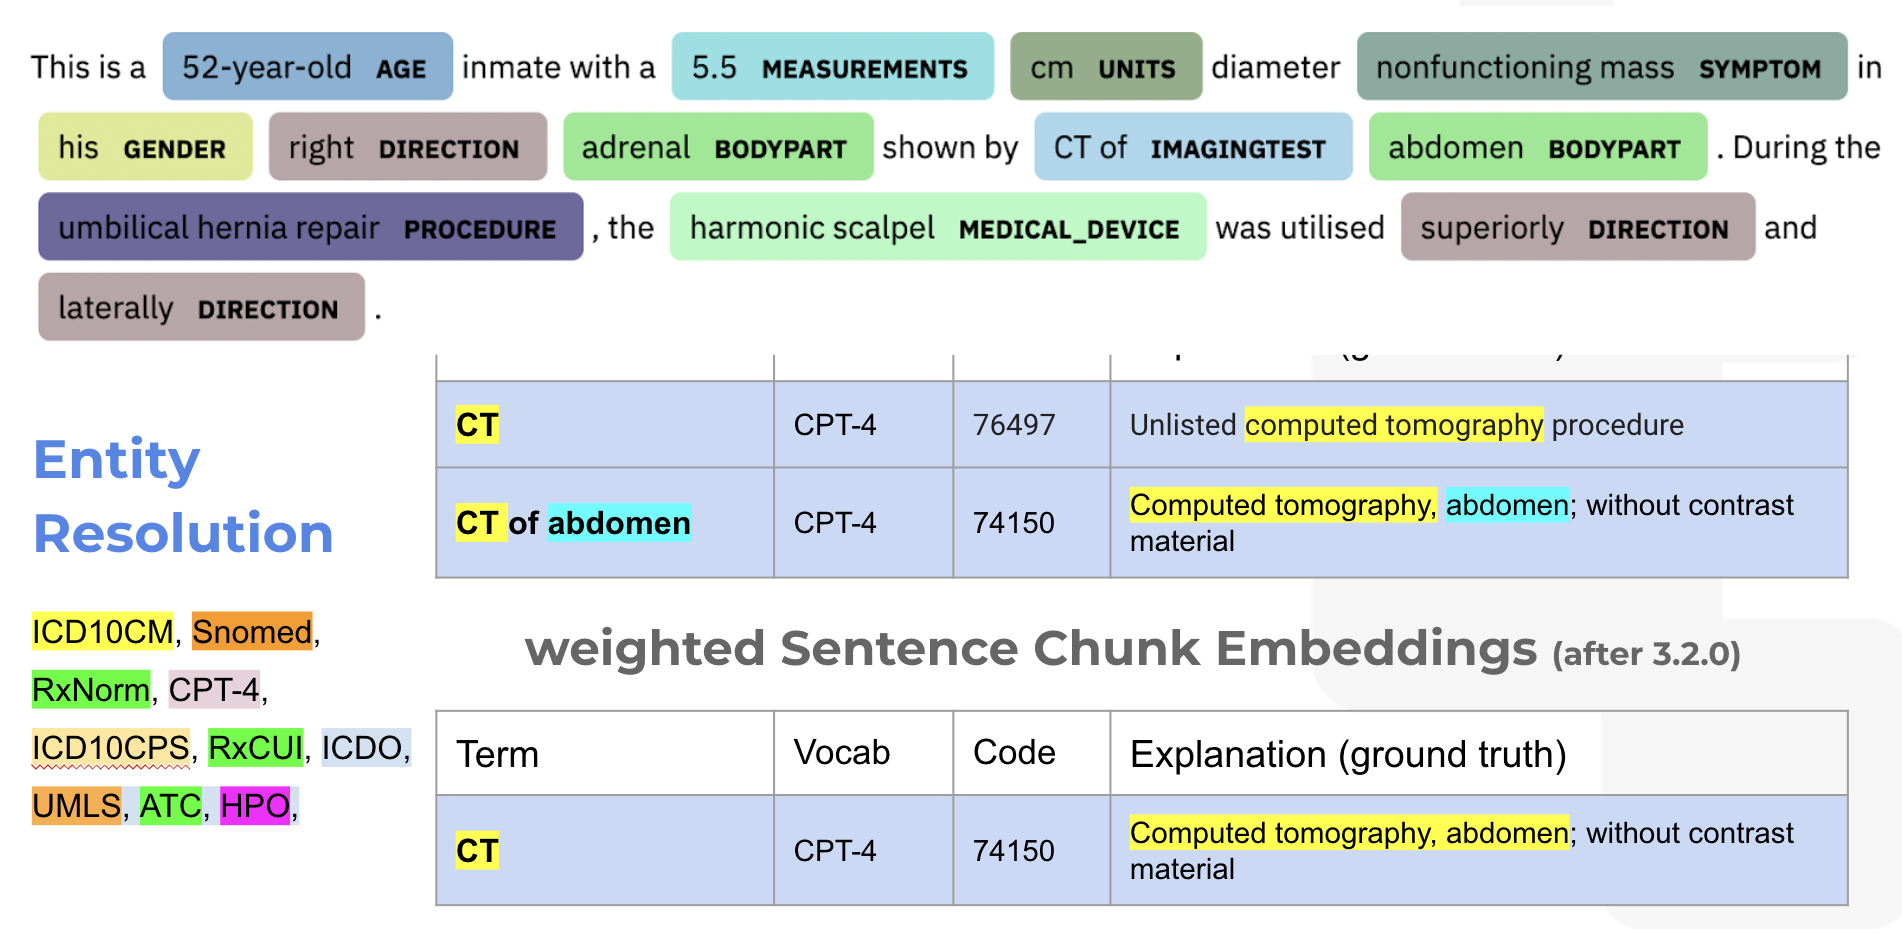

## Sentence Entity Resolver Models

**Entity Resolvers in SparkNLP**
- RxNorm
- ICD10-CM
- CPT
- SNOMED
- LOINC
- UMLS
- HPO
- HCPCS
- ICD-O
- MeSH
- NDC
- RX-CUI
- ATC


<center><b>MODEL LIST</b>

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [biolordresolve_avg_rxnorm_augmented](https://nlp.johnsnowlabs.com/2024/05/07/biolordresolve_avg_rxnorm_augmented_en.html)  | 2| [biolordresolve_avg_rxnorm_augmented_v2](https://nlp.johnsnowlabs.com/2024/08/20/biolordresolve_avg_rxnorm_augmented_v2_en.html)  | 3| [biolordresolve_cpt_procedures_measurements_augmented](https://nlp.johnsnowlabs.com/2024/05/08/biolordresolve_cpt_procedures_measurements_augmented_en.html)  | 4| [biolordresolve_icd10cm_augmented_billable_hcc](https://nlp.johnsnowlabs.com/2024/09/12/biolordresolve_icd10cm_augmented_billable_hcc_en.html)  |
| 5| [biolordresolve_loinc_augmented](https://nlp.johnsnowlabs.com/2024/10/08/biolordresolve_loinc_augmented_en.html)  | 6| [biolordresolve_rxnorm_augmented](https://nlp.johnsnowlabs.com/2024/05/06/biolordresolve_rxnorm_augmented_en.html)  | 7| [biolordresolve_rxnorm_augmented_v2](https://nlp.johnsnowlabs.com/2024/08/19/biolordresolve_rxnorm_augmented_v2_en.html)  | 8| [biolordresolve_snomed_findings_aux_concepts](https://nlp.johnsnowlabs.com/2024/05/07/biolordresolve_snomed_findings_aux_concepts_en.html)  |
| 9| [biolordresolve_umls_general_concepts](https://nlp.johnsnowlabs.com/2024/05/06/biolordresolve_umls_general_concepts_en.html)  | 10| [medembed_base_rxnorm_augmented](https://nlp.johnsnowlabs.com/2024/11/19/medembed_base_rxnorm_augmented_en.html)  | 11| [medmebed_large_rxnorm_augmented](https://nlp.johnsnowlabs.com/2024/11/19/medmebed_large_rxnorm_augmented_en.html)  | 12| [mpnetresolve_icd10_cms_hcc_2024_midyear](https://nlp.johnsnowlabs.com/2024/07/27/mpnetresolve_icd10_cms_hcc_2024_midyear_en.html)  |
| 13| [sbertresolve_hcc_augmented](https://nlp.johnsnowlabs.com/2024/09/04/sbertresolve_hcc_augmented_en.html)  | 14| [sbertresolve_icd10cm_augmented](https://nlp.johnsnowlabs.com/2024/09/03/sbertresolve_icd10cm_augmented_en.html)  | 15| [sbertresolve_icd10cm_augmented_billable_hcc](https://nlp.johnsnowlabs.com/2024/09/04/sbertresolve_icd10cm_augmented_billable_hcc_en.html)  | 16| [sbertresolve_icd10cm_slim_billable_hcc](https://nlp.johnsnowlabs.com/2023/05/31/sbertresolve_icd10cm_slim_billable_hcc_en.html)  |
| 17| [sbertresolve_icd10cm_slim_billable_hcc_med](https://nlp.johnsnowlabs.com/2021/05/25/sbertresolve_icd10cm_slim_billable_hcc_med_en.html)  | 18| [sbertresolve_jsl_rxnorm_augmented_med](https://nlp.johnsnowlabs.com/2021/12/28/sbertresolve_jsl_rxnorm_augmented_med_en.html)  | 19| [sbertresolve_ner_model_finder](https://nlp.johnsnowlabs.com/2022/09/05/sbertresolve_ner_model_finder_en.html)  | 20| [sbertresolve_rxnorm_disposition](https://nlp.johnsnowlabs.com/2021/08/28/sbertresolve_rxnorm_disposition_en.html)  |
| 21| [sbertresolve_snomed_bodyStructure_med](https://nlp.johnsnowlabs.com/2021/06/15/sbertresolve_snomed_bodyStructure_med_en.html)  | 22| [sbertresolve_snomed_conditions](https://nlp.johnsnowlabs.com/2021/08/28/sbertresolve_snomed_conditions_en.html)  | 23| [sbiobertresolve_HPO](https://nlp.johnsnowlabs.com/2021/05/16/sbiobertresolve_HPO_en.html)  | 24| [sbiobertresolve_atc](https://nlp.johnsnowlabs.com/2022/03/01/sbiobertresolve_atc_en_2_4.html)  |
| 25| [sbiobertresolve_clinical_abbreviation_acronym](https://nlp.johnsnowlabs.com/2022/01/03/sbiobertresolve_clinical_abbreviation_acronym_en.html)  | 26| [sbiobertresolve_clinical_snomed_procedures_measurements](https://nlp.johnsnowlabs.com/2021/11/15/sbiobertresolve_clinical_snomed_procedures_measurements_en.html)  | 27| [sbiobertresolve_cpt](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_cpt_en.html)  | 28| [sbiobertresolve_cpt_augmented](https://nlp.johnsnowlabs.com/2021/05/30/sbiobertresolve_cpt_augmented_en.html)  |
| 29| [sbiobertresolve_cpt_procedures_augmented](https://nlp.johnsnowlabs.com/2021/05/30/sbiobertresolve_cpt_procedures_augmented_en.html)  | 30| [sbiobertresolve_cpt_procedures_measurements_augmented](https://nlp.johnsnowlabs.com/2022/05/10/sbiobertresolve_cpt_procedures_measurements_augmented_en_3_0.html)  | 31| [sbiobertresolve_cvx](https://nlp.johnsnowlabs.com/2022/10/12/sbiobertresolve_cvx_en.html)  | 32| [sbiobertresolve_hcc_augmented](https://nlp.johnsnowlabs.com/2024/09/02/sbiobertresolve_hcc_augmented_en.html)  |
| 33| [sbiobertresolve_hcpcs](https://nlp.johnsnowlabs.com/2021/09/29/sbiobertresolve_hcpcs_en.html)  | 34| [sbiobertresolve_hgnc](https://nlp.johnsnowlabs.com/2023/03/26/sbiobertresolve_hgnc_en.html)  | 35| [sbiobertresolve_icd10cm](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icd10cm_en.html)  | 36| [sbiobertresolve_icd10cm_augmented](https://nlp.johnsnowlabs.com/2021/10/31/sbiobertresolve_icd10cm_augmented_en.html)  |
| 37| [sbiobertresolve_icd10cm_augmented_billable_hcc](https://nlp.johnsnowlabs.com/2021/11/01/sbiobertresolve_icd10cm_augmented_billable_hcc_en.html)  | 38| [sbiobertresolve_icd10cm_generalised](https://nlp.johnsnowlabs.com/2021/09/29/sbiobertresolve_icd10cm_generalised_en.html)  | 39| [sbiobertresolve_icd10cm_generalised_augmented](https://nlp.johnsnowlabs.com/2024/09/05/sbiobertresolve_icd10cm_generalised_augmented_en.html)  | 40| [sbiobertresolve_icd10cm_slim_billable_hcc](https://nlp.johnsnowlabs.com/2023/05/31/sbiobertresolve_icd10cm_slim_billable_hcc_en.html)  |
| 41| [sbiobertresolve_icd10cm_slim_normalized](https://nlp.johnsnowlabs.com/2021/05/17/sbiobertresolve_icd10cm_slim_normalized_en.html)  | 42| [sbiobertresolve_icd10pcs](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icd10pcs_en.html)  | 43| [sbiobertresolve_icd10pcs_augmented](https://nlp.johnsnowlabs.com/2022/10/28/sbiobertresolve_icd10pcs_augmented_en.html)  | 44| [sbiobertresolve_icd9](https://nlp.johnsnowlabs.com/2022/09/30/sbiobertresolve_icd9_en.html)  |
| 45| [sbiobertresolve_icdo](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icdo_en.html)  | 46| [sbiobertresolve_icdo_augmented](https://nlp.johnsnowlabs.com/2021/06/22/sbiobertresolve_icdo_augmented_en.html)  | 47| [sbiobertresolve_icdo_base](https://nlp.johnsnowlabs.com/2021/07/02/sbiobertresolve_icdo_base_en.html)  | 48| [sbiobertresolve_jsl_rxnorm_augmented](https://nlp.johnsnowlabs.com/2021/12/27/sbiobertresolve_jsl_rxnorm_augmented_en.html)  |
| 49| [sbiobertresolve_loinc](https://nlp.johnsnowlabs.com/2024/10/07/sbiobertresolve_loinc_en.html)  | 50| [sbiobertresolve_loinc_augmented](https://nlp.johnsnowlabs.com/2024/10/07/sbiobertresolve_loinc_augmented_en.html)  | 51| [sbiobertresolve_loinc_cased](https://nlp.johnsnowlabs.com/2021/12/24/sbiobertresolve_loinc_cased_en.html)  | 52| [sbiobertresolve_loinc_numeric](https://nlp.johnsnowlabs.com/2023/08/01/sbiobertresolve_loinc_numeric_en.html)  |
| 53| [sbiobertresolve_loinc_numeric_augmented](https://nlp.johnsnowlabs.com/2024/10/07/sbiobertresolve_loinc_numeric_augmented_en.html)  | 54| [sbiobertresolve_meddra_lowest_level_term](https://nlp.johnsnowlabs.com/2024/09/02/sbiobertresolve_meddra_lowest_level_term_en.html)  | 55| [sbiobertresolve_meddra_preferred_term](https://nlp.johnsnowlabs.com/2024/09/02/sbiobertresolve_meddra_preferred_term_en.html)  | 56| [sbiobertresolve_mesh](https://nlp.johnsnowlabs.com/2021/11/14/sbiobertresolve_mesh_en.html)  |
| 57| [sbiobertresolve_ncit](https://nlp.johnsnowlabs.com/2023/03/26/sbiobertresolve_ncit_en.html)  | 58| [sbiobertresolve_ndc](https://nlp.johnsnowlabs.com/2024/09/12/sbiobertresolve_ndc_en.html)  | 59| [sbiobertresolve_rxcui](https://nlp.johnsnowlabs.com/2021/05/16/sbiobertresolve_rxcui_en.html)  | 60| [sbiobertresolve_rxnorm](https://nlp.johnsnowlabs.com/2021/10/10/sbiobertresolve_rxnorm_en.html)  |
| 61| [sbiobertresolve_rxnorm_action_treatment](https://nlp.johnsnowlabs.com/2022/04/25/sbiobertresolve_rxnorm_action_treatment_en_2_4.html)  | 62| [sbiobertresolve_rxnorm_augmented](https://nlp.johnsnowlabs.com/2024/06/18/sbiobertresolve_rxnorm_augmented_en.html)  | 63| [sbiobertresolve_rxnorm_augmented_cased](https://nlp.johnsnowlabs.com/2021/12/28/sbiobertresolve_rxnorm_augmented_cased_en.html)  | 64| [sbiobertresolve_rxnorm_augmented_re](https://nlp.johnsnowlabs.com/2022/02/09/sbiobertresolve_rxnorm_augmented_re_en.html)  |
| 65| [sbiobertresolve_rxnorm_augmented_v2](https://nlp.johnsnowlabs.com/2024/08/14/sbiobertresolve_rxnorm_augmented_v2_en.html)  | 66| [sbiobertresolve_rxnorm_disposition](https://nlp.johnsnowlabs.com/2021/08/12/sbiobertresolve_rxnorm_disposition_en.html)  | 67| [sbiobertresolve_rxnorm_ndc](https://nlp.johnsnowlabs.com/2021/10/05/sbiobertresolve_rxnorm_ndc_en.html)  | 68| [sbiobertresolve_rxnorm_nih](https://nlp.johnsnowlabs.com/2023/02/22/sbiobertresolve_rxnorm_nih_en.html)  |
| 69| [sbiobertresolve_snomed_auxConcepts](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_auxConcepts_en.html)  | 70| [sbiobertresolve_snomed_auxConcepts_int](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_auxConcepts_int_en.html)  | 71| [sbiobertresolve_snomed_bodyStructure](https://nlp.johnsnowlabs.com/2024/03/04/sbiobertresolve_snomed_bodyStructure_en.html)  | 72| [sbiobertresolve_snomed_conditions](https://nlp.johnsnowlabs.com/2024/03/04/sbiobertresolve_snomed_conditions_en.html)  |
| 73| [sbiobertresolve_snomed_drug](https://nlp.johnsnowlabs.com/2024/03/06/sbiobertresolve_snomed_drug_en.html)  | 74| [sbiobertresolve_snomed_findings](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_findings_en.html)  | 75| [sbiobertresolve_snomed_findings_auxConcepts](https://nlp.johnsnowlabs.com/2024/02/14/sbiobertresolve_snomed_findings_auxConcepts_en.html)  | 76| [sbiobertresolve_snomed_findings_aux_concepts](https://nlp.johnsnowlabs.com/2024/03/06/sbiobertresolve_snomed_findings_aux_concepts_en.html)  |
| 77| [sbiobertresolve_snomed_findings_int](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_findings_int_en.html)  | 78| [sbiobertresolve_snomed_no_class](https://nlp.johnsnowlabs.com/2024/03/05/sbiobertresolve_snomed_no_class_en.html)  | 79| [sbiobertresolve_snomed_procedures_measurements](https://nlp.johnsnowlabs.com/2021/11/11/sbiobertresolve_snomed_procedures_measurements_en.html)  | 80| [sbiobertresolve_snomed_veterinary](https://nlp.johnsnowlabs.com/2024/06/10/sbiobertresolve_snomed_veterinary_en.html)  |
| 81| [sbiobertresolve_snomed_veterinary_wip](https://nlp.johnsnowlabs.com/2024/05/06/sbiobertresolve_snomed_veterinary_wip_en.html)  | 82| [sbiobertresolve_umls_clinical_drugs](https://nlp.johnsnowlabs.com/2021/10/11/sbiobertresolve_umls_clinical_drugs_en.html)  | 83| [sbiobertresolve_umls_disease_syndrome](https://nlp.johnsnowlabs.com/2021/10/11/sbiobertresolve_umls_disease_syndrome_en.html)  | 84| [sbiobertresolve_umls_drug_substance](https://nlp.johnsnowlabs.com/2024/05/05/sbiobertresolve_umls_drug_substance_en.html)  |
| 85| [sbiobertresolve_umls_findings](https://nlp.johnsnowlabs.com/2021/10/03/sbiobertresolve_umls_findings_en.html)  | 86| [sbiobertresolve_umls_general_concepts](https://nlp.johnsnowlabs.com/2024/05/05/sbiobertresolve_umls_general_concepts_en.html)  | 87| [sbiobertresolve_umls_major_concepts](https://nlp.johnsnowlabs.com/2021/10/03/sbiobertresolve_umls_major_concepts_en.html)  | 88| [sbluebertresolve_loinc](https://nlp.johnsnowlabs.com/2021/04/29/sbluebertresolve_loinc_en.html)  |
| 89| [sbluebertresolve_loinc_uncased](https://nlp.johnsnowlabs.com/2022/01/18/sbluebertresolve_loinc_uncased_en.html)  | 90| [sbluebertresolve_rxnorm_augmented_uncased](https://nlp.johnsnowlabs.com/2021/12/28/sbluebertresolve_rxnorm_augmented_uncased_en.html)  | 91| []()| 92| []()|






<br>
<br>

<b>PRETRAINED PIPELINE LIST</b>

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [hcc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/17/hcc_resolver_pipeline_en.html)  | 2| [hcpcs_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/hcpcs_resolver_pipeline_en.html)  | 3| [hgnc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/hgnc_resolver_pipeline_en.html)  | 4| [hpo_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/18/hpo_resolver_pipeline_en.html)  |
| 5| [icd10cm_generalised_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/icd10cm_generalised_resolver_pipeline_en.html)  | 6| [icd10cm_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/11/02/icd10cm_resolver_pipeline_en.html)  | 7| [icd10cm_rxnorm_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/07/icd10cm_rxnorm_resolver_pipeline_en.html)  | 8| [icd10gm_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/07/01/icd10gm_resolver_pipeline_de.html)  |
| 9| [icd10pcs_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/icd10pcs_resolver_pipeline_en.html)  | 10| [icd9_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/30/icd9_resolver_pipeline_en.html)  | 11| [icdo_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/icdo_resolver_pipeline_en.html)  | 12| [loinc_numeric_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/30/loinc_numeric_resolver_pipeline_en.html)  |
| 13| [loinc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/02/loinc_resolver_pipeline_en.html)  | 14| [meddra_llt_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/26/meddra_llt_resolver_pipeline_en.html)  | 15| [meddra_pt_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/26/meddra_pt_resolver_pipeline_en.html)  | 16| [medication_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_pipeline_en.html)  |
| 17| [medication_resolver_transform_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_transform_pipeline_en.html)  | 18| [mesh_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/25/mesh_resolver_pipeline_en.html)  | 19| [ncit_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/01/ncit_resolver_pipeline_en.html)  | 20| [ndc_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/25/ndc_resolver_pipeline_en.html)  |
| 21| [rxcui_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/02/01/rxcui_resolver_pipeline_en.html)  | 22| [rxnorm_multi_mapper_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/rxnorm_multi_mapper_pipeline_en.html)  | 23| [rxnorm_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/rxnorm_resolver_pipeline_en.html)  | 24| [snomed_auxConcepts_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/12/snomed_auxConcepts_resolver_pipeline_en.html)  |
| 25| [snomed_body_structure_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/05/snomed_body_structure_resolver_pipeline_en.html)  | 26| [snomed_conditions_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_conditions_resolver_pipeline_en.html)  | 27| [snomed_drug_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_drug_resolver_pipeline_en.html)  | 28| [snomed_findings_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/03/snomed_findings_resolver_pipeline_en.html)  |
| 29| [snomed_multi_mapper_pipeline](https://nlp.johnsnowlabs.com/2023/08/16/snomed_multi_mapper_pipeline_en.html)  | 30| [snomed_procedures_measurements_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/01/31/snomed_procedures_measurements_resolver_pipeline_en.html)  | 31| [snomed_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/11/snomed_resolver_pipeline_en.html)  | 32| [snomed_term_resolver_pipeline](https://nlp.johnsnowlabs.com/2024/03/22/snomed_term_resolver_pipeline_en.html)  |
| 33| [umls_clinical_findings_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/03/30/umls_clinical_findings_resolver_pipeline_en.html)  | 34| [umls_disease_syndrome_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/03/30/umls_disease_syndrome_resolver_pipeline_en.html)  | 35| [umls_drug_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/03/29/umls_drug_resolver_pipeline_en.html)  | 36| [umls_drug_substance_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/03/30/umls_drug_substance_resolver_pipeline_en.html)  |
| 37| [umls_major_concepts_resolver_pipeline](https://nlp.johnsnowlabs.com/2023/03/30/umls_major_concepts_resolver_pipeline_en.html)






</center>

You can find all resolver models and more on [Models Hub](https://nlp.johnsnowlabs.com/models?task=Entity+Resolution&edition=Spark+NLP+for+Healthcare) page.

Our pipelines provide more metadata about the matching process other than providing the code in the "result" field;

- target_text -> Text to resolve
- resolved_text -> Best match text
- confidence -> Relative confidence for the top match (distance to probability)
- confidence_ratio -> Relative confidence for the top match. TopMatchConfidence / SecondMatchConfidence
- alternative_codes -> List of other plausible codes (in the KNN neighborhood)
- all_k_resolutions -> All codes descriptions
- all_k_results -> All resolved codes for metrics calculation purposes
- sentence -> SentenceId

We create a pipeline that from each of these problems, will try to assign a resolution on the content, the sentence embeddings and some pretrained models for resolver annotation.

The architecture of this new pipeline will be as follows:

- DocumentAssembler (text -> document)

- SentenceDetector (document -> sentence)

- Tokenizer (sentence -> token)

- WordEmbeddingsModel ([sentence, token] -> embeddings)

- MedicalNerModel ([sentence, token, embeddings] -> ner)

- NerConverter (["sentence, token, ner] -> ner_chunk

- Chunk2Doc (ner_chunk) -> ner_chunk_doc

- BertSentenceEmbeddings (ner_chunk_doc) -> sbert_embeddings

- SentenceEntityResolverModel ([ner_chunk, sbert_embeddings] -> resolution)

So from a text we end having a list of Named Entities (ner_chunk) and their resolutions.

Let's see how we build a resolver pipeline

Firstly, we will write some **generic functions** for getting the codes and relation pairs

In [ ]:
# returns LP resolution results

import pandas as pd
pd.set_option('display.max_colwidth', 0)


def get_codes (lp, text, vocab='icd10cm_code', col_name="ner_chunk", hcc=False):

    full_light_result = lp.fullAnnotate(text)

    chunks = []
    codes = []
    begin = []
    end = []
    resolutions=[]
    all_distances =[]
    all_codes=[]
    all_cosines = []
    all_k_aux_labels=[]

    for chunk, code in zip(full_light_result[0][col_name], full_light_result[0][vocab]):

        begin.append(chunk.begin)
        end.append(chunk.end)
        chunks.append(chunk.result)
        codes.append(code.result)
        all_codes.append(code.metadata['all_k_results'].split(':::'))
        resolutions.append(code.metadata['all_k_resolutions'].split(':::'))
        all_distances.append(code.metadata['all_k_distances'].split(':::'))
        all_cosines.append(code.metadata['all_k_cosine_distances'].split(':::'))
        if hcc:
            try:
                all_k_aux_labels.append(code.metadata['all_k_aux_labels'].split(':::'))
            except:
                all_k_aux_labels.append([])
        else:
            all_k_aux_labels.append([])

    df = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end, 'code':codes, 'all_codes':all_codes,
                       'resolutions':resolutions, 'all_k_aux_labels':all_k_aux_labels,'all_distances':all_cosines})

    if hcc:

        df['billable'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[0] for i in x])
        df['hcc_status'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[1] for i in x])
        df['hcc_code'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[2] for i in x])

    df = df.drop(['all_k_aux_labels'], axis=1)

    return df



In [ ]:
def get_codes_from_df(result_df, chunk, output_col, aux= False):

    """
    Extracts codes from a Spark DataFrame and returns the results in pandas DataFrame format.

    Parameters:
    - result_df (DataFrame): The Spark DataFrame containing the results.
    - chunk (str): The column name in the DataFrame representing the NER chunk output.
    - output_col (str): The column name in the DataFrame representing the resolver model output.
    - aux (bool, optional): Whether to include auxiliary information. Default is False.

    Returns:
    - pandas.DataFrame: A DataFrame containing extracted codes along with their metadata.
                         Columns include 'sent_id', 'ner_chunk', 'entity', 'output_col', 'resolution',
                         'all_codes', 'all_resolutions', and 'aux_list' (if aux is True).
    """

    if aux:

        df = result_df.select(F.explode(F.arrays_zip(result_df[chunk].result,
                                                    result_df[chunk].metadata,
                                                    result_df[output_col].result,
                                                    result_df[output_col].metadata)).alias("cols")) \
                      .select(F.expr("cols['1']['sentence']").alias("sent_id"),
                              F.expr("cols['0']").alias("ner_chunk"),
                              F.expr("cols['1']['entity']").alias("entity"),
                              F.expr("cols['2']").alias(f"{output_col}"),
                              F.expr("cols['3']['resolved_text']").alias("resolution"),
                              F.expr("cols['3']['all_k_results']").alias("all_codes"),
                              F.expr("cols['3']['all_k_resolutions']").alias("all_resolutions"),
                              F.expr("cols['3']['all_k_aux_labels']").alias("aux_list")).toPandas()



        codes = []
        resolutions = []
        aux_list = []

        for code, resolution, aux_info in zip(df['all_codes'], df['all_resolutions'], df['aux_list']):

            codes.append(code.split(':::'))
            resolutions.append(resolution.split(':::'))
            aux_list.append(aux_info.split(":::"))

        df['all_codes'] = codes
        df['all_resolutions'] = resolutions
        df['aux_list'] = aux_list

    else:

        df = result_df.select(F.explode(F.arrays_zip(result_df[chunk].result,
                                                     result_df[chunk].metadata,
                                                     result_df[output_col].result,
                                                     result_df[output_col].metadata)).alias("cols")) \
                                     .select(F.expr("cols['1']['sentence']").alias("sent_id"),
                                             F.expr("cols['0']").alias("ner_chunk"),
                                             F.expr("cols['1']['entity']").alias("entity"),
                                             F.expr("cols['2']").alias(f"{output_col}"),
                                             F.expr("cols['3']['resolved_text']").alias("resolutions"),
                                             F.expr("cols['3']['all_k_results']").alias("all_codes"),
                                             F.expr("cols['3']['all_k_resolutions']").alias("all_resolutions")).toPandas()

        codes = []
        resolutions = []

        for code, resolution in zip(df['all_codes'], df['all_resolutions']):

            codes.append(code.split(':::'))
            resolutions.append(resolution.split(':::'))

        df['all_codes'] = codes
        df['all_resolutions'] = resolutions

    return df

### RxNorm Resolver

- RxNorm is a second vocabulary for prescription drugs. RxNorm provides a set of codes for clinical drugs, which are the combination of active ingredients, dose form, and strength of a drug. For example, the RxNorm code for ciprofloxacin 500 mg 24-hour extended-release tablet (the generic name for Cipro XR 500 mg) is RX10359383, regardless of brand or packaging.

- The goal of RxNorm is to allow computer systems to communicate drug-related information efficiently and unambiguously. Produced by the National Library of Medicine (NLM), RxNorm is available for distribution in both Metathesaurus Relation (MR) and Rich Release Format (RRF) tables. Currently there are no RxNorm names available for drugs with more than four active ingredients, those that are sold over the counter (OTC) or those that are international, due to the lack of appropriate information available about such drugs.


<img src="https://www.nlm.nih.gov/research/umls/rxnorm/RxNorm_Drug_Relationships.png" width="750" alt="RxNorm Overview">

**Pretrained Models**

- `sbiobertresolve_rxnorm`
- `demo_sbiobertresolve_rxnorm`
- `sbiobertresolve_rxnorm_dispo`
- `sbiobertresolve_rxnorm_disposition`
- `sbertresolve_rxnorm_disposition`
- `sbiobertresolve_rxnorm_ndc`
- `sbiobertresolve_rxnorm_augmented`
- `sbiobertresolve_rxnorm_augmented_re`

Now, we will create a pipeline with `sbiobertresolve_rxnorm_augmented` pretrained model and see the results.

In [ ]:
documentAssembler = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("ner_chunk")

sbert_embedder = BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
      .setInputCols(["ner_chunk"])\
      .setOutputCol("sentence_embeddings")\
      .setCaseSensitive(False)

rxnorm_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
      .setInputCols(["ner_chunk", "sentence_embeddings"]) \
      .setOutputCol("rxnorm_code")\
      .setDistanceFunction("EUCLIDEAN")\
      .setNeighbours(10)

rxnorm_pipelineModel = PipelineModel(
      stages = [
          documentAssembler,
          sbert_embedder,
          rxnorm_resolver])

rxnorm_lp = LightPipeline(rxnorm_pipelineModel)

sbiobert_base_cased_mli download started this may take some time.
Approximate size to download 384.3 MB
[OK!]
sbiobertresolve_rxnorm_augmented download started this may take some time.
[OK!]
setInputCols in ENTITY_015c979cfb9e expecting 1 columns. Provided column amount: 2. Which should be columns from the following annotators: ['sentence_embeddings']


Checking the results with the help of our helper functions

In [ ]:
text = 'metformin'

%time get_codes (rxnorm_lp, text, col_name = 'ner_chunk', vocab='rxnorm_code')

CPU times: user 12.8 ms, sys: 1.97 ms, total: 14.8 ms
Wall time: 787 ms


chunks  begin  end  code  \
0  metformin  0      8    6809   

                                                                   all_codes  \
0  [6809, 1161611, 152161, 1161609, 1161610, 406082, 450554, 235743, 285129]   

                                                                                                                                                                                                                                                                                                                                                   resolutions  \
0  [metformin [metformin], metformin pill [metformin pill], orabet metformin [orabet metformin], metformin Oral Liquid Product, metformin oral product [metformin oral product], metformin oral solution [metformin oral solution], phenformin Oral Capsule, metformin hydrochloride [metformin hydrochloride], glyburide / metformin [glyburide / metformin]]   

                                                              all_distances  
0  [0.0000, 0.0525, 0.0572, 0.0746, 0.0746, 0.1113, 0.1134, 0.1189, 0.1192]

### ICD-10CM Resolver

**ICD10 BACKGROUND INFO**

**ICD-10-CM vs. ICD-10-PCS**

- With the transition to ICD-10, in the United States, ICD-9 codes are segmented into ICD-10-CM and ICD-10-PCS codes. **The "CM" in ICD-10-CM codes stands for clinical modification**; ICD-10-CM codes were developed by the Centers for Disease Control and Prevention in conjunction with the National Center for Health Statistics (NCHS), for outpatient medical coding and reporting in the United States, as published by the World Health Organization (WHO).

- **The "PCS" in ICD-10-PCS codes stands for the procedural classification system**. ICD-10-PCS is a completely separate medical coding system from ICD-10-CM, containing an additional 87,000 codes for use ONLY in United States inpatient, hospital settings. The procedure classification system (ICD-10-PCS) was developed by the Centers for Medicare and Medicaid Services (CMS) in conjunction with 3M Health Information Management (HIM).

- ICD-10-CM codes add increased specificity to their ICD-9 predecessors, growing to five times the number of codes as the present system; a total of 68,000 clinical modification diagnosis codes. ICD-10-CM codes provide the ability to track and reveal more information about the quality of healthcare, allowing healthcare providers to better understand medical complications, better design treatment and care, and better comprehend and determine the outcome of care.

- ICD-10-PCS is used only for inpatient, hospital settings in the United States, and is meant to replace volume 3 of ICD-9 for facility reporting of inpatient procedures. Due to the rapid and constant state of flux in medical procedures and technology, ICD-10-PCS was developed to accommodate the changing landscape. Common procedures, lab tests, and educational sessions that are not unique to the inpatient, hospital setting have been omitted from ICD-10-PCS.

- ICD-10 is confusing enough when you’re trying to digest the differences between ICD-9 and ICD-10, but there are also different types of ICD-10 codes that providers should be aware of.


**Primary difference between ICD-10-CM and ICD-10-PCS**

- When most people talk about ICD-10, they are referring to ICD-10CM. This is the code set for diagnosis coding and is used for all healthcare settings in the United States. ICD-10PCS, on the other hand, is used in hospital inpatient settings for inpatient procedure coding.

**ICD-10-CM breakdown**

- Approximately 68,000 codes
- 3–7 alphanumeric characters
- Facilitates timely processing of claims


**ICD-10-PCS breakdown**

- Will replace ICD-9-CM for hospital inpatient use only.
- ICD-10-PCS will not replace CPT codes used by physicians. According to HealthCare Information Management, Inc. (HCIM), “Its only intention is to identify inpatient facility services in a way not directly related to physician work, but directed towards allocation of hospital services.”
- 7 alphanumeric characters

- ICD-10-PCS is very different from ICD-9-CM procedure coding due to its ability to be more specific and accurate. “This becomes increasingly important when assessing and tracking the quality of medical processes and outcomes, and compiling statistics that are valuable tools for research,” according to HCIM.

**Hierarchical Condition Category (HCC)**

- Hierarchical condition category (HCC) coding is a risk-adjustment model originally designed to estimate future health care costs for patients. The Centers for Medicare & Medicaid Services (CMS) HCC model was initiated in 2004 but is becoming increasingly prevalent as the environment shifts to value-based payment models.

- Hierarchical condition category relies on ICD-10 coding to assign risk scores to patients. Each HCC is mapped to an ICD-10 code. Along with demographic factors (such as age and gender), insurance companies use HCC coding to assign patients a risk adjustment factor (RAF) score. Using algorithms, insurances can use a patient’s RAF score to predict costs. For example, a patient with few serious health conditions could be expected to have average medical costs for a given time. However, a patient with multiple chronic conditions would be expected to have higher health care utilization and costs.

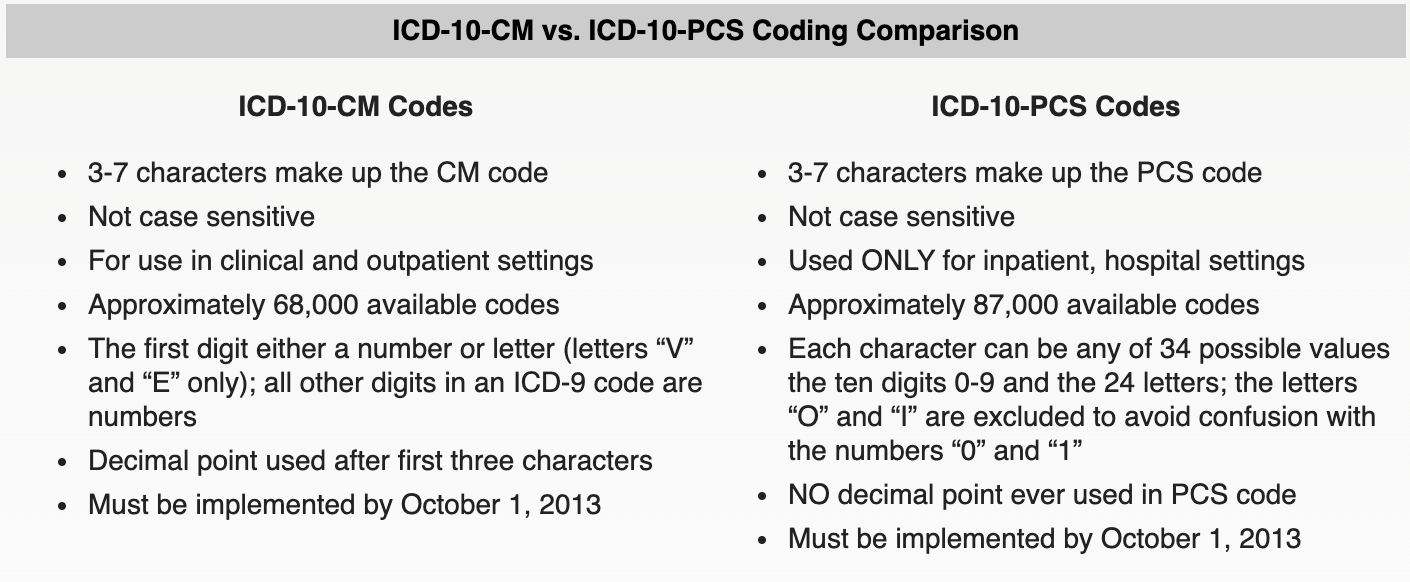

**Pretrained ICD-10 Models**

- `sbiobertresolve_icd10cm_augmented`
- `sbiobertresolve_icd10pcs`
- `sbiobertresolve_icd10cm_augmented_billable_hcc`
- `sbiobertresolve_icd10cm`
- `sbiobertresolve_icd10cm_slim_normalized`
- `sbiobertresolve_icd10cm_slim_billable_hcc`
- `sbertresolve_icd10cm_slim_billable_hcc_med`
- `sbiobertresolve_icd10cm_generalised`

Let's create an ICD10 pipeline with `sbiobertresolve_icd10cm_augmented` model and see how it works

In [ ]:
documentAssembler = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("ner_chunk")

sbert_embedder = BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
      .setInputCols(["ner_chunk"])\
      .setOutputCol("sentence_embeddings")\
      .setCaseSensitive(False)

icd10_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_augmented","en", "clinical/models") \
      .setInputCols(["ner_chunk", "sentence_embeddings"]) \
      .setOutputCol("icd10cm_code")\
      .setDistanceFunction("EUCLIDEAN")\
      .setNeighbours(10)

icd10_pipelineModel = PipelineModel(
      stages = [
          documentAssembler,
          sbert_embedder,
          icd10_resolver])

icd10_lp = LightPipeline(icd10_pipelineModel)

sbiobert_base_cased_mli download started this may take some time.
Approximate size to download 384.3 MB
[OK!]
sbiobertresolve_icd10cm_augmented download started this may take some time.
[OK!]
setInputCols in ENTITY_1d47f12798f3 expecting 1 columns. Provided column amount: 2. Which should be columns from the following annotators: ['sentence_embeddings']


In [ ]:
text = 'gestational diabetes mellitus'

%time get_codes (icd10_lp, text, col_name = 'ner_chunk', vocab='icd10cm_code')

CPU times: user 7.73 ms, sys: 7.33 ms, total: 15.1 ms
Wall time: 789 ms


chunks  begin  end   code  \
0  gestational diabetes mellitus  0      28   O24.4   

                                        all_codes  \
0  [O24.4, O24.41, O24.43, Z86.32, Z87.5, O24.31]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resolutions  \
0  [gestational diabetes mellitus [gestational diabetes mellitus], gestational diabetes mellitus (disorder) [gestational diabetes mellitus in pregnancy], postpartum gestational diabetes mellitus [gestational diabetes mellitus in the puerperium], history of gestational diabetes mellitus [personal history of gestational diabetes], history of gestational diabetes mellitus (situation) [personal history of complications of pregnancy, childbirth and the puerperium], pre-existing diabetes mellitus in pregnancy [unspecified pre-existing diabetes mellitus in pregnancy]]   

                                      all_distances  
0  [0.0000, 0.0216, 0.0423, 0.0432, 0.0438, 0.0474]

### Router - Using Resolver Models Together

- Normally, when we need to use more than one sentence entity resolver models in the same pipeline, we used to hit `BertSentenceEmbeddings` annotator more than once given the number of different resolver models in the same pipeline. Now we are introducing a solution with the help of `Router` annotator that could allow us to feed all the NER chunks to `BertSentenceEmbeddings` at once and then route the output of Sentence Embeddings to different resolver models needed.

- In this example, lets use `sbiobertresolve_rxnorm_augmented` RxNorm model and `sbiobertresolve_icd10cm_augmented_billable_hcc` ICD10CM-HCC models together. First we will get the `PROBLEM` entities form `ner_clinical` model and then get the `DRUG` entities from `ner_posology` model. Then we will merge them and use the `Chunk2Doc` annotator to create sentence chunks to populate Sentence Embeddings column. Then, we route the embeddings of `PROBLEM` entities to ICD10CM model and embeddings of `DRUG` entities to RxNorm model at the same time.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetector()\
    .setInputCols("document")\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("word_embeddings")

# to get PROBLEM entitis
clinical_ner = MedicalNerModel().pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_chunk = NerConverter()\
    .setInputCols("sentence","token","clinical_ner")\
    .setOutputCol("clinical_ner_chunk")\
    .setWhiteList(["PROBLEM"])

# to get DRUG entities
posology_ner = MedicalNerModel().pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_chunk = NerConverter()\
    .setInputCols("sentence","token","posology_ner")\
    .setOutputCol("posology_ner_chunk")\
    .setWhiteList(["DRUG"])

# merge the chunks into a single ner_chunk
chunk_merger = ChunkMergeApproach()\
    .setInputCols("clinical_ner_chunk","posology_ner_chunk")\
    .setOutputCol("final_ner_chunk")


# convert chunks to doc to get sentence embeddings of them
chunk2doc = Chunk2Doc().setInputCols("final_ner_chunk").setOutputCol("final_chunk_doc")


sbiobert_embeddings = BertSentenceEmbeddings.pretrained("sbiobert_base_cased_mli","en","clinical/models")\
    .setInputCols(["final_chunk_doc"])\
    .setOutputCol("sbert_embeddings")\
    .setCaseSensitive(False)

# filter PROBLEM entity embeddings
router_sentence_icd10 = Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["PROBLEM"]) \
    .setOutputCol("problem_embeddings")

# filter DRUG entity embeddings
router_sentence_rxnorm = Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["DRUG"]) \
    .setOutputCol("drug_embeddings")

# use problem_embeddings only
icd_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_augmented_billable_hcc","en", "clinical/models") \
    .setInputCols(["clinical_ner_chunk", "problem_embeddings"]) \
    .setOutputCol("icd10cm_code")\
    .setDistanceFunction("EUCLIDEAN")


# use drug_embeddings only
rxnorm_resolver = SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
    .setInputCols(["posology_ner_chunk", "drug_embeddings"]) \
    .setOutputCol("rxnorm_code")\
    .setDistanceFunction("EUCLIDEAN")

routerPipeline = Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    clinical_ner_chunk,
    posology_ner,
    posology_ner_chunk,
    chunk_merger,
    chunk2doc,
    sbiobert_embeddings,
    router_sentence_icd10,
    router_sentence_rxnorm,
    icd_resolver,
    rxnorm_resolver
])

router_model = routerPipeline.fit(spark.createDataFrame([['']]).toDF("text"))

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]
ner_posology download started this may take some time.
[OK!]
sbiobert_base_cased_mli download started this may take some time.
Approximate size to download 384.3 MB
[OK!]
sbiobertresolve_icd10cm_augmented_billable_hcc download started this may take some time.
[OK!]
setInputCols in ENTITY_43bcc4c3bbef expecting 1 columns. Provided column amount: 2. Which should be columns from the following annotators: ['sentence_embeddings']
sbiobertresolve_rxnorm_augmented download started this may take some time.
[OK!]
setInputCols in ENTITY_015c979cfb9e expecting 1 columns. Provided column amount: 2. Which should be columns from the following annotators: ['sentence_embeddings']


In [ ]:
clinical_note = """The patient is a 41-year-old Vietnamese female with a cough that started last week.
She has had right-sided chest pain radiating to her back with fever starting yesterday.
She has a history of pericarditis in May 2006 and developed cough with right-sided chest pain.
MEDICATIONS
1. Coumadin 1 mg daily. Last INR was on Tuesday, August 14, 2007, and her INR was 2.3.
2. Amiodarone 100 mg p.o. daily.
"""

Let's transform and see the results

In [ ]:
df = spark.createDataFrame([[clinical_note]]).toDF("text")

result = router_model.transform(df)

In [ ]:
%%time

icd10_result = get_codes_from_df(result, 'clinical_ner_chunk', 'icd10cm_code', aux=True)

CPU times: user 81.6 ms, sys: 16.1 ms, total: 97.6 ms
Wall time: 6.95 s


In [ ]:
# extract HCC informationinto different columns

icd10_result["billable"] = icd10_result["aux_list"].apply(extract_billable).apply(pd.Series).iloc[:,0]
icd10_result["hcc_status"] = icd10_result["aux_list"].apply(extract_billable).apply(pd.Series).iloc[:,1]
icd10_result["hcc_code"] = icd10_result["aux_list"].apply(extract_billable).apply(pd.Series).iloc[:,2]

icd10_result.drop("aux_list", axis=1, inplace= True)

In [ ]:
icd10_result.head(15)

sent_id               ner_chunk   entity icd10cm_code  \
0  0       a cough                 PROBLEM  R05           
1  1       right-sided chest pain  PROBLEM  R07.89        
2  1       fever                   PROBLEM  P81.9         
3  2       pericarditis            PROBLEM  I31.9         
4  2       cough                   PROBLEM  R05           
5  2       right-sided chest pain  PROBLEM  R07.89        

                                                              resolution  \
0  cough [cough]                                                           
1  right sided chest pain (finding) [other chest pain]                     
2  fever [disturbance of temperature regulation of newborn, unspecified]   
3  pericarditis [disease of pericardium, unspecified]                      
4  cough [cough]                                                           
5  right sided chest pain (finding) [other chest pain]                     

                                                                                             all_codes  \
0  [R05, B94.8, R05.3, R05.1, R09.89]                                                                    
1  [R07.89, R07.2, R07.9, M79.6, R52, I20.9, M79.60, R10.11, M79.621, M79.62, M79.604, R10.1, R07.81]    
2  [P81.9, R50.8, R50.9, B33.8, A93.8, F68.1, A68.9, P81.8, A23.0]                                       
3  [I31.9, I30.1, I30.8, I31.8, B33.23, A18.8, I42.5, I30, I30.9, I31.0, I24.1, T46.5X, I31.3, S27.80]   
4  [R05, B94.8, A37, R05.3, R05.1, R29.2]                                                                
5  [R07.89, R07.2, R07.9, M79.6, R52, I20.9, M79.60, R10.11, M79.621, M79.62, M79.604, R10.1, R07.81]    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           all_resolutions  \
0  [cough [cough], persistent cough [sequelae of other specified infectious and parasitic diseases], chronic cough [chronic cough], acute cough [acute cough], respiratory tract congestion and cough (disorder) [other specified symptoms and signs involving the circulatory and respiratory systems]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  [right sided chest pain (finding) [other chest pain], retrosternal chest pain [precordial pain], acute chest pain [chest pain, unspecified], chronic pain of right upper limb (finding) [pain in limb, hand, foot, fingers and toes], localised chest pain [pain, unspecified], ischaemic chest pain [angina pectoris, unspecified], chronic pain of right upper limb [pain in limb, unspecified], right upper quadrant pain [right upper quadrant pain], pain in right upper arm [pain in right upper arm], pain of right upper arm [pain in upper arm], pain in right leg [pain in right leg], right upper quadrant pain (finding) [pai

Now let's get RxNorm codes from our results.

In [ ]:
rxnorm_result = get_codes_from_df(result, 'posology_ner_chunk', 'rxnorm_code', aux=False)

rxnorm_result.head()

sent_id   ner_chunk entity rxnorm_code           resolutions  \
0  4       Coumadin    DRUG   202421      coumadin [coumadin]    
1  6       Amiodarone  DRUG   1663223     amiodarone Injection   

                                                                       all_codes  \
0  [202421, 2898, 1855075, 128793, 1598, 152085, 218274, 21732, 1435932, 227590]   
1  [1663223, 1151983, 1663270, 1151982, 203114, 377132, 1151981, 832845, 727379]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                all_resolutions  
0  [coumadin [coumadin], coumarin [coumarin], coumaran [coumaran], vicodin [vicodin], dicoumarol [dicumarol], mycifradin [mycifradin], medcodin [medcodin], cresatin [cresatin], reumacetin [reumacetin], geocillin [geocillin]]                                                                                                                                                                                                                                                                                                 
1  [amiodarone Injection, amiodarone pill [amiodarone pill], amiodarone injection [nexterone] [amiodarone injection [nexterone]], amiodarone oral product [amiodarone oral product], amiodarone hydrochloride [amiodarone hydrochloride], amiodarone injectable solution [amiodarone injectable solution], amiodarone injectable product [amiodarone injectable product], amiodarone injectable solution [nexterone] [amiodarone injectable solution [nexterone]], amiodarone prefilled syringe [amiodarone prefilled syringe]]

Additionally, we have **Entity Chunk Embeddings** uses BERT Sentence embeddings to compute a weighted average vector represention of related entity chunks. This model is a subclass of BertSentenceEmbeddings and shares all parameters with it. It can load any pretrained BertSentenceEmbeddings model.

You can check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/3.2.Sentence_Entity_Resolvers_with_EntityChunkEmbeddings.ipynb) for details.

### Healthcare Codes Mapping by Using Pretrained Pipelines

In Spark NLP, there are pretrained pipelines that can map these healthcare codes each other. Here is a list of these pipelines:

- `icd10cm_snomed_mapping` : ICD10 Codes to Snomed Codes
- `snomed_icd10cm_mapping` : Snomed Codes to ICD Codes
- `icdo_snomed_mapping`    : ICD-O Codes to Snomed Codes
- `snomed_icdo_mapping`    : Snomed Codes to ICD-O Codes
- `icd10cm_umls_mapping`   : ICD Codes to UMLS Codes
- `snomed_umls_mapping`    : Snomed Codes to UMLS Codes
- `rxnorm_umls_mapping`    : RxNorm Codes to UMLS Codes
- `mesh_umls_mapping`      : MeSH Codes to UMLS Codes
- `rxnorm_mesh_mapping`    : RxNorm Codes to MeSH Codes
- `icd10_icd9_mapping`     : ICD10 Codes to ICD9 Codes    

Lets show an example of ICD codes mapping to Snomed Codes to show how these pipelines work.

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
icd10_snomed_pipeline = PretrainedPipeline("icd10cm_snomed_mapping", "en", "clinical/models")

icd10cm_snomed_mapping download started this may take some time.
Approx size to download 1 MB
[OK!]


In [ ]:
icd10_snomed_pipeline.annotate("R079 N4289 M62830")

{'document': ['R079 N4289 M62830'],
 'icd10cm_code': ['R079', 'N4289', 'M62830'],
 'snomed_code': ['161972006', '22035000', '16410651000119105']}

Also, if you want to see more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.1.Healthcare_Code_Mapping.ipynb).



# 7.Chunk Mapping

**<center>MAPPER MODELS**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [abbreviation_category_mapper](https://nlp.johnsnowlabs.com/2022/11/16/abbreviation_category_mapper_en.html)  | 2| [abbreviation_mapper](https://nlp.johnsnowlabs.com/2022/05/11/abbreviation_mapper_en_3_0.html)  | 3| [abbreviation_mapper_augmented](https://nlp.johnsnowlabs.com/2022/10/30/abbreviation_mapper_augmented_en.html)  |
| 4| [cpt_umls_mapper](https://nlp.johnsnowlabs.com/2024/02/27/cpt_umls_mapper_en.html)  | 5| [cvx_code_mapper](https://nlp.johnsnowlabs.com/2022/10/12/cvx_code_mapper_en.html)  | 6| [cvx_name_mapper](https://nlp.johnsnowlabs.com/2022/10/12/cvx_name_mapper_en.html)  |
| 7| [drug_action_treatment_mapper](https://nlp.johnsnowlabs.com/2024/11/12/drug_action_treatment_mapper_en.html)  | 8| [drug_ade_mapper](https://nlp.johnsnowlabs.com/2022/08/23/drug_ade_mapper_en.html)  | 9| [drug_brandname_ndc_mapper](https://nlp.johnsnowlabs.com/2022/05/11/drug_brandname_ndc_mapper_en_3_0.html)  |
| 10| [drug_category_mapper](https://nlp.johnsnowlabs.com/2022/12/18/drug_category_mapper_en.html)  | 11| [hcpcs_ndc_mapper](https://nlp.johnsnowlabs.com/2023/04/13/hcpcs_ndc_mapper_en.html)  | 12| [icd10_icd9_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd10_icd9_mapper_en.html)  |
| 13| [icd10_meddra_llt_mapper](https://nlp.johnsnowlabs.com/2024/09/04/icd10_meddra_llt_mapper_en.html)  | 14| [icd10_meddra_pt_mapper](https://nlp.johnsnowlabs.com/2024/09/04/icd10_meddra_pt_mapper_en.html)  | 15| [icd10cm_billable_hcc_mapper](https://nlp.johnsnowlabs.com/2023/05/26/icd10cm_billable_hcc_mapper_en.html)  |
| 16| [icd10cm_cause_claim_mapper](https://nlp.johnsnowlabs.com/2023/05/11/icd10cm_cause_claim_mapper_en.html)  | 17| [icd10cm_chronic_indicator_mapper](https://nlp.johnsnowlabs.com/2024/10/02/icd10cm_chronic_indicator_mapper_en.html)  | 18| [icd10cm_generalised_mapper](https://nlp.johnsnowlabs.com/2024/02/19/icd10cm_generalised_mapper_en.html)  |
| 19| [icd10cm_mapper](https://nlp.johnsnowlabs.com/2022/10/29/icd10cm_mapper_en.html)  | 20| [icd10cm_ms_drg_mapper](https://nlp.johnsnowlabs.com/2023/08/08/icd10cm_ms_drg_mapper_en.html)  | 21| [icd10cm_snomed_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icd10cm_snomed_mapper_en_3_0.html)  |
| 22| [icd10cm_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icd10cm_umls_mapper_en_3_0.html)  | 23| [icd9_icd10_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd9_icd10_mapper_en.html)  | 24| [icd9_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd9_mapper_en.html)  |
| 25| [icdo_snomed_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icdo_snomed_mapper_en_3_0.html)  | 26| [kegg_disease_mapper](https://nlp.johnsnowlabs.com/2022/11/18/kegg_disease_mapper_en.html)  | 27| [kegg_drug_mapper](https://nlp.johnsnowlabs.com/2022/11/21/kegg_drug_mapper_en.html)  |
| 28| [loinc_umls_mapper](https://nlp.johnsnowlabs.com/2024/02/19/loinc_umls_mapper_en.html)  | 29| [meddra_hlt_pt_mapper](https://nlp.johnsnowlabs.com/2024/09/05/meddra_hlt_pt_mapper_en.html)  | 30| [meddra_llt_icd10_mapper](https://nlp.johnsnowlabs.com/2024/09/04/meddra_llt_icd10_mapper_en.html)  |
| 31| [meddra_llt_pt_mapper](https://nlp.johnsnowlabs.com/2024/09/03/meddra_llt_pt_mapper_en.html)  | 32| [meddra_llt_snomed_mapper](https://nlp.johnsnowlabs.com/2024/09/05/meddra_llt_snomed_mapper_en.html)  | 33| [meddra_pt_hlt_mapper](https://nlp.johnsnowlabs.com/2024/09/05/meddra_pt_hlt_mapper_en.html)  |
| 34| [meddra_pt_icd10_mapper](https://nlp.johnsnowlabs.com/2024/09/04/meddra_pt_icd10_mapper_en.html)  | 35| [meddra_pt_llt_mapper](https://nlp.johnsnowlabs.com/2024/09/03/meddra_pt_llt_mapper_en.html)  | 36| [mesh_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/26/mesh_umls_mapper_en_3_0.html)  |
| 37| [ndc_drug_brandname_mapper](https://nlp.johnsnowlabs.com/2023/02/22/ndc_drug_brandname_mapper_en.html)  | 38| [ndc_hcpcs_mapper](https://nlp.johnsnowlabs.com/2023/04/13/ndc_hcpcs_mapper_en.html)  | 39| [normalized_section_header_mapper](https://nlp.johnsnowlabs.com/2022/06/26/normalized_section_header_mapper_en_3_0.html)  |
| 40| [rxnorm_action_mapper](https://nlp.johnsnowlabs.com/2024/02/17/rxnorm_action_mapper_en.html)  | 41| [rxnorm_action_treatment_mapper](https://nlp.johnsnowlabs.com/2022/05/08/rxnorm_action_treatment_mapper_en_3_0.html)  | 42| [rxnorm_drug_brandname_mapper](https://nlp.johnsnowlabs.com/2023/02/09/rxnorm_drug_brandname_mapper_en.html)  |
| 43| [rxnorm_mapper](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_mapper_en_3_0.html)  | 44| [rxnorm_ndc_mapper](https://nlp.johnsnowlabs.com/2022/05/20/rxnorm_ndc_mapper_en_3_0.html)  | 45| [rxnorm_nih_mapper](https://nlp.johnsnowlabs.com/2023/02/23/rxnorm_nih_mapper_en.html)  |
| 46| [rxnorm_normalized_mapper](https://nlp.johnsnowlabs.com/2022/09/29/rxnorm_normalized_mapper_en.html)  | 47| [rxnorm_treatment_mapper](https://nlp.johnsnowlabs.com/2024/02/17/rxnorm_treatment_mapper_en.html)  | 48| [rxnorm_umls_mapper](https://nlp.johnsnowlabs.com/2024/03/13/rxnorm_umls_mapper_en.html)  |
| 49| [snomed_icd10cm_mapper](https://nlp.johnsnowlabs.com/2022/06/26/snomed_icd10cm_mapper_en_3_0.html)  | 50| [snomed_icdo_mapper](https://nlp.johnsnowlabs.com/2022/06/26/snomed_icdo_mapper_en_3_0.html)  | 51| [snomed_meddra_llt_mapper](https://nlp.johnsnowlabs.com/2024/09/05/snomed_meddra_llt_mapper_en.html)  |
| 52| [snomed_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/27/snomed_umls_mapper_en_3_0.html)  | 53| [umls_clinical_drugs_mapper](https://nlp.johnsnowlabs.com/2022/07/06/umls_clinical_drugs_mapper_en_3_0.html)  | 54| [umls_clinical_findings_mapper](https://nlp.johnsnowlabs.com/2022/07/08/umls_clinical_findings_mapper_en_3_0.html)  |
| 55| [umls_cpt_mapper](https://nlp.johnsnowlabs.com/2024/02/27/umls_cpt_mapper_en.html)  | 56| [umls_disease_syndrome_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_disease_syndrome_mapper_en_3_0.html)  | 57| [umls_drug_substance_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_drug_substance_mapper_en_3_0.html)  |
| 58| [umls_icd10cm_mapper](https://nlp.johnsnowlabs.com/2023/10/17/umls_icd10cm_mapper_en.html)  | 59| [umls_loinc_mapper](https://nlp.johnsnowlabs.com/2024/02/15/umls_loinc_mapper_en.html)  | 60| [umls_major_concepts_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_major_concepts_mapper_en_3_0.html)  |
| 61| [umls_mesh_mapper](https://nlp.johnsnowlabs.com/2023/10/17/umls_mesh_mapper_en.html)  | 62| [umls_rxnorm_mapper](https://nlp.johnsnowlabs.com/2024/03/13/umls_rxnorm_mapper_en.html)  | 63| [umls_snomed_mapper](https://nlp.johnsnowlabs.com/2023/10/17/umls_snomed_mapper_en.html)  |


**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=Chunk+Mapping&edition=Spark+NLP+for+Healthcare)**

<br>

**<center>PRETRAINED MAPPER PIPELINES**

|index|model|
|-----:|:-----|
| 1| [icd10_icd9_mapping](https://nlp.johnsnowlabs.com/2022/09/30/icd10_icd9_mapping_en.html)  |
| 2| [icd10cm_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icd10cm_snomed_mapping_en_3_0.html)  |
| 3| [icd10cm_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/icd10cm_umls_mapping_en.html)  |
| 4| [icdo_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icdo_snomed_mapping_en_3_0.html)  |
| 5| [mesh_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/mesh_umls_mapping_en.html)  |
| 6| [rxnorm_mesh_mapping](https://nlp.johnsnowlabs.com/2021/05/04/rxnorm_mesh_mapping_en.html)  |
| 7| [rxnorm_ndc_mapping](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_ndc_mapping_en_3_0.html)  |
| 8| [rxnorm_umls_mapping](https://nlp.johnsnowlabs.com/2023/06/17/rxnorm_umls_mapping_en.html)  |
| 9| [snomed_icd10cm_mapping](https://nlp.johnsnowlabs.com/2021/05/02/snomed_icd10cm_mapping_en.html)  |
| 10| [snomed_icdo_mapping](https://nlp.johnsnowlabs.com/2022/06/27/snomed_icdo_mapping_en_3_0.html)  |
| 11| [snomed_umls_mapping](https://nlp.johnsnowlabs.com/2023/06/17/snomed_umls_mapping_en.html)  |



You can check [Healthcare Code Mapping Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.1.Healthcare_Code_Mapping.ipynb) for the examples of pretrained mapper pipelines.

### Pretrained ChunkMapper Models

Let's apply some examples and see how `ChunkMapperModel` works.

For more detail about chunk mapping, please visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/26.Chunk_Mapping.ipynb)



Let's create a piepline with `drug_action_treatment_mapper` and see how it works.

We will create a pipeline consisting `bert_token_classifier_drug_development_trials` ner model to extract ner chunk as well as `ChunkMapperModel()`.

In [ ]:
#ChunkMapper Pipeline
document_assembler = DocumentAssembler()\
      .setInputCol('text')\
      .setOutputCol('document')

sentence_detector = SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

tokenizer = Tokenizer()\
      .setInputCols("sentence")\
      .setOutputCol("token")

btfc_ner =  MedicalBertForTokenClassifier.pretrained("bert_token_classifier_drug_development_trials", "en", "clinical/models")\
      .setInputCols("token","sentence")\
      .setOutputCol("btfc_ner")

btfc_ner_converter = NerConverter()\
      .setInputCols("sentence", "token", "btfc_ner")\
      .setOutputCol("btfc_ner_chunk")

#drug_action_treatment_mapper with "action" mappings
chunkerMapper= ChunkMapperModel().pretrained("drug_action_treatment_mapper", "en", "clinical/models")\
    .setInputCols(["btfc_ner_chunk"])\
    .setOutputCol("action_mappings")\
    .setRels(["action"]) # or treatment


mapperPipeline = Pipeline().setStages([
    document_assembler,
    sentence_detector,
    tokenizer,
    btfc_ner,
    btfc_ner_converter,
    chunkerMapper])


test_data = spark.createDataFrame([["The patient was female and patient of Dr. X. and she was given Dermovate, Aspagin"]]).toDF("text")

res = mapperPipeline.fit(test_data).transform(test_data)

bert_token_classifier_drug_development_trials download started this may take some time.
[OK!]
drug_action_treatment_mapper download started this may take some time.
[OK!]


Chunks detected by ner model

In [ ]:
res.select(F.explode('btfc_ner_chunk.result').alias("chunks")).show(truncate=False)

+---------+
|chunks   |
+---------+
|Dermovate|
|Aspagin  |
+---------+



Checking the mapping results for **action**

In [ ]:
res.selectExpr("action_mappings.metadata").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|metadata                                                  

As you see above under the metadata column, if exist, we can see all the relations for each chunk.

In [ ]:
res.select(F.explode(F.arrays_zip(res.btfc_ner_chunk.result, res.action_mappings.result, res.action_mappings.metadata)).alias("col"))\
   .select(F.expr("col['0']").alias("ner_chunk"),
           F.expr("col['1']").alias("pharmaceutical_action"),
           F.expr("col['2']['all_relations']").alias("other_pharmaceutical_actions")).show(truncate=False)

+---------+---------------------+-----------------------------------------------------------+
|ner_chunk|pharmaceutical_action|other_pharmaceutical_actions                               |
+---------+---------------------+-----------------------------------------------------------+
|Dermovate|Anti-Inflammatory    |Corticosteroids:::Dermatological Preparations:::Very Strong|
|Aspagin  |Analgesic            |Anti-Inflammatory:::Antipyretic                            |
+---------+---------------------+-----------------------------------------------------------+



### Creating a Mapper Model

There is `ChunkMapperApproach()` to create your own mapper model. <br/>

This receives an `ner_chunk` and a Json with a mapping of ner entities and relations, then returns the `ner_chunk` augmented with the relations from the Json ontology. <br/> We give the path of json file to the `setDictionary()` parameter.




Let's create an example Json with single key, then create a drug mapper model. This model will match the given drug name (only "metformin" for our example) with correpsonding action and treatment.  

The format of json file should be like following:

````
{
  "mappings": [
    {
      "key": "metformin",
      "relations": [
        {
          "key": "action",
          "values" : ["hypoglycemic", "Drugs Used In Diabets"]
        },
        {
          "key": "treatment",
          "values" : ["diabetes", "t2dm"]
        }
      ]
    }
  ]
}


By using `setRels()` parameter, we tell the model which type of mapping we want. In our case, if we want from our model to return **action** mapping, we set the parameter as `setRels(["action"])`,  we set as `setRels(["treatment"])` for **treatment**

Let's create a pipeline and see it in action.

In [ ]:
data_set = {
  "mappings": [
    {
      "key": "metformin",
      "relations": [
        {
          "key": "action",
          "values" : ["hypoglycemic", "Drugs Used In Diabetes"]
        },
        {
          "key": "treatment",
          "values" : ["diabetes", "t2dm"]
        }
      ]
    }
  ]
}

import json
with open('sample_drug.json', 'w', encoding='utf-8') as f:
    json.dump(data_set, f, ensure_ascii=False, indent=4)

In [ ]:
document_assembler = DocumentAssembler()\
      .setInputCol('text')\
      .setOutputCol('document')

sentence_detector = SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

tokenizer = Tokenizer()\
      .setInputCols("sentence")\
      .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
      .setInputCols(["sentence", "token"])\
      .setOutputCol("embeddings")

posology_ner_model = MedicalNerModel.pretrained("ner_posology_large", "en", "clinical/models")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("posology_ner")

posology_ner_converter = NerConverterInternal()\
    .setInputCols("sentence", "token", "posology_ner")\
    .setOutputCol("posology_ner_chunk")\
    .setWhiteList(["DRUG"])

chunkerMapper = ChunkMapperApproach()\
      .setInputCols(["posology_ner_chunk"])\
      .setOutputCol("mappings")\
      .setDictionary("/content/sample_drug.json")\
      .setRels(["action"]) #or treatment

mapper_pipeline = Pipeline().setStages([
        document_assembler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        posology_ner_model,
        posology_ner_converter,
        chunkerMapper])


test_data = spark.createDataFrame([["The patient was given 1 unit of metformin daily."]]).toDF("text")

mapper_model = mapper_pipeline.fit(test_data)
res= mapper_model.transform(test_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_posology_large download started this may take some time.
[OK!]


Let's check our model's results

In [ ]:
#ner result
res.select(F.explode('posology_ner_chunk.result').alias("chunks")).show(truncate=False)

+---------+
|chunks   |
+---------+
|metformin|
+---------+



In [ ]:
res.select(F.explode(F.arrays_zip(res.posology_ner_chunk.result, res.mappings.result, res.mappings.metadata)).alias("col"))\
   .select(F.expr("col['0']").alias("ner_chunk"),
           F.expr("col['1']").alias("mapping_result"),
           F.expr("col['2']['all_relations']").alias("all_relations")).show(truncate=False)

+---------+--------------+----------------------+
|ner_chunk|mapping_result|all_relations         |
+---------+--------------+----------------------+
|metformin|hypoglycemic  |Drugs Used In Diabetes|
+---------+--------------+----------------------+



As you see, we successfully created our custom mapper model.

# 8.Pretrained Clinical Pipelines

In order to save you from creating a pipeline from scratch, Spark NLP also has a pre-trained pipelines that are already fitted using certain annotators and transformers according to various use cases.

Here is the list of clinical pre-trained pipelines:

> These clinical pipelines are trained with `embeddings_healthcare_100d` and accuracies might be 1-2% lower than `embeddings_clinical` which is 200d.

**1.   explain_clinical_doc_carp** :

> a pipeline with `ner_clinical`, `assertion_dl`, `re_clinical` and `ner_posology`. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

**2.   explain_clinical_doc_era** :

> a pipeline with `ner_clinical_events`, `assertion_dl` and `re_temporal_events_clinical`. It will extract clinical entities, assign assertion status and find temporal relationships between clinical entities.

**3.   explain_clinical_doc_ade** :

> a pipeline for `Adverse Drug Events (ADE)` with `ner_ade_biobert`, `assertiondl_biobert`, `classifierdl_ade_conversational_biobert` and `re_ade_biobert`. It will classify the document, extract `ADE` and `DRUG` entities, assign assertion status to `ADE` entities, and relate them with `DRUG` entities, then assign ADE status to a text (`True` means ADE, `False` means not related to ADE).

**letter codes in the naming conventions:**

> c : ner_clinical

> e : ner_clinical_events

> r : relation extraction

> p : ner_posology

> a : assertion

> ade : adverse drug events

**Relation Extraction types:**

`re_clinical` >> TrIP (improved), TrWP (worsened), TrCP (caused problem), TrAP (administered), TrNAP (avoided), TeRP (revealed problem), TeCP (investigate problem), PIP (problems related)

`re_temporal_events_clinical` >> `AFTER`, `BEFORE`, `OVERLAP`

**4. Clinical Deidentification** :

>This pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities.

**5. NER Pipelines:**

> pipelines for all the available pretrained NER models.

**6. BERT Based NER Pipelines**

> pipelines for all the available Bert token classification models.

**7. ner_profiling_clinical and ner_profiling_biobert:**

> pipelines for exploring all the available pretrained NER models at once.

**8. ner_model_finder**

> a pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

**9. ChunkMapping Pipelines**

> pipelines to convert one medical terminology to another.



<table>
<tr><th>Pretraned NER Pipelines </th><th>
<tr><td>

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_drug_development_trials_pipeline](https://nlp.johnsnowlabs.com/2022/03/23/bert_token_classifier_drug_development_trials_pipeline_en_3_0.html)  | 2| [bert_token_classifier_ner_ade_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_ade_pipeline_en_3_0.html)  | 3| [bert_token_classifier_ner_anatomy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_anatomy_pipeline_en_3_0.html)  |
| 4| [bert_token_classifier_ner_bacteria_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_bacteria_pipeline_en_3_0.html)  | 5| [bert_token_classifier_ner_bionlp_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_bionlp_pipeline_en_3_0.html)  | 6| [bert_token_classifier_ner_cellular_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_cellular_pipeline_en_3_0.html)  |
| 7| [bert_token_classifier_ner_chemicals_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_chemicals_pipeline_en_3_0.html)  | 8| [bert_token_classifier_ner_chemprot_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_chemprot_pipeline_en_3_0.html)  | 9| [bert_token_classifier_ner_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_clinical_pipeline_en_3_0.html)  |
| 10| [bert_token_classifier_ner_deid_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_deid_pipeline_en_3_0.html)  | 11| [bert_token_classifier_ner_drugs_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_drugs_pipeline_en_3_0.html)  | 12| [bert_token_classifier_ner_jsl_pipeline](https://nlp.johnsnowlabs.com/2022/03/23/bert_token_classifier_ner_jsl_pipeline_en_3_0.html)  |
| 13| [bert_token_classifier_ner_jsl_slim_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_jsl_slim_pipeline_en_3_0.html)  | 14| [german_deid_pipeline_spark24](https://nlp.johnsnowlabs.com/2022/03/03/german_deid_pipeline_spark24_de_2_4.html)  | 15| [jsl_ner_wip_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_clinical_pipeline_en_3_0.html)  |
| 16| [jsl_ner_wip_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_greedy_biobert_pipeline_en_3_0.html)  | 17| [jsl_ner_wip_greedy_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_greedy_clinical_pipeline_en_3_0.html)  | 18| [jsl_ner_wip_modifier_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_modifier_clinical_pipeline_en_3_0.html)  |
| 19| [jsl_rd_ner_wip_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_rd_ner_wip_greedy_biobert_pipeline_en_3_0.html)  | 20| [jsl_rd_ner_wip_greedy_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_rd_ner_wip_greedy_clinical_pipeline_en_3_0.html)  | 21| [ner_abbreviation_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_abbreviation_clinical_pipeline_en_3_0.html)  |
| 22| [ner_ade_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_biobert_pipeline_en_3_0.html)  | 23| [ner_ade_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_clinical_pipeline_en_3_0.html)  | 24| [ner_ade_clinicalbert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_clinicalbert_pipeline_en_3_0.html)  |
| 25| [ner_ade_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_ade_healthcare_pipeline_en_3_0.html)  | 26| [ner_anatomy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_biobert_pipeline_en_3_0.html)  | 27| [ner_anatomy_coarse_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_coarse_biobert_pipeline_en_3_0.html)  |
| 28| [ner_anatomy_coarse_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_coarse_pipeline_en_3_0.html)  | 29| [ner_anatomy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_pipeline_en_3_0.html)  | 30| [ner_bacterial_species_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bacterial_species_pipeline_en_3_0.html)  |
| 31| [ner_biomarker_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_biomarker_pipeline_en_3_0.html)  | 32| [ner_bionlp_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bionlp_biobert_pipeline_en_3_0.html)  | 33| [ner_bionlp_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bionlp_pipeline_en_3_0.html)  |
| 34| [ner_cancer_genetics_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cancer_genetics_pipeline_en_3_0.html)  | 35| [ner_cellular_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cellular_biobert_pipeline_en_3_0.html)  | 36| [ner_cellular_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cellular_pipeline_en_3_0.html)  |
| 37| [ner_chemicals_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemicals_pipeline_en_3_0.html)  | 38| [ner_chemprot_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemprot_biobert_pipeline_en_3_0.html)  | 39| [ner_chemprot_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemprot_clinical_pipeline_en_3_0.html)  |
| 40| [ner_chexpert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chexpert_pipeline_en_3_0.html)  | 41| [ner_clinical_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_biobert_pipeline_en_3_0.html)  | 42| [ner_clinical_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_large_pipeline_en_3_0.html)  |
| 43| [ner_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_pipeline_en_3_0.html)  | 44| [ner_diseases_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_biobert_pipeline_en_3_0.html)  | 45| [ner_diseases_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_large_pipeline_en_3_0.html)  |
| 46| [ner_diseases_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_pipeline_en_3_0.html)  | 47| [ner_drugprot_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugprot_clinical_pipeline_en_3_0.html)  | 48| [ner_drugs_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_greedy_pipeline_en_3_0.html)  |
| 49| [ner_drugs_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_large_pipeline_en_3_0.html)  | 50| [ner_drugs_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_pipeline_en_3_0.html)  | 51| [ner_events_admission_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_admission_clinical_pipeline_en_3_0.html)  |
| 52| [ner_events_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_biobert_pipeline_en_3_0.html)  | 53| [ner_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_clinical_pipeline_en_3_0.html)  | 54| [ner_events_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_events_healthcare_pipeline_en_3_0.html)  |
| 55| [ner_genetic_variants_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_genetic_variants_pipeline_en_3_0.html)  | 56| [ner_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_healthcare_pipeline_en_3_0.html)  | 57| [ner_human_phenotype_gene_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_gene_biobert_pipeline_en_3_0.html)  |
| 58| [ner_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 59| [ner_human_phenotype_go_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_go_biobert_pipeline_en_3_0.html)  | 60| [ner_human_phenotype_go_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_go_clinical_pipeline_en_3_0.html)  |
| 61| [ner_jsl_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_biobert_pipeline_en_3_0.html)  | 62| [ner_jsl_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_enriched_biobert_pipeline_en_3_0.html)  | 63| [ner_jsl_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_enriched_pipeline_en_3_0.html)  |
| 64| [ner_jsl_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_greedy_biobert_pipeline_en_3_0.html)  | 65| [ner_jsl_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_greedy_pipeline_en_3_0.html)  | 66| [ner_jsl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_pipeline_en_3_0.html)  |
| 67| [ner_jsl_slim_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_slim_pipeline_en_3_0.html)  | 68| [ner_measurements_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_measurements_clinical_pipeline_en_3_0.html)  | 69| [ner_medmentions_coarse_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_medmentions_coarse_pipeline_en_3_0.html)  |
| 70| [ner_nihss_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_nihss_pipeline_en_3_0.html)  | 71| [ner_posology_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_biobert_pipeline_en_3_0.html)  | 72| [ner_posology_experimental_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_experimental_pipeline_en_3_0.html)  |
| 73| [ner_posology_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_greedy_pipeline_en_3_0.html)  | 74| [ner_posology_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_posology_healthcare_pipeline_en_3_0.html)  | 75| [ner_posology_large_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_large_biobert_pipeline_en_3_0.html)  |
| 76| [ner_posology_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_large_pipeline_en_3_0.html)  | 77| [ner_posology_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_pipeline_en_3_0.html)  | 78| [ner_posology_small_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_small_pipeline_en_3_0.html)  |
| 79| [ner_radiology_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_radiology_pipeline_en_3_0.html)  | 80| [ner_radiology_wip_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_radiology_wip_clinical_pipeline_en_3_0.html)  | 81| [ner_risk_factors_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_risk_factors_biobert_pipeline_en_3_0.html)  |
| 82| [ner_risk_factors_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_risk_factors_pipeline_en_3_0.html)  | 83| []()| 84| []()|

 </table>

<table>
<tr><th>Pretraned Pipelines for Different Use Cases</th><th>
<td><tr>

|index|model|index|model|
|-----:|:-----|-----:|:-----|
| 1| [ner_deid_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_augmented_pipeline_en_3_0.html)  | 2| [ner_deid_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_biobert_pipeline_en_3_0.html)  |
| 3| [ner_deid_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_biobert_pipeline_en_3_0.html)  | 4| [ner_deid_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_pipeline_en_3_0.html)  |
| 5| [ner_deid_generic_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_augmented_pipeline_en_3_0.html)  | 6| [ner_deid_generic_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_pipeline_de_3_0.html)  |
| 7| [ner_deid_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_large_pipeline_en_3_0.html)  | 8| [ner_deid_sd_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_large_pipeline_en_3_0.html)  |
| 9| [ner_deid_sd_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_pipeline_en_3_0.html)  | 10| [ner_deid_subentity_augmented_i2b2_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_i2b2_pipeline_en_3_0.html)  |
| 11| [ner_deid_subentity_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_pipeline_en_3_0.html)  | 12| [ner_deid_subentity_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_pipeline_de_3_0.html)  |
| 13| [ner_deidentify_dl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deidentify_dl_pipeline_en_3_0.html)  | 14| [re_bodypart_directions_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_directions_pipeline_en_3_0.html)  |
| 15| [re_bodypart_proceduretest_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_proceduretest_pipeline_en_3_0.html)  | 16| [re_date_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_date_clinical_pipeline_en_3_0.html)  |
| 17| [re_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 18| [re_temporal_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_clinical_pipeline_en_3_0.html)  |
| 19| [re_temporal_events_enriched_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_enriched_clinical_pipeline_en_3_0.html)  | 20| [re_test_problem_finding_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_problem_finding_pipeline_en_3_0.html)  |
| 21| [re_test_result_date_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_result_date_pipeline_en_3_0.html)  | 22| [explain_clinical_doc_radiology](https://nlp.johnsnowlabs.com/2022/03/31/explain_clinical_doc_radiology_en_3_0.html)|
| 23| [explain_clinical_doc_ade](https://nlp.johnsnowlabs.com/2021/07/15/explain_clinical_doc_ade_en.html)  | 24| [explain_clinical_doc_carp](https://nlp.johnsnowlabs.com/2020/08/19/explain_clinical_doc_carp_en.html)  |
| 25| [explain_clinical_doc_cra](https://nlp.johnsnowlabs.com/2020/08/19/explain_clinical_doc_cra_en.html)  | 26| [explain_clinical_doc_era](https://nlp.johnsnowlabs.com/2020/09/30/explain_clinical_doc_era_en.html)  |
| 27| [explain_clinical_doc_medication](https://nlp.johnsnowlabs.com/2022/04/01/explain_clinical_doc_medication_en_3_0.html)  | 28| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_bert_subentity_ro_3_0.html)  |


</td></tr>

</table>

You can visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.Pretrained_Clinical_Pipelines.ipynb) in order to see the usage of all these pipelines.

Now, firstly let's pick the `explain_clinical_doc_carp` and see how it works.

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
pipeline = PretrainedPipeline('explain_clinical_doc_carp', 'en', 'clinical/models')

explain_clinical_doc_carp download started this may take some time.
Approx size to download 1.6 GB
[OK!]


In [ ]:
# Load pretrained pipeline from local disk:

# >> pipeline_local = PretrainedPipeline.from_disk('/root/cache_pretrained/explain_clinical_doc_carp_en_2.5.5_2.4_1597841630062')

We will annotate our pretrained pipeline with sample data and see the result

In [ ]:
text ="""28-year-old female with a history of gestational diabetes mellitus, used to take metformin 1000 mg two times a day, presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .
She was seen by the endocrinology service and discharged on 40 units of insulin glargine at night, 12 units of insulin lispro with meals.
"""

annotations = pipeline.annotate(text)

annotations.keys()


dict_keys(['sentences', 'clinical_ner_tags', 'document', 'clinical_ner_chunks', 'assertion', 'clinical_relations', 'posology_ner_tags', 'tokens', 'posology_ner_chunks', 'embeddings', 'pos_tags', 'dependencies'])

In [ ]:
import pandas as pd

rows = list(zip(annotations['tokens'], annotations['clinical_ner_tags'], annotations['posology_ner_tags'], annotations['pos_tags'], annotations['dependencies']))

df = pd.DataFrame(rows, columns = ['tokens','clinical_ner_tags','posology_ner_tags','POS_tags','dependencies'])

df.head(20)

tokens clinical_ner_tags posology_ner_tags POS_tags dependencies
0   28-year-old  O                 O                 JJ       female     
1   female       O                 O                 NN       ROOT       
2   with         O                 O                 II       history    
3   a            O                 O                 DD       history    
4   history      O                 O                 NN       female     
5   of           O                 O                 II       history    
6   gestational  B-PROBLEM         O                 JJ       of         
7   diabetes     I-PROBLEM         O                 NN       mellitus   
8   mellitus     I-PROBLEM         O                 NN       gestational
9   ,            O                 O                 NN       used       
10  used         O                 O                 VVN      mellitus   
11  to           O                 O                 TO       take       
12  take         O                 O                 VVI      used       
13  metformin    B-TREATMENT       B-DRUG            NN       take       
14  1000         O                 B-STRENGTH        MC       metformin  
15  mg           O                 I-STRENGTH        NN       1000       
16  two          O                 B-FREQUENCY       MC       times      
17  times        O                 I-FREQUENCY       NNS      mg         
18  a            O                 I-FREQUENCY       DD       day        
19  day          O                 I-FREQUENCY       NN       times